In [73]:
import os
from tempfile import tempdir
from termios import TOSTOP
from time import time
from turtle import color
from unittest.mock import NonCallableMagicMock
import pandas as pd
import numpy as np
import warnings
import math
import re

import seaborn as sns
warnings.filterwarnings("ignore")

import sys
sys.path.append("./")

from pathlib import Path

import tqdm
import importlib

import matplotlib.pyplot as plt
# from PySide2.QtWidgets import QFileDialog, QApplication
# from PySide2.QtCore import Qt
from copy import copy 

from corems.mass_spectra.input import rawFileReader
from corems.molecular_id.factory.classification import HeteroatomsClassification, Labels
from corems.molecular_id.search.priorityAssignment import OxygenPriorityAssignment
from corems.molecular_id.search.molecularFormulaSearch import SearchMolecularFormulas
from corems.encapsulation.factory.parameters import MSParameters
from corems.encapsulation.constant import Atoms
from corems.mass_spectrum.calc.Calibration import MzDomainCalibration

import importlib

import corems.lc_icpms_ftms.calc.lc_icrms_qc_assign as icrms

importlib.reload(icrms)


<module 'corems.lc_icpms_ftms.calc.lc_icrms_qc_assign' from '/Users/christiandewey/CoreMS/corems/lc_icpms_ftms/calc/lc_icrms_qc_assign.py'>

In [74]:
##### Set file folder and THERMO RAW file name here:
file_location='/Users/christiandewey/Library/CloudStorage/Box-Box/Boiteau Lab/Mass Spec Data/21T at NHMFL/2022-10 Nicole & Christian/Christian/spring'
#file_location='/Users/christiandewey/Library/CloudStorage/Box-Box/Boiteau Lab/Mass Spec Data/21T at NHMFL/2021_August_OC2102A/OC2012A/'
filelist=os.listdir(file_location)
os.chdir(file_location)

MSfiles={}
for file in filelist:
    if '.raw' in file:
        parser = rawFileReader.ImportMassSpectraThermoMSFileReader(file_location+'/'+file)
        MSfiles[file]={'parser': parser}


In [75]:
data = icrms.lc_icr_assign(file_location)

print(data._raw_filelist)

['20221103_LBA_Boiteau_Zorbax3p5_qh2o_700-800_221105000304.raw', '20221103_LBA_Boiteau_Zorbax3p5_spring_fullmz_221105013731.raw', '20221103_LBA_Boiteau_Zorbax3p5_spring_700_800.raw', '20221103_LBA_Boiteau_Zorbax3p5_qh2o_400_500_221104214121.raw', '20221103_LBA_Boiteau_Zorbax3p5_1uMstdmix.raw', '20221103_LBA_Boiteau_Zorbax3p5_qh2o_fullmz_221105005017.raw', '20221103_LBA_Boiteau_Zorbax3p5_qh2o_600-700_221104231550.raw', '20221103_LBA_Boiteau_Zorbax3p5_spring_400_600.raw', '20221103_LBA_Boiteau_Zorbax3p5_spring_600_800_221105062053.raw', '20221103_LBA_Boiteau_Zorbax3p5_spring_600_800.raw', '20221103_LBA_Boiteau_Zorbax3p5_spring_500_600_221105031157.raw', '20221103_LBA_Boiteau_Zorbax3p5_qh2o_600-700.raw', '20221103_LBA_Boiteau_Zorbax3p5_spring_fullmz.raw', '20221103_LBA_Boiteau_Zorbax3p5_spring_400_500.raw', '20221103_LBA_Boiteau_Zorbax3p5_spring_700_800_221105044624.raw', '20221103_LBA_Boiteau_Zorbax3p5_spring_500_600.raw', '20221103_LBA_Boiteau_Zorbax3p5_spring_400_600_221105053340.raw',

max internal std intensity: 79896872.00
dominant std mz: 678.2910


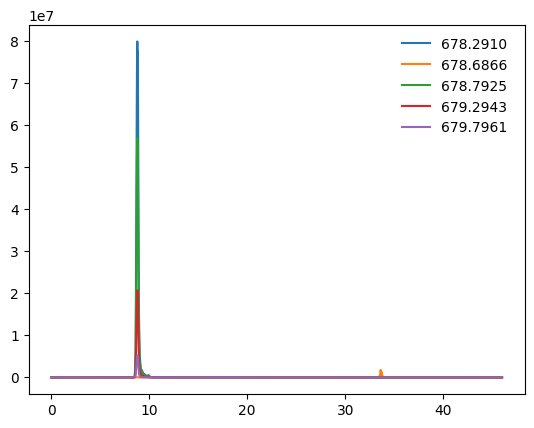

In [77]:


##### get EIC of b12 std 
##### get EIC of b12 std; use to view b12 peaks and determine retention time (visual inspection of plot)
data.get_b12_eic() 



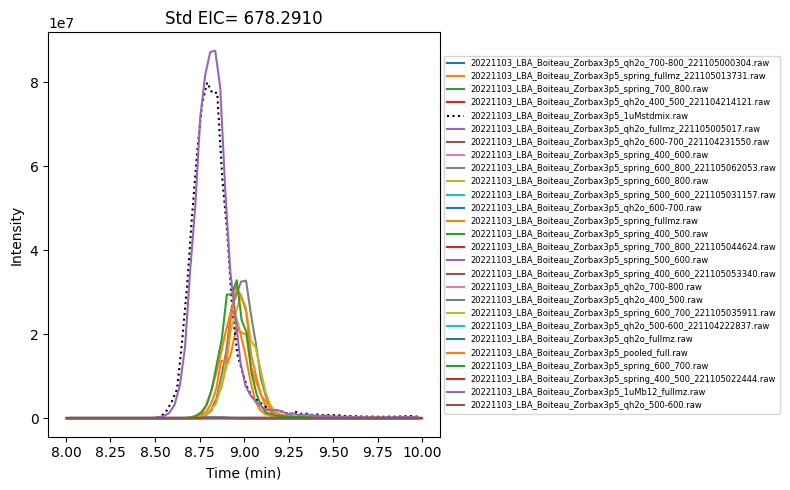

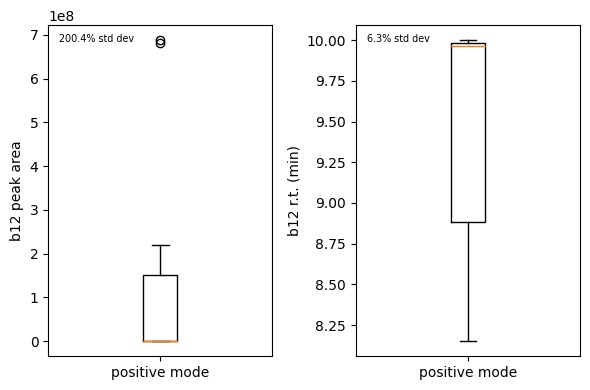

In [78]:
data.run_b12_qc(b12_peakrange = [8,10]) 

In [72]:
ptest = data.master_data_holder['20221103_LBA_Boiteau_Zorbax3p5_spring_fullmz.raw']['parser']

timerange = [10,12]  # start (min) to stop (min)
interval = 2  # min 
refmasslist = "/Users/christiandewey/CoreMS/tests/tests_data/ftms/nom_pos.ref"

assign_formula(ptest, interval, timerange, refmasslist)

MS Obj loaded - 4003 peaks found.
MS Obj loaded - 4003 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
182 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.023 ppm
minimize function performed 322 fn evals and 6 iterations
'runworker'  4.31 ms


Loading molecular formula database: 118498it [00:05, 20969.45it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:03<00:00, 44.93it/s]


'run_molecular_formula'  8878.75 ms
2487 assigned peaks and 1516 unassigned peaks, total  = 62.13 %, relative abundance = 71.13 %, RMS error (best candidate) (ppm) = 0.054


,Index,m/z,Calibrated m/z,Calculated m/z,Peak Height,Peak Area,Resolving Power,S/N,Ion Charge,m/z Error (ppm),...,Ion Type,Is Isotopologue,Mono Isotopic Index,Molecular Formula,C,H,O,N,13C,Time
0,0,203.106657,203.106675,203.106656,1603.962280,-0.308992,1.221491e+06,2.051556,1,0.093717,...,protonated,0.0,NaN,C13 H14 O2,13.0,14.0,2.0,NaN,NaN,10
1,1,205.122301,205.122319,205.122306,6070.662742,-1.038826,1.209488e+06,7.764713,1,0.060104,...,protonated,0.0,NaN,C13 H16 O2,13.0,16.0,2.0,NaN,NaN,10
2,2,210.134939,210.134956,210.134937,2163.622315,-0.337442,1.180637e+06,2.767393,1,0.091037,...,protonated,0.0,NaN,C9 H15 O1 N5,9.0,15.0,1.0,5.0,NaN,10
3,4,217.107047,217.107062,217.107050,8175.019303,-1.521593,1.523629e+06,10.456301,1,0.055124,...,protonated,0.0,NaN,C10 H16 O5,10.0,16.0,5.0,NaN,NaN,10
4,5,217.122301,217.122316,217.122306,8898.723309,-1.561183,1.142642e+06,11.381959,1,0.044088,...,protonated,0.0,NaN,C14 H16 O2,14.0,16.0,2.0,NaN,NaN,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3998,3998,1076.863217,1076.862866,NaN,1609.642017,-7.922348,3.839760e+04,2.058821,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
3999,3999,1076.866809,1076.866459,NaN,2027.544109,-8.468146,5.420826e+04,2.593341,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
4000,4000,1076.885594,1076.885244,NaN,1566.679547,-6.461184,5.119530e+04,2.003870,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
4001,4001,1194.986832,1194.986403,NaN,2266.294787,-23.568392,6.920379e+04,2.898716,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10


In [79]:
# 1: assign formula to full scan 
MSParameters.mass_spectrum.threshold_method = 'signal_noise'
MSParameters.mass_spectrum.s2n_threshold = 2
MSParameters.ms_peak.peak_min_prominence_percent = 0.001

MSParameters.molecular_search.error_method = 'None'
MSParameters.molecular_search.min_ppm_error = -0.3
MSParameters.molecular_search.max_ppm_error = 0.3

MSParameters.molecular_search.isProtonated = True
MSParameters.molecular_search.isRadical = False
MSParameters.molecular_search.isAdduct = False

MSParameters.molecular_search.score_method = "prob_score"
MSParameters.molecular_search.output_score_method = "prob_score"


MSParameters.molecular_search.url_database = None
MSParameters.molecular_search.min_dbe = -1
MSParameters.molecular_search.max_dbe = 20

MSParameters.molecular_search.usedAtoms['C'] = (1,50)
MSParameters.molecular_search.usedAtoms['H'] = (4,100)
MSParameters.molecular_search.usedAtoms['O'] = (1,20)
MSParameters.molecular_search.usedAtoms['N'] = (0,6)
#MSParameters.molecular_search.usedAtoms['Cu'] = (0,1)
#MSParameters.molecular_search.usedAtoms['S'] = (0,1)

In [80]:
timerange = [4,30]  # start (min) to stop (min)
interval = 2  # min 
refmasslist = "/Users/christiandewey/CoreMS/tests/tests_data/ftms/nom_pos.ref"

data.assign_formula(interval = interval, timerange = timerange, refmasslist = refmasslist)




20221103_LBA_Boiteau_Zorbax3p5_qh2o_700-800_221105000304.raw
timestart: 4
MS Obj loaded - 21 peaks found.
MS Obj loaded - 21 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.


100%|██████████| 140/140 [00:00<00:00, 1025.93it/s]

Started database insert using 3733 iterations for a total of 186615 rows



3733it [00:05, 660.38it/s]


'runworker'  6163.24 ms


Loading molecular formula database: 118498it [00:03, 33581.78it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1719.80it/s]


'run_molecular_formula'  9793.68 ms
3 assigned peaks and 18 unassigned peaks, total  = 14.29 %, relative abundance = 8.83 %, RMS error (best candidate) (ppm) = 0.207
timestart: 6
MS Obj loaded - 25 peaks found.
MS Obj loaded - 25 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.54 ms


Loading molecular formula database: 118498it [00:02, 40456.03it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1742.03it/s]


'run_molecular_formula'  3028.19 ms
3 assigned peaks and 22 unassigned peaks, total  = 12.00 %, relative abundance = 8.92 %, RMS error (best candidate) (ppm) = 0.135
timestart: 8
MS Obj loaded - 21 peaks found.
MS Obj loaded - 21 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.53 ms


Loading molecular formula database: 118498it [00:02, 41899.76it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1898.84it/s]


'run_molecular_formula'  2919.14 ms
3 assigned peaks and 18 unassigned peaks, total  = 14.29 %, relative abundance = 9.16 %, RMS error (best candidate) (ppm) = 0.116
timestart: 10
MS Obj loaded - 20 peaks found.
MS Obj loaded - 20 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.35 ms


Loading molecular formula database: 118498it [00:02, 39657.32it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1882.76it/s]


'run_molecular_formula'  3079.35 ms
4 assigned peaks and 16 unassigned peaks, total  = 20.00 %, relative abundance = 9.80 %, RMS error (best candidate) (ppm) = 0.175
timestart: 12
MS Obj loaded - 32 peaks found.
MS Obj loaded - 32 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.32 ms


Loading molecular formula database: 118498it [00:03, 37347.31it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1510.97it/s]


'run_molecular_formula'  3284.60 ms
5 assigned peaks and 27 unassigned peaks, total  = 15.62 %, relative abundance = 10.04 %, RMS error (best candidate) (ppm) = 0.143
timestart: 14
MS Obj loaded - 35 peaks found.
MS Obj loaded - 35 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.56 ms


Loading molecular formula database: 118498it [00:02, 43100.40it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1489.98it/s]


'run_molecular_formula'  2863.48 ms
10 assigned peaks and 25 unassigned peaks, total  = 28.57 %, relative abundance = 30.53 %, RMS error (best candidate) (ppm) = 0.201
timestart: 16
MS Obj loaded - 31 peaks found.
MS Obj loaded - 31 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.42 ms


Loading molecular formula database: 118498it [00:03, 39235.93it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1672.20it/s]


'run_molecular_formula'  3122.64 ms
6 assigned peaks and 25 unassigned peaks, total  = 19.35 %, relative abundance = 11.32 %, RMS error (best candidate) (ppm) = 0.204
timestart: 18
MS Obj loaded - 36 peaks found.
MS Obj loaded - 36 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.58 ms


Loading molecular formula database: 118498it [00:02, 41455.03it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1485.54it/s]


'run_molecular_formula'  2972.85 ms
6 assigned peaks and 30 unassigned peaks, total  = 16.67 %, relative abundance = 10.25 %, RMS error (best candidate) (ppm) = 0.111
timestart: 20
MS Obj loaded - 33 peaks found.
MS Obj loaded - 33 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.22 ms


Loading molecular formula database: 118498it [00:03, 35973.96it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1680.51it/s]


'run_molecular_formula'  3396.33 ms
4 assigned peaks and 29 unassigned peaks, total  = 12.12 %, relative abundance = 8.43 %, RMS error (best candidate) (ppm) = 0.142
timestart: 22
MS Obj loaded - 38 peaks found.
MS Obj loaded - 38 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.29 ms


Loading molecular formula database: 118498it [00:02, 43040.05it/s] 
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1556.42it/s]


'run_molecular_formula'  2864.19 ms
6 assigned peaks and 32 unassigned peaks, total  = 15.79 %, relative abundance = 13.59 %, RMS error (best candidate) (ppm) = 0.162
timestart: 24
MS Obj loaded - 23 peaks found.
MS Obj loaded - 23 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.29 ms


Loading molecular formula database: 118498it [00:02, 40694.92it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1876.15it/s]


'run_molecular_formula'  3005.27 ms
3 assigned peaks and 20 unassigned peaks, total  = 13.04 %, relative abundance = 9.40 %, RMS error (best candidate) (ppm) = 0.143
timestart: 26
MS Obj loaded - 55 peaks found.
MS Obj loaded - 55 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.40 ms


Loading molecular formula database: 118498it [00:03, 35144.74it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1339.98it/s]


'run_molecular_formula'  3499.76 ms
6 assigned peaks and 49 unassigned peaks, total  = 10.91 %, relative abundance = 8.80 %, RMS error (best candidate) (ppm) = 0.167
timestart: 28
MS Obj loaded - 94 peaks found.
MS Obj loaded - 94 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.49 ms


Loading molecular formula database: 118498it [00:02, 40052.22it/s] 
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 992.99it/s]


'run_molecular_formula'  3128.79 ms
10 assigned peaks and 84 unassigned peaks, total  = 10.64 %, relative abundance = 6.64 %, RMS error (best candidate) (ppm) = 0.163


20221103_LBA_Boiteau_Zorbax3p5_spring_fullmz_221105013731.raw
timestart: 4
MS Obj loaded - 1338 peaks found.
MS Obj loaded - 1338 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.16 ms


Loading molecular formula database: 118498it [00:04, 26377.10it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 138.49it/s]


'run_molecular_formula'  5568.33 ms
579 assigned peaks and 759 unassigned peaks, total  = 43.27 %, relative abundance = 39.19 %, RMS error (best candidate) (ppm) = 0.087
timestart: 6
MS Obj loaded - 2608 peaks found.
MS Obj loaded - 2608 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
14 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.032 ppm
minimize function performed 264 fn evals and 3 iterations
'runworker'  4.41 ms


Loading molecular formula database: 118498it [00:05, 22157.32it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 70.76it/s]


'run_molecular_formula'  7412.75 ms
1422 assigned peaks and 1186 unassigned peaks, total  = 54.52 %, relative abundance = 58.23 %, RMS error (best candidate) (ppm) = 0.073
timestart: 8
MS Obj loaded - 3507 peaks found.
MS Obj loaded - 3507 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
72 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.018 ppm
minimize function performed 168 fn evals and 2 iterations
'runworker'  4.17 ms


Loading molecular formula database: 118498it [00:05, 22779.38it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:02<00:00, 52.21it/s]


'run_molecular_formula'  7990.09 ms
1976 assigned peaks and 1531 unassigned peaks, total  = 56.34 %, relative abundance = 63.61 %, RMS error (best candidate) (ppm) = 0.056
timestart: 10
MS Obj loaded - 3843 peaks found.
MS Obj loaded - 3843 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
173 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.018 ppm
minimize function performed 327 fn evals and 6 iterations
'runworker'  4.15 ms


Loading molecular formula database: 118498it [00:05, 21473.24it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:02<00:00, 47.52it/s]


'run_molecular_formula'  8566.97 ms
2382 assigned peaks and 1461 unassigned peaks, total  = 61.98 %, relative abundance = 70.72 %, RMS error (best candidate) (ppm) = 0.054
timestart: 12
MS Obj loaded - 4248 peaks found.
MS Obj loaded - 4248 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
199 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.017 ppm
minimize function performed 323 fn evals and 6 iterations
'runworker'  4.26 ms


Loading molecular formula database: 118498it [00:05, 20839.60it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:03<00:00, 38.41it/s]


'run_molecular_formula'  9404.87 ms
2721 assigned peaks and 1527 unassigned peaks, total  = 64.05 %, relative abundance = 74.57 %, RMS error (best candidate) (ppm) = 0.054
timestart: 14
MS Obj loaded - 4577 peaks found.
MS Obj loaded - 4577 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
235 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.017 ppm
minimize function performed 320 fn evals and 6 iterations
'runworker'  4.26 ms


Loading molecular formula database: 118498it [00:05, 20294.08it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:03<00:00, 39.21it/s]


'run_molecular_formula'  9525.59 ms
3040 assigned peaks and 1537 unassigned peaks, total  = 66.42 %, relative abundance = 78.68 %, RMS error (best candidate) (ppm) = 0.052
timestart: 16
MS Obj loaded - 4580 peaks found.
MS Obj loaded - 4580 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
251 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.019 ppm
minimize function performed 323 fn evals and 6 iterations
'runworker'  4.23 ms


Loading molecular formula database: 118498it [00:05, 20873.36it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:03<00:00, 39.00it/s]


'run_molecular_formula'  9380.93 ms
3002 assigned peaks and 1578 unassigned peaks, total  = 65.55 %, relative abundance = 80.99 %, RMS error (best candidate) (ppm) = 0.059
timestart: 18
MS Obj loaded - 5111 peaks found.
MS Obj loaded - 5111 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
267 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.017 ppm
minimize function performed 3034 fn evals and 69 iterations
'runworker'  4.16 ms


Loading molecular formula database: 118498it [00:06, 19525.44it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:04<00:00, 34.89it/s]


'run_molecular_formula'  10198.11 ms
3397 assigned peaks and 1714 unassigned peaks, total  = 66.46 %, relative abundance = 82.31 %, RMS error (best candidate) (ppm) = 0.063
timestart: 20
MS Obj loaded - 4924 peaks found.
MS Obj loaded - 4924 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
259 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.020 ppm
minimize function performed 325 fn evals and 6 iterations
'runworker'  4.30 ms


Loading molecular formula database: 118498it [00:05, 20458.80it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:03<00:00, 35.38it/s]


'run_molecular_formula'  9863.56 ms
3376 assigned peaks and 1548 unassigned peaks, total  = 68.56 %, relative abundance = 83.37 %, RMS error (best candidate) (ppm) = 0.064
timestart: 22
MS Obj loaded - 3750 peaks found.
MS Obj loaded - 3750 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
227 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.014 ppm
minimize function performed 480 fn evals and 10 iterations
'runworker'  4.22 ms


Loading molecular formula database: 118498it [00:05, 21006.64it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:02<00:00, 47.99it/s]


'run_molecular_formula'  8658.73 ms
2863 assigned peaks and 887 unassigned peaks, total  = 76.35 %, relative abundance = 84.87 %, RMS error (best candidate) (ppm) = 0.047
timestart: 24
MS Obj loaded - 3158 peaks found.
MS Obj loaded - 3158 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
211 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.017 ppm
minimize function performed 328 fn evals and 6 iterations
'runworker'  4.35 ms


Loading molecular formula database: 118498it [00:05, 22347.23it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:02<00:00, 58.13it/s]


'run_molecular_formula'  7806.25 ms
2425 assigned peaks and 733 unassigned peaks, total  = 76.79 %, relative abundance = 83.28 %, RMS error (best candidate) (ppm) = 0.047
timestart: 26
MS Obj loaded - 4022 peaks found.
MS Obj loaded - 4022 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
197 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.022 ppm
minimize function performed 376 fn evals and 8 iterations
'runworker'  4.33 ms


Loading molecular formula database: 118498it [00:05, 20945.06it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:02<00:00, 46.80it/s]


'run_molecular_formula'  8752.35 ms
2581 assigned peaks and 1441 unassigned peaks, total  = 64.17 %, relative abundance = 74.10 %, RMS error (best candidate) (ppm) = 0.053
timestart: 28
MS Obj loaded - 1797 peaks found.
MS Obj loaded - 1797 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
82 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.154 ppm
minimize function performed 263 fn evals and 3 iterations
'runworker'  4.10 ms


Loading molecular formula database: 118498it [00:05, 23128.90it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 107.19it/s]


'run_molecular_formula'  6512.62 ms
962 assigned peaks and 835 unassigned peaks, total  = 53.53 %, relative abundance = 55.63 %, RMS error (best candidate) (ppm) = 0.062


20221103_LBA_Boiteau_Zorbax3p5_spring_700_800.raw
timestart: 4
MS Obj loaded - 130 peaks found.
MS Obj loaded - 130 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.36 ms


Loading molecular formula database: 118498it [00:03, 39020.41it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 824.95it/s]


'run_molecular_formula'  3235.06 ms
2 assigned peaks and 128 unassigned peaks, total  = 1.54 %, relative abundance = 0.58 %, RMS error (best candidate) (ppm) = 0.228
timestart: 6
MS Obj loaded - 383 peaks found.
MS Obj loaded - 383 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.47 ms


Loading molecular formula database: 118498it [00:03, 32454.08it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 393.70it/s]


'run_molecular_formula'  4040.73 ms
9 assigned peaks and 374 unassigned peaks, total  = 2.35 %, relative abundance = 2.03 %, RMS error (best candidate) (ppm) = 0.212
timestart: 8
MS Obj loaded - 525 peaks found.
MS Obj loaded - 525 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.31 ms


Loading molecular formula database: 118498it [00:03, 33448.61it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 299.04it/s]


'run_molecular_formula'  4044.70 ms
14 assigned peaks and 511 unassigned peaks, total  = 2.67 %, relative abundance = 2.29 %, RMS error (best candidate) (ppm) = 0.182
timestart: 10
MS Obj loaded - 853 peaks found.
MS Obj loaded - 853 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.29 ms


Loading molecular formula database: 118498it [00:03, 36739.07it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 195.85it/s]


'run_molecular_formula'  3974.18 ms
98 assigned peaks and 755 unassigned peaks, total  = 11.49 %, relative abundance = 11.39 %, RMS error (best candidate) (ppm) = 0.219
timestart: 12
MS Obj loaded - 879 peaks found.
MS Obj loaded - 879 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.25 ms


Loading molecular formula database: 118498it [00:03, 33842.55it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 187.90it/s]


'run_molecular_formula'  4280.49 ms
192 assigned peaks and 687 unassigned peaks, total  = 21.84 %, relative abundance = 25.09 %, RMS error (best candidate) (ppm) = 0.223
timestart: 14
MS Obj loaded - 836 peaks found.
MS Obj loaded - 836 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.27 ms


Loading molecular formula database: 118498it [00:03, 32277.17it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 190.12it/s]


'run_molecular_formula'  4441.50 ms
321 assigned peaks and 515 unassigned peaks, total  = 38.40 %, relative abundance = 42.28 %, RMS error (best candidate) (ppm) = 0.171
timestart: 16
MS Obj loaded - 694 peaks found.
MS Obj loaded - 694 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  5.23 ms


Loading molecular formula database: 118498it [00:03, 36655.92it/s] 
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 222.03it/s]


'run_molecular_formula'  3898.27 ms
283 assigned peaks and 411 unassigned peaks, total  = 40.78 %, relative abundance = 41.36 %, RMS error (best candidate) (ppm) = 0.121
timestart: 18
MS Obj loaded - 540 peaks found.
MS Obj loaded - 540 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.69 ms


Loading molecular formula database: 118498it [00:03, 33949.88it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 269.77it/s]


'run_molecular_formula'  4043.55 ms
199 assigned peaks and 341 unassigned peaks, total  = 36.85 %, relative abundance = 34.85 %, RMS error (best candidate) (ppm) = 0.110
timestart: 20
MS Obj loaded - 502 peaks found.
MS Obj loaded - 502 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.34 ms


Loading molecular formula database: 118498it [00:03, 32638.31it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 280.61it/s]


'run_molecular_formula'  4163.13 ms
226 assigned peaks and 276 unassigned peaks, total  = 45.02 %, relative abundance = 43.40 %, RMS error (best candidate) (ppm) = 0.193
timestart: 22
MS Obj loaded - 419 peaks found.
MS Obj loaded - 419 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.67 ms


Loading molecular formula database: 118498it [00:03, 34230.14it/s] 
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 339.48it/s]


'run_molecular_formula'  3907.41 ms
149 assigned peaks and 270 unassigned peaks, total  = 35.56 %, relative abundance = 32.67 %, RMS error (best candidate) (ppm) = 0.204
timestart: 24
MS Obj loaded - 383 peaks found.
MS Obj loaded - 383 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.39 ms


Loading molecular formula database: 118498it [00:03, 35357.96it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 380.49it/s]


'run_molecular_formula'  3751.34 ms
65 assigned peaks and 318 unassigned peaks, total  = 16.97 %, relative abundance = 14.13 %, RMS error (best candidate) (ppm) = 0.072
timestart: 26
MS Obj loaded - 309 peaks found.
MS Obj loaded - 309 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.50 ms


Loading molecular formula database: 118498it [00:03, 35615.59it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 448.00it/s]


'run_molecular_formula'  3674.57 ms
37 assigned peaks and 272 unassigned peaks, total  = 11.97 %, relative abundance = 8.98 %, RMS error (best candidate) (ppm) = 0.205
timestart: 28
MS Obj loaded - 279 peaks found.
MS Obj loaded - 279 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.32 ms


Loading molecular formula database: 118498it [00:03, 35459.89it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 492.84it/s]


'run_molecular_formula'  3658.93 ms
37 assigned peaks and 242 unassigned peaks, total  = 13.26 %, relative abundance = 14.14 %, RMS error (best candidate) (ppm) = 0.200


20221103_LBA_Boiteau_Zorbax3p5_qh2o_400_500_221104214121.raw
timestart: 4
MS Obj loaded - 644 peaks found.
MS Obj loaded - 644 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
30 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.026 ppm
minimize function performed 777 fn evals and 11 iterations
'runworker'  4.19 ms


Loading molecular formula database: 118498it [00:03, 35930.33it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 268.15it/s]


'run_molecular_formula'  3848.00 ms
292 assigned peaks and 352 unassigned peaks, total  = 45.34 %, relative abundance = 44.77 %, RMS error (best candidate) (ppm) = 0.089
timestart: 6
MS Obj loaded - 756 peaks found.
MS Obj loaded - 756 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
49 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.021 ppm
minimize function performed 408 fn evals and 8 iterations
'runworker'  4.13 ms


Loading molecular formula database: 118498it [00:03, 34580.59it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 237.85it/s]


'run_molecular_formula'  4043.19 ms
431 assigned peaks and 325 unassigned peaks, total  = 57.01 %, relative abundance = 50.98 %, RMS error (best candidate) (ppm) = 0.063
timestart: 8
MS Obj loaded - 747 peaks found.
MS Obj loaded - 747 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
61 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.016 ppm
minimize function performed 369 fn evals and 7 iterations
'runworker'  4.24 ms


Loading molecular formula database: 118498it [00:03, 34661.30it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 238.02it/s]


'run_molecular_formula'  4034.10 ms
482 assigned peaks and 265 unassigned peaks, total  = 64.52 %, relative abundance = 55.72 %, RMS error (best candidate) (ppm) = 0.058
timestart: 10
MS Obj loaded - 833 peaks found.
MS Obj loaded - 833 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
69 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.019 ppm
minimize function performed 374 fn evals and 7 iterations
'runworker'  4.31 ms


Loading molecular formula database: 118498it [00:03, 32923.66it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 214.25it/s]


'run_molecular_formula'  4281.59 ms
516 assigned peaks and 317 unassigned peaks, total  = 61.94 %, relative abundance = 51.12 %, RMS error (best candidate) (ppm) = 0.057
timestart: 12
MS Obj loaded - 689 peaks found.
MS Obj loaded - 689 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
37 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.013 ppm
minimize function performed 373 fn evals and 7 iterations
'runworker'  4.13 ms


Loading molecular formula database: 118498it [00:03, 34157.07it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 261.94it/s]


'run_molecular_formula'  4032.59 ms
340 assigned peaks and 349 unassigned peaks, total  = 49.35 %, relative abundance = 44.08 %, RMS error (best candidate) (ppm) = 0.062
timestart: 14
MS Obj loaded - 978 peaks found.
MS Obj loaded - 978 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
74 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.017 ppm
minimize function performed 580 fn evals and 8 iterations
'runworker'  4.60 ms


Loading molecular formula database: 118498it [00:03, 33870.87it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 187.93it/s]


'run_molecular_formula'  4271.85 ms
564 assigned peaks and 414 unassigned peaks, total  = 57.67 %, relative abundance = 52.94 %, RMS error (best candidate) (ppm) = 0.057
timestart: 16
MS Obj loaded - 1010 peaks found.
MS Obj loaded - 1010 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
76 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.019 ppm
minimize function performed 514 fn evals and 7 iterations
'runworker'  4.21 ms


Loading molecular formula database: 118498it [00:03, 37376.69it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 179.62it/s]


'run_molecular_formula'  3978.45 ms
590 assigned peaks and 420 unassigned peaks, total  = 58.42 %, relative abundance = 53.51 %, RMS error (best candidate) (ppm) = 0.056
timestart: 18
MS Obj loaded - 1031 peaks found.
MS Obj loaded - 1031 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
82 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.025 ppm
minimize function performed 368 fn evals and 7 iterations
'runworker'  4.13 ms


Loading molecular formula database: 118498it [00:03, 34305.16it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 174.91it/s]


'run_molecular_formula'  4282.72 ms
579 assigned peaks and 452 unassigned peaks, total  = 56.16 %, relative abundance = 55.77 %, RMS error (best candidate) (ppm) = 0.065
timestart: 20
MS Obj loaded - 974 peaks found.
MS Obj loaded - 974 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
85 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.026 ppm
minimize function performed 382 fn evals and 7 iterations
'runworker'  4.21 ms


Loading molecular formula database: 118498it [00:03, 32916.24it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 185.22it/s]


'run_molecular_formula'  4383.75 ms
581 assigned peaks and 393 unassigned peaks, total  = 59.65 %, relative abundance = 55.31 %, RMS error (best candidate) (ppm) = 0.058
timestart: 22
MS Obj loaded - 471 peaks found.
MS Obj loaded - 471 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
17 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.033 ppm
minimize function performed 812 fn evals and 12 iterations
'runworker'  4.67 ms


Loading molecular formula database: 118498it [00:03, 34677.26it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 355.22it/s]


'run_molecular_formula'  3838.67 ms
298 assigned peaks and 173 unassigned peaks, total  = 63.27 %, relative abundance = 68.13 %, RMS error (best candidate) (ppm) = 0.093
timestart: 24
MS Obj loaded - 139 peaks found.
MS Obj loaded - 139 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
3 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.000 ppm
minimize function performed 306 fn evals and 3 iterations
'runworker'  4.54 ms


Loading molecular formula database: 118498it [00:03, 36057.53it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 882.51it/s]


'run_molecular_formula'  3469.86 ms
54 assigned peaks and 85 unassigned peaks, total  = 38.85 %, relative abundance = 79.89 %, RMS error (best candidate) (ppm) = 0.124
timestart: 26
MS Obj loaded - 969 peaks found.
MS Obj loaded - 969 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
41 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.040 ppm
minimize function performed 382 fn evals and 7 iterations
'runworker'  4.29 ms


Loading molecular formula database: 118498it [00:03, 37446.04it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 189.80it/s]


'run_molecular_formula'  3930.33 ms
511 assigned peaks and 458 unassigned peaks, total  = 52.73 %, relative abundance = 50.25 %, RMS error (best candidate) (ppm) = 0.072
timestart: 28
MS Obj loaded - 977 peaks found.
MS Obj loaded - 977 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
20 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.068 ppm
minimize function performed 165 fn evals and 2 iterations
'runworker'  4.23 ms


Loading molecular formula database: 118498it [00:03, 31874.02it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 189.17it/s]


'run_molecular_formula'  4485.46 ms
440 assigned peaks and 537 unassigned peaks, total  = 45.04 %, relative abundance = 50.10 %, RMS error (best candidate) (ppm) = 0.083


20221103_LBA_Boiteau_Zorbax3p5_1uMstdmix.raw
timestart: 4
MS Obj loaded - 139 peaks found.
MS Obj loaded - 139 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
7 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.043 ppm
minimize function performed 323 fn evals and 6 iterations
'runworker'  4.66 ms


Loading molecular formula database: 118498it [00:03, 39407.76it/s] 
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 828.49it/s]


'run_molecular_formula'  3205.82 ms
50 assigned peaks and 89 unassigned peaks, total  = 35.97 %, relative abundance = 14.15 %, RMS error (best candidate) (ppm) = 0.108
timestart: 6
MS Obj loaded - 171 peaks found.
MS Obj loaded - 171 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
7 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.040 ppm
minimize function performed 323 fn evals and 6 iterations
'runworker'  4.23 ms


Loading molecular formula database: 118498it [00:03, 32102.40it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 740.72it/s]


'run_molecular_formula'  3911.56 ms
64 assigned peaks and 107 unassigned peaks, total  = 37.43 %, relative abundance = 15.42 %, RMS error (best candidate) (ppm) = 0.110
timestart: 8
MS Obj loaded - 81 peaks found.
MS Obj loaded - 81 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.51 ms


Loading molecular formula database: 118498it [00:02, 40545.28it/s] 
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1078.33it/s]


'run_molecular_formula'  3077.88 ms
12 assigned peaks and 69 unassigned peaks, total  = 14.81 %, relative abundance = 19.21 %, RMS error (best candidate) (ppm) = 0.135
timestart: 10
MS Obj loaded - 164 peaks found.
MS Obj loaded - 164 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
7 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.039 ppm
minimize function performed 321 fn evals and 6 iterations
'runworker'  4.27 ms


Loading molecular formula database: 118498it [00:03, 35102.93it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 762.89it/s]


'run_molecular_formula'  3589.41 ms
59 assigned peaks and 105 unassigned peaks, total  = 35.98 %, relative abundance = 14.25 %, RMS error (best candidate) (ppm) = 0.113
timestart: 12
MS Obj loaded - 190 peaks found.
MS Obj loaded - 190 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
7 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.035 ppm
minimize function performed 324 fn evals and 6 iterations
'runworker'  4.20 ms


Loading molecular formula database: 118498it [00:03, 35940.47it/s] 
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 684.31it/s]


'run_molecular_formula'  3533.95 ms
77 assigned peaks and 113 unassigned peaks, total  = 40.53 %, relative abundance = 16.46 %, RMS error (best candidate) (ppm) = 0.086
timestart: 14
MS Obj loaded - 197 peaks found.
MS Obj loaded - 197 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
7 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.032 ppm
minimize function performed 324 fn evals and 6 iterations
'runworker'  4.35 ms


Loading molecular formula database: 118498it [00:03, 34540.73it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 687.78it/s]


'run_molecular_formula'  3666.27 ms
85 assigned peaks and 112 unassigned peaks, total  = 43.15 %, relative abundance = 17.73 %, RMS error (best candidate) (ppm) = 0.078
timestart: 16
MS Obj loaded - 266 peaks found.
MS Obj loaded - 266 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
14 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.031 ppm
minimize function performed 375 fn evals and 7 iterations
'runworker'  4.22 ms


Loading molecular formula database: 118498it [00:03, 31446.89it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 547.69it/s]


'run_molecular_formula'  4060.35 ms
135 assigned peaks and 131 unassigned peaks, total  = 50.75 %, relative abundance = 30.03 %, RMS error (best candidate) (ppm) = 0.093
timestart: 18
MS Obj loaded - 250 peaks found.
MS Obj loaded - 250 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
14 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.019 ppm
minimize function performed 327 fn evals and 6 iterations
'runworker'  4.39 ms


Loading molecular formula database: 118498it [00:03, 33149.11it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 590.39it/s]


'run_molecular_formula'  3847.03 ms
123 assigned peaks and 127 unassigned peaks, total  = 49.20 %, relative abundance = 25.81 %, RMS error (best candidate) (ppm) = 0.054
timestart: 20
MS Obj loaded - 320 peaks found.
MS Obj loaded - 320 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
14 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.018 ppm
minimize function performed 331 fn evals and 6 iterations
'runworker'  4.23 ms


Loading molecular formula database: 118498it [00:03, 35335.63it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 485.31it/s]


'run_molecular_formula'  3679.92 ms
175 assigned peaks and 145 unassigned peaks, total  = 54.69 %, relative abundance = 29.56 %, RMS error (best candidate) (ppm) = 0.055
timestart: 22
MS Obj loaded - 329 peaks found.
MS Obj loaded - 329 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
14 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.018 ppm
minimize function performed 333 fn evals and 6 iterations
'runworker'  4.19 ms


Loading molecular formula database: 118498it [00:03, 31965.35it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 472.40it/s]


'run_molecular_formula'  4042.53 ms
181 assigned peaks and 148 unassigned peaks, total  = 55.02 %, relative abundance = 28.91 %, RMS error (best candidate) (ppm) = 0.056
timestart: 24
MS Obj loaded - 386 peaks found.
MS Obj loaded - 386 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
15 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.024 ppm
minimize function performed 326 fn evals and 6 iterations
'runworker'  4.24 ms


Loading molecular formula database: 118498it [00:03, 29738.98it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 412.55it/s]


'run_molecular_formula'  4366.41 ms
221 assigned peaks and 165 unassigned peaks, total  = 57.25 %, relative abundance = 46.03 %, RMS error (best candidate) (ppm) = 0.070
timestart: 26
MS Obj loaded - 444 peaks found.
MS Obj loaded - 444 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
16 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.023 ppm
minimize function performed 322 fn evals and 6 iterations
'runworker'  4.21 ms


Loading molecular formula database: 118498it [00:03, 31589.90it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 367.06it/s]


'run_molecular_formula'  4183.24 ms
250 assigned peaks and 194 unassigned peaks, total  = 56.31 %, relative abundance = 29.07 %, RMS error (best candidate) (ppm) = 0.093
timestart: 28
MS Obj loaded - 2713 peaks found.
MS Obj loaded - 2713 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
30 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.010 ppm
minimize function performed 745 fn evals and 17 iterations
'runworker'  4.15 ms


Loading molecular formula database: 118498it [00:06, 19672.78it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 71.43it/s]


'run_molecular_formula'  8106.33 ms
1014 assigned peaks and 1699 unassigned peaks, total  = 37.38 %, relative abundance = 25.04 %, RMS error (best candidate) (ppm) = 0.092


20221103_LBA_Boiteau_Zorbax3p5_qh2o_fullmz_221105005017.raw
timestart: 4
MS Obj loaded - 1033 peaks found.
MS Obj loaded - 1033 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
35 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.009 ppm
minimize function performed 447 fn evals and 6 iterations
'runworker'  4.13 ms


Loading molecular formula database: 118498it [00:04, 26695.21it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 182.41it/s]


'run_molecular_formula'  5258.91 ms
721 assigned peaks and 312 unassigned peaks, total  = 69.80 %, relative abundance = 61.77 %, RMS error (best candidate) (ppm) = 0.053
timestart: 6
MS Obj loaded - 1140 peaks found.
MS Obj loaded - 1140 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
45 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.011 ppm
minimize function performed 375 fn evals and 7 iterations
'runworker'  4.19 ms


Loading molecular formula database: 118498it [00:04, 29435.32it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 173.73it/s]


'run_molecular_formula'  4882.76 ms
790 assigned peaks and 350 unassigned peaks, total  = 69.30 %, relative abundance = 62.02 %, RMS error (best candidate) (ppm) = 0.049
timestart: 8
MS Obj loaded - 1240 peaks found.
MS Obj loaded - 1240 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
52 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.010 ppm
minimize function performed 329 fn evals and 6 iterations
'runworker'  4.30 ms


Loading molecular formula database: 118498it [00:04, 28025.99it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 154.35it/s]


'run_molecular_formula'  5189.97 ms
849 assigned peaks and 391 unassigned peaks, total  = 68.47 %, relative abundance = 62.40 %, RMS error (best candidate) (ppm) = 0.051
timestart: 10
MS Obj loaded - 1361 peaks found.
MS Obj loaded - 1361 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
55 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.013 ppm
minimize function performed 633 fn evals and 9 iterations
'runworker'  4.24 ms


Loading molecular formula database: 118498it [00:04, 29121.75it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 147.13it/s]


'run_molecular_formula'  5074.34 ms
915 assigned peaks and 446 unassigned peaks, total  = 67.23 %, relative abundance = 61.80 %, RMS error (best candidate) (ppm) = 0.048
timestart: 12
MS Obj loaded - 1478 peaks found.
MS Obj loaded - 1478 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
68 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.013 ppm
minimize function performed 330 fn evals and 6 iterations
'runworker'  4.53 ms


Loading molecular formula database: 118498it [00:04, 27791.20it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 137.26it/s]


'run_molecular_formula'  5340.04 ms
945 assigned peaks and 533 unassigned peaks, total  = 63.94 %, relative abundance = 58.78 %, RMS error (best candidate) (ppm) = 0.038
timestart: 14
MS Obj loaded - 1485 peaks found.
MS Obj loaded - 1485 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
67 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.013 ppm
minimize function performed 529 fn evals and 7 iterations
'runworker'  4.10 ms


Loading molecular formula database: 118498it [00:04, 26892.64it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 133.84it/s]


'run_molecular_formula'  5512.62 ms
932 assigned peaks and 553 unassigned peaks, total  = 62.76 %, relative abundance = 61.12 %, RMS error (best candidate) (ppm) = 0.049
timestart: 16
MS Obj loaded - 1590 peaks found.
MS Obj loaded - 1590 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
65 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.009 ppm
minimize function performed 327 fn evals and 6 iterations
'runworker'  4.20 ms


Loading molecular formula database: 118498it [00:04, 26209.26it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 126.39it/s]


'run_molecular_formula'  5690.95 ms
1020 assigned peaks and 570 unassigned peaks, total  = 64.15 %, relative abundance = 61.40 %, RMS error (best candidate) (ppm) = 0.053
timestart: 18
MS Obj loaded - 751 peaks found.
MS Obj loaded - 751 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
35 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.028 ppm
minimize function performed 644 fn evals and 9 iterations
'runworker'  4.19 ms


Loading molecular formula database: 118498it [00:03, 29804.70it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 246.82it/s]


'run_molecular_formula'  4592.86 ms
487 assigned peaks and 264 unassigned peaks, total  = 64.85 %, relative abundance = 61.40 %, RMS error (best candidate) (ppm) = 0.095
timestart: 20
MS Obj loaded - 1234 peaks found.
MS Obj loaded - 1234 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
47 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.015 ppm
minimize function performed 320 fn evals and 6 iterations
'runworker'  4.69 ms


Loading molecular formula database: 118498it [00:04, 28118.59it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 159.12it/s]


'run_molecular_formula'  5151.43 ms
793 assigned peaks and 441 unassigned peaks, total  = 64.26 %, relative abundance = 60.52 %, RMS error (best candidate) (ppm) = 0.069
timestart: 22
MS Obj loaded - 955 peaks found.
MS Obj loaded - 955 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
32 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.022 ppm
minimize function performed 629 fn evals and 9 iterations
'runworker'  4.18 ms


Loading molecular formula database: 118498it [00:04, 27183.29it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 199.89it/s]


'run_molecular_formula'  5112.06 ms
657 assigned peaks and 298 unassigned peaks, total  = 68.80 %, relative abundance = 68.77 %, RMS error (best candidate) (ppm) = 0.074
timestart: 24
MS Obj loaded - 565 peaks found.
MS Obj loaded - 565 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
23 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.013 ppm
minimize function performed 336 fn evals and 6 iterations
'runworker'  4.15 ms


Loading molecular formula database: 118498it [00:03, 29666.61it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 312.91it/s]


'run_molecular_formula'  4487.59 ms
377 assigned peaks and 188 unassigned peaks, total  = 66.73 %, relative abundance = 78.43 %, RMS error (best candidate) (ppm) = 0.082
timestart: 26
MS Obj loaded - 1423 peaks found.
MS Obj loaded - 1423 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
36 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.017 ppm
minimize function performed 326 fn evals and 6 iterations
'runworker'  4.69 ms


Loading molecular formula database: 118498it [00:04, 28608.34it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 139.70it/s]


'run_molecular_formula'  5207.07 ms
849 assigned peaks and 574 unassigned peaks, total  = 59.66 %, relative abundance = 60.42 %, RMS error (best candidate) (ppm) = 0.059
timestart: 28
MS Obj loaded - 1330 peaks found.
MS Obj loaded - 1330 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
29 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.006 ppm
minimize function performed 369 fn evals and 7 iterations
'runworker'  4.13 ms


Loading molecular formula database: 118498it [00:04, 26170.50it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 146.46it/s]


'run_molecular_formula'  5553.66 ms
792 assigned peaks and 538 unassigned peaks, total  = 59.55 %, relative abundance = 61.20 %, RMS error (best candidate) (ppm) = 0.053


20221103_LBA_Boiteau_Zorbax3p5_qh2o_600-700_221104231550.raw
timestart: 4
MS Obj loaded - 30 peaks found.
MS Obj loaded - 30 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.35 ms


Loading molecular formula database: 118498it [00:03, 35753.43it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1624.19it/s]


'run_molecular_formula'  3421.16 ms
1 assigned peaks and 29 unassigned peaks, total  = 3.33 %, relative abundance = 2.19 %, RMS error (best candidate) (ppm) = 0.070
timestart: 6
MS Obj loaded - 29 peaks found.
MS Obj loaded - 29 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.35 ms


Loading molecular formula database: 118498it [00:03, 38605.93it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1742.96it/s]


'run_molecular_formula'  3169.95 ms
1 assigned peaks and 28 unassigned peaks, total  = 3.45 %, relative abundance = 2.30 %, RMS error (best candidate) (ppm) = 0.128
timestart: 8
MS Obj loaded - 33 peaks found.
MS Obj loaded - 33 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.35 ms


Loading molecular formula database: 118498it [00:02, 42726.43it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1593.50it/s]


'run_molecular_formula'  2882.33 ms
4 assigned peaks and 29 unassigned peaks, total  = 12.12 %, relative abundance = 10.09 %, RMS error (best candidate) (ppm) = 0.226
timestart: 10
MS Obj loaded - 28 peaks found.
MS Obj loaded - 28 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.30 ms


Loading molecular formula database: 118498it [00:03, 35854.65it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1677.71it/s]


'run_molecular_formula'  3407.77 ms
1 assigned peaks and 27 unassigned peaks, total  = 3.57 %, relative abundance = 2.28 %, RMS error (best candidate) (ppm) = 0.154
timestart: 12
MS Obj loaded - 35 peaks found.
MS Obj loaded - 35 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.29 ms


Loading molecular formula database: 118498it [00:02, 42981.73it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1606.31it/s]


'run_molecular_formula'  2864.32 ms
3 assigned peaks and 32 unassigned peaks, total  = 8.57 %, relative abundance = 3.00 %, RMS error (best candidate) (ppm) = 0.179
timestart: 14
MS Obj loaded - 40 peaks found.
MS Obj loaded - 40 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.30 ms


Loading molecular formula database: 118498it [00:03, 38704.04it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1471.04it/s]


'run_molecular_formula'  3178.60 ms
6 assigned peaks and 34 unassigned peaks, total  = 15.00 %, relative abundance = 4.62 %, RMS error (best candidate) (ppm) = 0.253
timestart: 16
MS Obj loaded - 28 peaks found.
MS Obj loaded - 28 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.33 ms


Loading molecular formula database: 118498it [00:03, 39284.92it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1788.34it/s]


'run_molecular_formula'  3114.75 ms
1 assigned peaks and 27 unassigned peaks, total  = 3.57 %, relative abundance = 2.26 %, RMS error (best candidate) (ppm) = 0.176
timestart: 18
MS Obj loaded - 44 peaks found.
MS Obj loaded - 44 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.41 ms


Loading molecular formula database: 118498it [00:03, 38112.76it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1382.55it/s]


'run_molecular_formula'  3233.19 ms
8 assigned peaks and 36 unassigned peaks, total  = 18.18 %, relative abundance = 7.78 %, RMS error (best candidate) (ppm) = 0.210
timestart: 20
MS Obj loaded - 26 peaks found.
MS Obj loaded - 26 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.33 ms


Loading molecular formula database: 118498it [00:02, 40556.75it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1803.59it/s]


'run_molecular_formula'  3018.30 ms
1 assigned peaks and 25 unassigned peaks, total  = 3.85 %, relative abundance = 2.31 %, RMS error (best candidate) (ppm) = 0.175
timestart: 22
MS Obj loaded - 30 peaks found.
MS Obj loaded - 30 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.29 ms


Loading molecular formula database: 118498it [00:03, 36885.66it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1550.57it/s]


'run_molecular_formula'  3322.62 ms
3 assigned peaks and 27 unassigned peaks, total  = 10.00 %, relative abundance = 3.20 %, RMS error (best candidate) (ppm) = 0.120
timestart: 24
MS Obj loaded - 45 peaks found.
MS Obj loaded - 45 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.33 ms


Loading molecular formula database: 118498it [00:03, 38057.83it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1476.44it/s]


'run_molecular_formula'  3230.17 ms
4 assigned peaks and 41 unassigned peaks, total  = 8.89 %, relative abundance = 3.20 %, RMS error (best candidate) (ppm) = 0.120
timestart: 26
MS Obj loaded - 34 peaks found.
MS Obj loaded - 34 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.27 ms


Loading molecular formula database: 118498it [00:03, 37755.27it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1543.94it/s]


'run_molecular_formula'  3250.33 ms
3 assigned peaks and 31 unassigned peaks, total  = 8.82 %, relative abundance = 4.56 %, RMS error (best candidate) (ppm) = 0.088
timestart: 28
MS Obj loaded - 124 peaks found.
MS Obj loaded - 124 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.42 ms


Loading molecular formula database: 118498it [00:03, 38464.76it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 804.85it/s]


'run_molecular_formula'  3284.37 ms
34 assigned peaks and 90 unassigned peaks, total  = 27.42 %, relative abundance = 15.38 %, RMS error (best candidate) (ppm) = 0.146


20221103_LBA_Boiteau_Zorbax3p5_spring_400_600.raw
timestart: 4
MS Obj loaded - 1268 peaks found.
MS Obj loaded - 1268 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.16 ms


Loading molecular formula database: 118498it [00:04, 28629.99it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 137.34it/s]


'run_molecular_formula'  5208.29 ms
538 assigned peaks and 730 unassigned peaks, total  = 42.43 %, relative abundance = 41.35 %, RMS error (best candidate) (ppm) = 0.257
timestart: 6
MS Obj loaded - 2128 peaks found.
MS Obj loaded - 2128 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.21 ms


Loading molecular formula database: 118498it [00:03, 30033.18it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 82.77it/s]


'run_molecular_formula'  5685.61 ms
1127 assigned peaks and 1001 unassigned peaks, total  = 52.96 %, relative abundance = 55.28 %, RMS error (best candidate) (ppm) = 0.133
timestart: 8
MS Obj loaded - 2816 peaks found.
MS Obj loaded - 2816 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
5 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.014 ppm
minimize function performed 275 fn evals and 3 iterations
'runworker'  4.22 ms


Loading molecular formula database: 118498it [00:03, 30014.89it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:02<00:00, 62.77it/s]


'run_molecular_formula'  6227.71 ms
1595 assigned peaks and 1221 unassigned peaks, total  = 56.64 %, relative abundance = 63.71 %, RMS error (best candidate) (ppm) = 0.131
timestart: 10
MS Obj loaded - 3077 peaks found.
MS Obj loaded - 3077 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
80 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.022 ppm
minimize function performed 365 fn evals and 7 iterations
'runworker'  4.12 ms


Loading molecular formula database: 118498it [00:03, 30373.95it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:02<00:00, 53.47it/s]


'run_molecular_formula'  6555.46 ms
1903 assigned peaks and 1174 unassigned peaks, total  = 61.85 %, relative abundance = 67.91 %, RMS error (best candidate) (ppm) = 0.064
timestart: 12
MS Obj loaded - 3549 peaks found.
MS Obj loaded - 3549 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
102 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.016 ppm
minimize function performed 372 fn evals and 7 iterations
'runworker'  4.19 ms


Loading molecular formula database: 118498it [00:03, 30187.65it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:02<00:00, 49.40it/s]


'run_molecular_formula'  6808.90 ms
2246 assigned peaks and 1303 unassigned peaks, total  = 63.29 %, relative abundance = 71.75 %, RMS error (best candidate) (ppm) = 0.057
timestart: 14
MS Obj loaded - 3768 peaks found.
MS Obj loaded - 3768 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
126 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.020 ppm
minimize function performed 373 fn evals and 7 iterations
'runworker'  4.14 ms


Loading molecular formula database: 118498it [00:04, 27301.37it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:03<00:00, 46.49it/s]


'run_molecular_formula'  7403.73 ms
2456 assigned peaks and 1312 unassigned peaks, total  = 65.18 %, relative abundance = 76.60 %, RMS error (best candidate) (ppm) = 0.064
timestart: 16
MS Obj loaded - 3452 peaks found.
MS Obj loaded - 3452 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
160 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.016 ppm
minimize function performed 361 fn evals and 7 iterations
'runworker'  4.31 ms


Loading molecular formula database: 118498it [00:04, 28726.12it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:02<00:00, 51.18it/s]


'run_molecular_formula'  6909.39 ms
2341 assigned peaks and 1111 unassigned peaks, total  = 67.82 %, relative abundance = 79.18 %, RMS error (best candidate) (ppm) = 0.060
timestart: 18
MS Obj loaded - 3759 peaks found.
MS Obj loaded - 3759 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
161 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.019 ppm
minimize function performed 361 fn evals and 7 iterations
'runworker'  4.61 ms


Loading molecular formula database: 118498it [00:03, 31274.30it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:02<00:00, 46.69it/s]


'run_molecular_formula'  6836.95 ms
2579 assigned peaks and 1180 unassigned peaks, total  = 68.61 %, relative abundance = 81.49 %, RMS error (best candidate) (ppm) = 0.063
timestart: 20
MS Obj loaded - 3919 peaks found.
MS Obj loaded - 3919 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
167 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.021 ppm
minimize function performed 361 fn evals and 7 iterations
'runworker'  4.21 ms


Loading molecular formula database: 118498it [00:04, 29124.63it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:03<00:00, 44.59it/s]


'run_molecular_formula'  7257.02 ms
2740 assigned peaks and 1179 unassigned peaks, total  = 69.92 %, relative abundance = 83.42 %, RMS error (best candidate) (ppm) = 0.067
timestart: 22
MS Obj loaded - 3817 peaks found.
MS Obj loaded - 3817 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
155 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.020 ppm
minimize function performed 364 fn evals and 7 iterations
'runworker'  4.12 ms


Loading molecular formula database: 118498it [00:04, 29018.17it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:03<00:00, 45.83it/s]


'run_molecular_formula'  7187.38 ms
2769 assigned peaks and 1048 unassigned peaks, total  = 72.54 %, relative abundance = 84.00 %, RMS error (best candidate) (ppm) = 0.069
timestart: 24
MS Obj loaded - 3250 peaks found.
MS Obj loaded - 3250 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
139 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.022 ppm
minimize function performed 363 fn evals and 7 iterations
'runworker'  4.26 ms


Loading molecular formula database: 118498it [00:04, 29172.49it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:02<00:00, 53.90it/s]


'run_molecular_formula'  6708.93 ms
2432 assigned peaks and 818 unassigned peaks, total  = 74.83 %, relative abundance = 84.62 %, RMS error (best candidate) (ppm) = 0.060
timestart: 26
MS Obj loaded - 3616 peaks found.
MS Obj loaded - 3616 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
126 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.020 ppm
minimize function performed 369 fn evals and 7 iterations
'runworker'  4.27 ms


Loading molecular formula database: 118498it [00:04, 29104.43it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:02<00:00, 48.31it/s]


'run_molecular_formula'  7018.35 ms
2344 assigned peaks and 1272 unassigned peaks, total  = 64.82 %, relative abundance = 78.71 %, RMS error (best candidate) (ppm) = 0.062
timestart: 28
MS Obj loaded - 1851 peaks found.
MS Obj loaded - 1851 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
72 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.023 ppm
minimize function performed 368 fn evals and 7 iterations
'runworker'  4.28 ms


Loading molecular formula database: 118498it [00:04, 29023.86it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 95.17it/s] 


'run_molecular_formula'  5601.80 ms
1108 assigned peaks and 743 unassigned peaks, total  = 59.86 %, relative abundance = 56.94 %, RMS error (best candidate) (ppm) = 0.057


20221103_LBA_Boiteau_Zorbax3p5_spring_600_800_221105062053.raw
timestart: 4
MS Obj loaded - 305 peaks found.
MS Obj loaded - 305 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.30 ms


Loading molecular formula database: 118498it [00:03, 32098.33it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 404.79it/s]


'run_molecular_formula'  4085.18 ms
124 assigned peaks and 181 unassigned peaks, total  = 40.66 %, relative abundance = 47.76 %, RMS error (best candidate) (ppm) = 0.173
timestart: 6
MS Obj loaded - 852 peaks found.
MS Obj loaded - 852 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.30 ms


Loading molecular formula database: 118498it [05:41, 347.12it/s]  
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 171.02it/s]


'run_molecular_formula'  342252.08 ms
314 assigned peaks and 538 unassigned peaks, total  = 36.85 %, relative abundance = 49.85 %, RMS error (best candidate) (ppm) = 0.184
timestart: 8
MS Obj loaded - 171 peaks found.
MS Obj loaded - 171 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.77 ms


Loading molecular formula database: 118498it [00:03, 35959.57it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 615.63it/s]


'run_molecular_formula'  3563.28 ms
88 assigned peaks and 83 unassigned peaks, total  = 51.46 %, relative abundance = 21.71 %, RMS error (best candidate) (ppm) = 0.181
timestart: 10
MS Obj loaded - 1331 peaks found.
MS Obj loaded - 1331 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.34 ms


Loading molecular formula database: 118498it [00:04, 28738.36it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 117.11it/s]


'run_molecular_formula'  5375.58 ms
672 assigned peaks and 659 unassigned peaks, total  = 50.49 %, relative abundance = 56.03 %, RMS error (best candidate) (ppm) = 0.171
timestart: 12
MS Obj loaded - 1477 peaks found.
MS Obj loaded - 1477 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.34 ms


Loading molecular formula database: 118498it [00:04, 28869.22it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 106.10it/s]


'run_molecular_formula'  5481.45 ms
848 assigned peaks and 629 unassigned peaks, total  = 57.41 %, relative abundance = 61.70 %, RMS error (best candidate) (ppm) = 0.165
timestart: 14
MS Obj loaded - 1481 peaks found.
MS Obj loaded - 1481 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
1 calibration points matched within thresholds.
'runworker'  4.75 ms


Loading molecular formula database: 118498it [00:04, 28948.33it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 102.99it/s]


'run_molecular_formula'  5511.41 ms
946 assigned peaks and 535 unassigned peaks, total  = 63.88 %, relative abundance = 65.01 %, RMS error (best candidate) (ppm) = 0.152
timestart: 16
MS Obj loaded - 1226 peaks found.
MS Obj loaded - 1226 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
1 calibration points matched within thresholds.
'runworker'  4.26 ms


Loading molecular formula database: 118498it [00:04, 27956.50it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 127.60it/s]


'run_molecular_formula'  5392.35 ms
844 assigned peaks and 382 unassigned peaks, total  = 68.84 %, relative abundance = 71.52 %, RMS error (best candidate) (ppm) = 0.152
timestart: 18
MS Obj loaded - 1324 peaks found.
MS Obj loaded - 1324 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
1 calibration points matched within thresholds.
'runworker'  4.75 ms


Loading molecular formula database: 118498it [00:04, 28957.76it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 117.36it/s]


'run_molecular_formula'  5347.53 ms
911 assigned peaks and 413 unassigned peaks, total  = 68.81 %, relative abundance = 71.70 %, RMS error (best candidate) (ppm) = 0.171
timestart: 20
MS Obj loaded - 1123 peaks found.
MS Obj loaded - 1123 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
1 calibration points matched within thresholds.
'runworker'  6.81 ms


Loading molecular formula database: 118498it [00:04, 29416.65it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 137.31it/s]


'run_molecular_formula'  5107.82 ms
747 assigned peaks and 376 unassigned peaks, total  = 66.52 %, relative abundance = 70.79 %, RMS error (best candidate) (ppm) = 0.175
timestart: 22
MS Obj loaded - 1089 peaks found.
MS Obj loaded - 1089 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
2 calibration points matched within thresholds.
'runworker'  4.71 ms


Loading molecular formula database: 118498it [00:03, 30070.58it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 139.69it/s]


'run_molecular_formula'  4998.98 ms
710 assigned peaks and 379 unassigned peaks, total  = 65.20 %, relative abundance = 68.47 %, RMS error (best candidate) (ppm) = 0.166
timestart: 24
MS Obj loaded - 1215 peaks found.
MS Obj loaded - 1215 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
2 calibration points matched within thresholds.
'runworker'  4.62 ms


Loading molecular formula database: 118498it [00:03, 30243.53it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 127.40it/s]


'run_molecular_formula'  5071.83 ms
844 assigned peaks and 371 unassigned peaks, total  = 69.47 %, relative abundance = 73.33 %, RMS error (best candidate) (ppm) = 0.162
timestart: 26
MS Obj loaded - 978 peaks found.
MS Obj loaded - 978 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
1 calibration points matched within thresholds.
'runworker'  4.27 ms


Loading molecular formula database: 118498it [00:03, 29625.13it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 155.95it/s]


'run_molecular_formula'  4952.18 ms
484 assigned peaks and 494 unassigned peaks, total  = 49.49 %, relative abundance = 44.21 %, RMS error (best candidate) (ppm) = 0.162
timestart: 28
MS Obj loaded - 365 peaks found.
MS Obj loaded - 365 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.32 ms


Loading molecular formula database: 118498it [00:03, 30546.40it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 383.02it/s]


'run_molecular_formula'  4295.95 ms
71 assigned peaks and 294 unassigned peaks, total  = 19.45 %, relative abundance = 21.11 %, RMS error (best candidate) (ppm) = 0.188


20221103_LBA_Boiteau_Zorbax3p5_spring_600_800.raw
timestart: 4
MS Obj loaded - 269 peaks found.
MS Obj loaded - 269 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.26 ms


Loading molecular formula database: 118498it [00:03, 31940.87it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 438.81it/s]


'run_molecular_formula'  4072.23 ms
106 assigned peaks and 163 unassigned peaks, total  = 39.41 %, relative abundance = 50.12 %, RMS error (best candidate) (ppm) = 0.169
timestart: 6
MS Obj loaded - 779 peaks found.
MS Obj loaded - 779 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.48 ms


Loading molecular formula database: 118498it [00:04, 28208.28it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 191.14it/s]


'run_molecular_formula'  4989.05 ms
292 assigned peaks and 487 unassigned peaks, total  = 37.48 %, relative abundance = 53.36 %, RMS error (best candidate) (ppm) = 0.179
timestart: 8
MS Obj loaded - 168 peaks found.
MS Obj loaded - 168 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.40 ms


Loading molecular formula database: 118498it [15:43, 125.61it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 626.46it/s]


'run_molecular_formula'  943621.58 ms
89 assigned peaks and 79 unassigned peaks, total  = 52.98 %, relative abundance = 22.12 %, RMS error (best candidate) (ppm) = 0.174
timestart: 10
MS Obj loaded - 1274 peaks found.
MS Obj loaded - 1274 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.35 ms


Loading molecular formula database: 118498it [00:04, 29612.81it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 123.71it/s]


'run_molecular_formula'  5191.29 ms
612 assigned peaks and 662 unassigned peaks, total  = 48.04 %, relative abundance = 54.23 %, RMS error (best candidate) (ppm) = 0.169
timestart: 12
MS Obj loaded - 1442 peaks found.
MS Obj loaded - 1442 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.38 ms


Loading molecular formula database: 118498it [00:03, 29883.95it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 109.99it/s]


'run_molecular_formula'  5295.58 ms
886 assigned peaks and 556 unassigned peaks, total  = 61.44 %, relative abundance = 67.02 %, RMS error (best candidate) (ppm) = 0.160
timestart: 14
MS Obj loaded - 1490 peaks found.
MS Obj loaded - 1490 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
1 calibration points matched within thresholds.
'runworker'  4.23 ms


Loading molecular formula database: 118498it [00:04, 29240.43it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 104.72it/s]


'run_molecular_formula'  5446.49 ms
987 assigned peaks and 503 unassigned peaks, total  = 66.24 %, relative abundance = 67.98 %, RMS error (best candidate) (ppm) = 0.152
timestart: 16
MS Obj loaded - 1268 peaks found.
MS Obj loaded - 1268 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
1 calibration points matched within thresholds.
'runworker'  4.18 ms


Loading molecular formula database: 118498it [00:04, 27837.58it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 124.39it/s]


'run_molecular_formula'  5440.19 ms
858 assigned peaks and 410 unassigned peaks, total  = 67.67 %, relative abundance = 70.75 %, RMS error (best candidate) (ppm) = 0.148
timestart: 18
MS Obj loaded - 1322 peaks found.
MS Obj loaded - 1322 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
1 calibration points matched within thresholds.
'runworker'  4.49 ms


Loading molecular formula database: 118498it [00:04, 28909.82it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 117.19it/s]


'run_molecular_formula'  5350.37 ms
898 assigned peaks and 424 unassigned peaks, total  = 67.93 %, relative abundance = 70.85 %, RMS error (best candidate) (ppm) = 0.165
timestart: 20
MS Obj loaded - 1274 peaks found.
MS Obj loaded - 1274 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
1 calibration points matched within thresholds.
'runworker'  4.16 ms


Loading molecular formula database: 118498it [00:04, 28924.58it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 118.84it/s]


'run_molecular_formula'  5332.64 ms
869 assigned peaks and 405 unassigned peaks, total  = 68.21 %, relative abundance = 72.34 %, RMS error (best candidate) (ppm) = 0.173
timestart: 22
MS Obj loaded - 1254 peaks found.
MS Obj loaded - 1254 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
1 calibration points matched within thresholds.
'runworker'  4.30 ms


Loading molecular formula database: 118498it [00:03, 29832.93it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 121.59it/s]


'run_molecular_formula'  5178.89 ms
871 assigned peaks and 383 unassigned peaks, total  = 69.46 %, relative abundance = 72.73 %, RMS error (best candidate) (ppm) = 0.170
timestart: 24
MS Obj loaded - 1240 peaks found.
MS Obj loaded - 1240 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
2 calibration points matched within thresholds.
'runworker'  4.38 ms


Loading molecular formula database: 118498it [00:03, 29970.12it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 125.04it/s]


'run_molecular_formula'  5128.90 ms
863 assigned peaks and 377 unassigned peaks, total  = 69.60 %, relative abundance = 73.15 %, RMS error (best candidate) (ppm) = 0.158
timestart: 26
MS Obj loaded - 974 peaks found.
MS Obj loaded - 974 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.46 ms


Loading molecular formula database: 118498it [00:03, 30319.14it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 156.64it/s]


'run_molecular_formula'  4855.97 ms
488 assigned peaks and 486 unassigned peaks, total  = 50.10 %, relative abundance = 45.64 %, RMS error (best candidate) (ppm) = 0.166
timestart: 28
MS Obj loaded - 267 peaks found.
MS Obj loaded - 267 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.51 ms


Loading molecular formula database: 118498it [00:03, 30546.64it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 490.28it/s]


'run_molecular_formula'  4209.47 ms
51 assigned peaks and 216 unassigned peaks, total  = 19.10 %, relative abundance = 20.96 %, RMS error (best candidate) (ppm) = 0.178


20221103_LBA_Boiteau_Zorbax3p5_spring_500_600_221105031157.raw
timestart: 4
MS Obj loaded - 84 peaks found.
MS Obj loaded - 84 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.34 ms


Loading molecular formula database: 118498it [00:02, 40853.01it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1035.66it/s]


'run_molecular_formula'  3059.31 ms
10 assigned peaks and 74 unassigned peaks, total  = 11.90 %, relative abundance = 1.85 %, RMS error (best candidate) (ppm) = 0.125
timestart: 6
MS Obj loaded - 440 peaks found.
MS Obj loaded - 440 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.25 ms


Loading molecular formula database: 118498it [00:03, 31561.52it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 369.13it/s]


'run_molecular_formula'  4165.30 ms
17 assigned peaks and 423 unassigned peaks, total  = 3.86 %, relative abundance = 1.13 %, RMS error (best candidate) (ppm) = 0.107
timestart: 8
MS Obj loaded - 142 peaks found.
MS Obj loaded - 142 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.39 ms


Loading molecular formula database: 118498it [00:03, 38698.27it/s] 
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 814.66it/s]


'run_molecular_formula'  3262.70 ms
9 assigned peaks and 133 unassigned peaks, total  = 6.34 %, relative abundance = 2.53 %, RMS error (best candidate) (ppm) = 0.119
timestart: 10
MS Obj loaded - 88 peaks found.
MS Obj loaded - 88 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.31 ms


Loading molecular formula database: 118498it [16:32, 119.35it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 975.27it/s]


'run_molecular_formula'  993025.72 ms
10 assigned peaks and 78 unassigned peaks, total  = 11.36 %, relative abundance = 2.33 %, RMS error (best candidate) (ppm) = 0.122
timestart: 12
MS Obj loaded - 422 peaks found.
MS Obj loaded - 422 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.74 ms


Loading molecular formula database: 118498it [00:03, 33210.81it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 378.94it/s]


'run_molecular_formula'  3974.08 ms
11 assigned peaks and 411 unassigned peaks, total  = 2.61 %, relative abundance = 0.94 %, RMS error (best candidate) (ppm) = 0.186
timestart: 14
MS Obj loaded - 105 peaks found.
MS Obj loaded - 105 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  5.08 ms


Loading molecular formula database: 118498it [00:03, 38066.80it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 882.38it/s]


'run_molecular_formula'  3302.03 ms
18 assigned peaks and 87 unassigned peaks, total  = 17.14 %, relative abundance = 4.65 %, RMS error (best candidate) (ppm) = 0.073
timestart: 16
MS Obj loaded - 211 peaks found.
MS Obj loaded - 211 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.38 ms


Loading molecular formula database: 118498it [00:03, 35336.01it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 539.02it/s]


'run_molecular_formula'  3641.52 ms
78 assigned peaks and 133 unassigned peaks, total  = 36.97 %, relative abundance = 10.97 %, RMS error (best candidate) (ppm) = 0.099
timestart: 18
MS Obj loaded - 131 peaks found.
MS Obj loaded - 131 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.49 ms


Loading molecular formula database: 118498it [00:03, 38326.58it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 770.30it/s]


'run_molecular_formula'  3299.91 ms
31 assigned peaks and 100 unassigned peaks, total  = 23.66 %, relative abundance = 5.58 %, RMS error (best candidate) (ppm) = 0.092
timestart: 20
MS Obj loaded - 299 peaks found.
MS Obj loaded - 299 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
1 calibration points matched within thresholds.
'runworker'  4.60 ms


Loading molecular formula database: 118498it [00:03, 35025.63it/s] 
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 451.60it/s]


'run_molecular_formula'  3725.20 ms
131 assigned peaks and 168 unassigned peaks, total  = 43.81 %, relative abundance = 15.20 %, RMS error (best candidate) (ppm) = 0.043
timestart: 22
MS Obj loaded - 305 peaks found.
MS Obj loaded - 305 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
6 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.002 ppm
minimize function performed 3046 fn evals and 45 iterations
'runworker'  4.18 ms


Loading molecular formula database: 118498it [00:03, 34116.96it/s] 
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 441.56it/s]


'run_molecular_formula'  3818.01 ms
146 assigned peaks and 159 unassigned peaks, total  = 47.87 %, relative abundance = 13.30 %, RMS error (best candidate) (ppm) = 0.052
timestart: 24
MS Obj loaded - 384 peaks found.
MS Obj loaded - 384 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
3 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.000 ppm
minimize function performed 422 fn evals and 4 iterations
'runworker'  4.32 ms


Loading molecular formula database: 118498it [00:03, 34145.14it/s] 
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 380.58it/s]


'run_molecular_formula'  3872.68 ms
88 assigned peaks and 296 unassigned peaks, total  = 22.92 %, relative abundance = 6.22 %, RMS error (best candidate) (ppm) = 0.062
timestart: 26
MS Obj loaded - 286 peaks found.
MS Obj loaded - 286 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
1 calibration points matched within thresholds.
'runworker'  4.29 ms


Loading molecular formula database: 118498it [00:03, 35812.04it/s] 
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 440.07it/s]


'run_molecular_formula'  3657.29 ms
94 assigned peaks and 192 unassigned peaks, total  = 32.87 %, relative abundance = 10.44 %, RMS error (best candidate) (ppm) = 0.192
timestart: 28
MS Obj loaded - 344 peaks found.
MS Obj loaded - 344 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  5.75 ms


Loading molecular formula database: 118498it [00:03, 34773.06it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 409.63it/s]


'run_molecular_formula'  3784.42 ms
20 assigned peaks and 324 unassigned peaks, total  = 5.81 %, relative abundance = 3.38 %, RMS error (best candidate) (ppm) = 0.149


20221103_LBA_Boiteau_Zorbax3p5_qh2o_600-700.raw
timestart: 4
MS Obj loaded - 49 peaks found.
MS Obj loaded - 49 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.37 ms


Loading molecular formula database: 118498it [00:03, 39320.36it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1372.74it/s]


'run_molecular_formula'  3137.31 ms
4 assigned peaks and 45 unassigned peaks, total  = 8.16 %, relative abundance = 3.05 %, RMS error (best candidate) (ppm) = 0.161
timestart: 6
MS Obj loaded - 29 peaks found.
MS Obj loaded - 29 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.32 ms


Loading molecular formula database: 118498it [00:02, 40572.96it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1552.78it/s]


'run_molecular_formula'  3030.49 ms
1 assigned peaks and 28 unassigned peaks, total  = 3.45 %, relative abundance = 2.27 %, RMS error (best candidate) (ppm) = 0.031
timestart: 8
MS Obj loaded - 42 peaks found.
MS Obj loaded - 42 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.29 ms


Loading molecular formula database: 118498it [00:03, 36737.16it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1391.00it/s]


'run_molecular_formula'  3348.99 ms
6 assigned peaks and 36 unassigned peaks, total  = 14.29 %, relative abundance = 11.64 %, RMS error (best candidate) (ppm) = 0.135
timestart: 10
MS Obj loaded - 29 peaks found.
MS Obj loaded - 29 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.27 ms


Loading molecular formula database: 118498it [00:02, 43103.52it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1670.15it/s]


'run_molecular_formula'  2852.40 ms
1 assigned peaks and 28 unassigned peaks, total  = 3.45 %, relative abundance = 2.31 %, RMS error (best candidate) (ppm) = 0.005
timestart: 12
MS Obj loaded - 29 peaks found.
MS Obj loaded - 29 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.40 ms


Loading molecular formula database: 118498it [00:03, 35423.25it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1697.01it/s]


'run_molecular_formula'  3447.15 ms
1 assigned peaks and 28 unassigned peaks, total  = 3.45 %, relative abundance = 2.29 %, RMS error (best candidate) (ppm) = 0.015
timestart: 14
MS Obj loaded - 38 peaks found.
MS Obj loaded - 38 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.29 ms


Loading molecular formula database: 118498it [00:02, 41655.02it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1424.79it/s]


'run_molecular_formula'  2965.26 ms
4 assigned peaks and 34 unassigned peaks, total  = 10.53 %, relative abundance = 3.16 %, RMS error (best candidate) (ppm) = 0.180
timestart: 16
MS Obj loaded - 51 peaks found.
MS Obj loaded - 51 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.29 ms


Loading molecular formula database: 118498it [00:03, 36870.43it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1297.97it/s]


'run_molecular_formula'  3345.03 ms
5 assigned peaks and 46 unassigned peaks, total  = 9.80 %, relative abundance = 3.49 %, RMS error (best candidate) (ppm) = 0.156
timestart: 18
MS Obj loaded - 53 peaks found.
MS Obj loaded - 53 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.45 ms


Loading molecular formula database: 118498it [00:03, 38087.65it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1316.52it/s]


'run_molecular_formula'  3240.91 ms
7 assigned peaks and 46 unassigned peaks, total  = 13.21 %, relative abundance = 6.56 %, RMS error (best candidate) (ppm) = 0.135
timestart: 20
MS Obj loaded - 46 peaks found.
MS Obj loaded - 46 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.32 ms


Loading molecular formula database: 118498it [00:03, 38081.11it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1366.52it/s]


'run_molecular_formula'  3235.58 ms
5 assigned peaks and 41 unassigned peaks, total  = 10.87 %, relative abundance = 3.56 %, RMS error (best candidate) (ppm) = 0.120
timestart: 22
MS Obj loaded - 55 peaks found.
MS Obj loaded - 55 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.31 ms


Loading molecular formula database: 118498it [00:03, 37384.14it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [01:15<00:00,  1.85it/s]


'run_molecular_formula'  78801.48 ms
8 assigned peaks and 47 unassigned peaks, total  = 14.55 %, relative abundance = 4.30 %, RMS error (best candidate) (ppm) = 0.155
timestart: 24
MS Obj loaded - 47 peaks found.
MS Obj loaded - 47 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.53 ms


Loading molecular formula database: 118498it [00:02, 42251.30it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1356.86it/s]


'run_molecular_formula'  2930.33 ms
6 assigned peaks and 41 unassigned peaks, total  = 12.77 %, relative abundance = 4.70 %, RMS error (best candidate) (ppm) = 0.188
timestart: 26
MS Obj loaded - 38 peaks found.
MS Obj loaded - 38 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.32 ms


Loading molecular formula database: 118498it [00:03, 38698.79it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1456.72it/s]


'run_molecular_formula'  3179.58 ms
5 assigned peaks and 33 unassigned peaks, total  = 13.16 %, relative abundance = 6.01 %, RMS error (best candidate) (ppm) = 0.118
timestart: 28
MS Obj loaded - 123 peaks found.
MS Obj loaded - 123 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.37 ms


Loading molecular formula database: 118498it [00:03, 35317.34it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 788.10it/s]


'run_molecular_formula'  3562.62 ms
35 assigned peaks and 88 unassigned peaks, total  = 28.46 %, relative abundance = 15.29 %, RMS error (best candidate) (ppm) = 0.145


20221103_LBA_Boiteau_Zorbax3p5_spring_fullmz.raw
timestart: 4
MS Obj loaded - 1634 peaks found.
MS Obj loaded - 1634 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.20 ms


Loading molecular formula database: 118498it [00:04, 26109.54it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 114.94it/s]


'run_molecular_formula'  5827.45 ms
716 assigned peaks and 918 unassigned peaks, total  = 43.82 %, relative abundance = 40.61 %, RMS error (best candidate) (ppm) = 0.062
timestart: 6
MS Obj loaded - 2758 peaks found.
MS Obj loaded - 2758 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
66 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.018 ppm
minimize function performed 1235 fn evals and 18 iterations
'runworker'  4.12 ms


Loading molecular formula database: 118498it [00:05, 23169.70it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:02<00:00, 67.90it/s]


'run_molecular_formula'  7263.55 ms
1577 assigned peaks and 1181 unassigned peaks, total  = 57.18 %, relative abundance = 60.26 %, RMS error (best candidate) (ppm) = 0.043
timestart: 8
MS Obj loaded - 3769 peaks found.
MS Obj loaded - 3769 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
133 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.015 ppm
minimize function performed 330 fn evals and 6 iterations
'runworker'  4.39 ms


Loading molecular formula database: 118498it [00:05, 20968.83it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:02<00:00, 49.53it/s]


'run_molecular_formula'  8581.87 ms
2141 assigned peaks and 1628 unassigned peaks, total  = 56.81 %, relative abundance = 65.19 %, RMS error (best candidate) (ppm) = 0.051
timestart: 10
MS Obj loaded - 4003 peaks found.
MS Obj loaded - 4003 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
182 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.023 ppm
minimize function performed 322 fn evals and 6 iterations
'runworker'  4.13 ms


Loading molecular formula database: 118498it [00:05, 21665.08it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:03<00:00, 45.95it/s]


'run_molecular_formula'  8621.30 ms
2487 assigned peaks and 1516 unassigned peaks, total  = 62.13 %, relative abundance = 71.13 %, RMS error (best candidate) (ppm) = 0.054
timestart: 12
MS Obj loaded - 4329 peaks found.
MS Obj loaded - 4329 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
211 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.018 ppm
minimize function performed 327 fn evals and 6 iterations
'runworker'  4.11 ms


Loading molecular formula database: 118498it [00:05, 20194.89it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:03<00:00, 43.03it/s]


'run_molecular_formula'  9230.79 ms
2768 assigned peaks and 1561 unassigned peaks, total  = 63.94 %, relative abundance = 74.57 %, RMS error (best candidate) (ppm) = 0.055
timestart: 14
MS Obj loaded - 4619 peaks found.
MS Obj loaded - 4619 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
241 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.018 ppm
minimize function performed 324 fn evals and 6 iterations
'runworker'  4.13 ms


Loading molecular formula database: 118498it [00:05, 20093.09it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:03<00:00, 39.71it/s]


'run_molecular_formula'  9539.16 ms
3048 assigned peaks and 1571 unassigned peaks, total  = 65.99 %, relative abundance = 78.59 %, RMS error (best candidate) (ppm) = 0.056
timestart: 16
MS Obj loaded - 4899 peaks found.
MS Obj loaded - 4899 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
254 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.016 ppm
minimize function performed 324 fn evals and 6 iterations
'runworker'  4.17 ms


Loading molecular formula database: 118498it [00:05, 19994.04it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:03<00:00, 37.37it/s]


'run_molecular_formula'  9792.20 ms
3222 assigned peaks and 1677 unassigned peaks, total  = 65.77 %, relative abundance = 80.53 %, RMS error (best candidate) (ppm) = 0.059
timestart: 18
MS Obj loaded - 5289 peaks found.
MS Obj loaded - 5289 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
268 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.023 ppm
minimize function performed 470 fn evals and 10 iterations
'runworker'  4.26 ms


Loading molecular formula database: 118498it [00:05, 20000.29it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:04<00:00, 34.49it/s]


'run_molecular_formula'  10100.68 ms
3560 assigned peaks and 1729 unassigned peaks, total  = 67.31 %, relative abundance = 82.02 %, RMS error (best candidate) (ppm) = 0.081
timestart: 20
MS Obj loaded - 5527 peaks found.
MS Obj loaded - 5527 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
262 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.016 ppm
minimize function performed 3029 fn evals and 71 iterations
'runworker'  4.23 ms


Loading molecular formula database: 118498it [00:05, 19982.19it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:04<00:00, 32.86it/s]


'run_molecular_formula'  10306.94 ms
3776 assigned peaks and 1751 unassigned peaks, total  = 68.32 %, relative abundance = 82.55 %, RMS error (best candidate) (ppm) = 0.068
timestart: 22
MS Obj loaded - 4048 peaks found.
MS Obj loaded - 4048 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
230 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.017 ppm
minimize function performed 503 fn evals and 10 iterations
'runworker'  4.15 ms


Loading molecular formula database: 118498it [00:05, 21227.75it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:03<00:00, 46.09it/s]


'run_molecular_formula'  8723.24 ms
3039 assigned peaks and 1009 unassigned peaks, total  = 75.07 %, relative abundance = 82.90 %, RMS error (best candidate) (ppm) = 0.054
timestart: 24
MS Obj loaded - 3321 peaks found.
MS Obj loaded - 3321 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
211 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.017 ppm
minimize function performed 331 fn evals and 6 iterations
'runworker'  4.37 ms


Loading molecular formula database: 118498it [00:05, 21777.01it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:08<00:00, 17.25it/s]


'run_molecular_formula'  13654.60 ms
2457 assigned peaks and 864 unassigned peaks, total  = 73.98 %, relative abundance = 79.80 %, RMS error (best candidate) (ppm) = 0.047
timestart: 26
MS Obj loaded - 3403 peaks found.
MS Obj loaded - 3403 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
185 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.011 ppm
minimize function performed 336 fn evals and 6 iterations
'runworker'  4.55 ms


Loading molecular formula database: 118498it [00:05, 22230.53it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:02<00:00, 56.63it/s]


'run_molecular_formula'  7905.49 ms
2245 assigned peaks and 1158 unassigned peaks, total  = 65.97 %, relative abundance = 68.41 %, RMS error (best candidate) (ppm) = 0.042
timestart: 28
MS Obj loaded - 1599 peaks found.
MS Obj loaded - 1599 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
66 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.172 ppm
minimize function performed 164 fn evals and 2 iterations
'runworker'  4.12 ms


Loading molecular formula database: 118498it [00:04, 24098.99it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 121.32it/s]


'run_molecular_formula'  6153.69 ms
818 assigned peaks and 781 unassigned peaks, total  = 51.16 %, relative abundance = 49.54 %, RMS error (best candidate) (ppm) = 0.071


20221103_LBA_Boiteau_Zorbax3p5_spring_400_500.raw
timestart: 4
MS Obj loaded - 1155 peaks found.
MS Obj loaded - 1155 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.10 ms


Loading molecular formula database: 118498it [00:03, 32737.13it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 171.00it/s]


'run_molecular_formula'  4466.30 ms
471 assigned peaks and 684 unassigned peaks, total  = 40.78 %, relative abundance = 41.04 %, RMS error (best candidate) (ppm) = 0.222
timestart: 6
MS Obj loaded - 1591 peaks found.
MS Obj loaded - 1591 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
2 calibration points matched within thresholds.
'runworker'  4.24 ms


Loading molecular formula database: 118498it [00:03, 37457.11it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 125.26it/s]


'run_molecular_formula'  4309.20 ms
870 assigned peaks and 721 unassigned peaks, total  = 54.68 %, relative abundance = 58.52 %, RMS error (best candidate) (ppm) = 0.084
timestart: 8
MS Obj loaded - 1981 peaks found.
MS Obj loaded - 1981 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
5 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.030 ppm
minimize function performed 177 fn evals and 2 iterations
'runworker'  4.08 ms


Loading molecular formula database: 118498it [00:03, 32001.88it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:07<00:00, 20.00it/s] 


'run_molecular_formula'  10747.74 ms
1136 assigned peaks and 845 unassigned peaks, total  = 57.34 %, relative abundance = 65.31 %, RMS error (best candidate) (ppm) = 0.099
timestart: 10
MS Obj loaded - 2115 peaks found.
MS Obj loaded - 2115 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
58 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.011 ppm
minimize function performed 690 fn evals and 10 iterations
'runworker'  4.23 ms


Loading molecular formula database: 118498it [00:03, 33675.66it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 92.52it/s] 


'run_molecular_formula'  5060.04 ms
1307 assigned peaks and 808 unassigned peaks, total  = 61.80 %, relative abundance = 68.64 %, RMS error (best candidate) (ppm) = 0.054
timestart: 12
MS Obj loaded - 2461 peaks found.
MS Obj loaded - 2461 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
96 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.022 ppm
minimize function performed 612 fn evals and 8 iterations
'runworker'  4.26 ms


Loading molecular formula database: 118498it [00:03, 33891.71it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 79.92it/s]


'run_molecular_formula'  5276.52 ms
1512 assigned peaks and 949 unassigned peaks, total  = 61.44 %, relative abundance = 73.17 %, RMS error (best candidate) (ppm) = 0.057
timestart: 14
MS Obj loaded - 2508 peaks found.
MS Obj loaded - 2508 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
108 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.018 ppm
minimize function performed 372 fn evals and 7 iterations
'runworker'  4.40 ms


Loading molecular formula database: 118498it [00:03, 36713.34it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 78.87it/s]


'run_molecular_formula'  5031.42 ms
1586 assigned peaks and 922 unassigned peaks, total  = 63.24 %, relative abundance = 77.30 %, RMS error (best candidate) (ppm) = 0.055
timestart: 16
MS Obj loaded - 2527 peaks found.
MS Obj loaded - 2527 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
117 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.015 ppm
minimize function performed 371 fn evals and 7 iterations
'runworker'  4.50 ms


Loading molecular formula database: 118498it [00:03, 34079.31it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 77.25it/s]


'run_molecular_formula'  5317.88 ms
1620 assigned peaks and 907 unassigned peaks, total  = 64.11 %, relative abundance = 79.59 %, RMS error (best candidate) (ppm) = 0.054
timestart: 18
MS Obj loaded - 2598 peaks found.
MS Obj loaded - 2598 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
118 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.018 ppm
minimize function performed 374 fn evals and 7 iterations
'runworker'  4.15 ms


Loading molecular formula database: 118498it [00:03, 35535.45it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 75.73it/s]


'run_molecular_formula'  5211.29 ms
1726 assigned peaks and 872 unassigned peaks, total  = 66.44 %, relative abundance = 82.41 %, RMS error (best candidate) (ppm) = 0.056
timestart: 20
MS Obj loaded - 2489 peaks found.
MS Obj loaded - 2489 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
119 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.019 ppm
minimize function performed 369 fn evals and 7 iterations
'runworker'  4.12 ms


Loading molecular formula database: 118498it [00:03, 34164.12it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 78.42it/s]


'run_molecular_formula'  5281.69 ms
1712 assigned peaks and 777 unassigned peaks, total  = 68.78 %, relative abundance = 84.40 %, RMS error (best candidate) (ppm) = 0.055
timestart: 22
MS Obj loaded - 2574 peaks found.
MS Obj loaded - 2574 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
116 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.019 ppm
minimize function performed 376 fn evals and 7 iterations
'runworker'  4.12 ms


Loading molecular formula database: 118498it [00:03, 32982.97it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 75.48it/s]


'run_molecular_formula'  5475.81 ms
1808 assigned peaks and 766 unassigned peaks, total  = 70.24 %, relative abundance = 84.91 %, RMS error (best candidate) (ppm) = 0.060
timestart: 24
MS Obj loaded - 1870 peaks found.
MS Obj loaded - 1870 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
97 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.016 ppm
minimize function performed 368 fn evals and 7 iterations
'runworker'  4.25 ms


Loading molecular formula database: 118498it [00:03, 34131.47it/s] 
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 103.15it/s]


'run_molecular_formula'  4858.78 ms
1374 assigned peaks and 496 unassigned peaks, total  = 73.48 %, relative abundance = 85.43 %, RMS error (best candidate) (ppm) = 0.047
timestart: 26
MS Obj loaded - 2339 peaks found.
MS Obj loaded - 2339 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
103 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.015 ppm
minimize function performed 373 fn evals and 7 iterations
'runworker'  4.14 ms


Loading molecular formula database: 118498it [00:03, 33914.30it/s] 
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 84.45it/s]


'run_molecular_formula'  5179.87 ms
1463 assigned peaks and 876 unassigned peaks, total  = 62.55 %, relative abundance = 77.20 %, RMS error (best candidate) (ppm) = 0.058
timestart: 28
MS Obj loaded - 1872 peaks found.
MS Obj loaded - 1872 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
84 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.021 ppm
minimize function performed 370 fn evals and 7 iterations
'runworker'  4.23 ms


Loading molecular formula database: 118498it [00:03, 34953.08it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 106.73it/s]


'run_molecular_formula'  4730.12 ms
1016 assigned peaks and 856 unassigned peaks, total  = 54.27 %, relative abundance = 58.58 %, RMS error (best candidate) (ppm) = 0.061


20221103_LBA_Boiteau_Zorbax3p5_spring_700_800_221105044624.raw
timestart: 4
MS Obj loaded - 29 peaks found.
MS Obj loaded - 29 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.49 ms


Loading molecular formula database: 118498it [00:02, 40168.77it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1704.41it/s]


'run_molecular_formula'  3051.74 ms
4 assigned peaks and 25 unassigned peaks, total  = 13.79 %, relative abundance = 8.76 %, RMS error (best candidate) (ppm) = 0.222
timestart: 6
MS Obj loaded - 20 peaks found.
MS Obj loaded - 20 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.39 ms


Loading molecular formula database: 118498it [00:02, 40847.55it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1820.79it/s]


'run_molecular_formula'  2994.84 ms
3 assigned peaks and 17 unassigned peaks, total  = 15.00 %, relative abundance = 9.12 %, RMS error (best candidate) (ppm) = 0.124
timestart: 8
MS Obj loaded - 21 peaks found.
MS Obj loaded - 21 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.32 ms


Loading molecular formula database: 118498it [00:03, 38820.92it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1610.75it/s]


'run_molecular_formula'  3156.92 ms
3 assigned peaks and 18 unassigned peaks, total  = 14.29 %, relative abundance = 8.85 %, RMS error (best candidate) (ppm) = 0.127
timestart: 10
MS Obj loaded - 32 peaks found.
MS Obj loaded - 32 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.31 ms


Loading molecular formula database: 118498it [00:02, 40325.88it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1312.35it/s]


'run_molecular_formula'  3065.13 ms
4 assigned peaks and 28 unassigned peaks, total  = 12.50 %, relative abundance = 8.87 %, RMS error (best candidate) (ppm) = 0.178
timestart: 12
MS Obj loaded - 20 peaks found.
MS Obj loaded - 20 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.35 ms


Loading molecular formula database: 118498it [00:09, 13006.12it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1943.00it/s]


'run_molecular_formula'  9199.71 ms
3 assigned peaks and 17 unassigned peaks, total  = 15.00 %, relative abundance = 9.32 %, RMS error (best candidate) (ppm) = 0.120
timestart: 14
MS Obj loaded - 24 peaks found.
MS Obj loaded - 24 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.36 ms


Loading molecular formula database: 118498it [00:03, 38488.17it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1841.37it/s]


'run_molecular_formula'  3172.55 ms
3 assigned peaks and 21 unassigned peaks, total  = 12.50 %, relative abundance = 8.77 %, RMS error (best candidate) (ppm) = 0.092
timestart: 16
MS Obj loaded - 23 peaks found.
MS Obj loaded - 23 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.29 ms


Loading molecular formula database: 118498it [00:02, 43058.01it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1730.94it/s]


'run_molecular_formula'  2852.87 ms
5 assigned peaks and 18 unassigned peaks, total  = 21.74 %, relative abundance = 10.68 %, RMS error (best candidate) (ppm) = 0.148
timestart: 18
MS Obj loaded - 28 peaks found.
MS Obj loaded - 28 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.39 ms


Loading molecular formula database: 118498it [00:03, 38644.97it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1703.06it/s]


'run_molecular_formula'  3168.62 ms
4 assigned peaks and 24 unassigned peaks, total  = 14.29 %, relative abundance = 9.82 %, RMS error (best candidate) (ppm) = 0.108
timestart: 20
MS Obj loaded - 33 peaks found.
MS Obj loaded - 33 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.28 ms


Loading molecular formula database: 118498it [00:02, 39935.47it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1642.73it/s]


'run_molecular_formula'  3071.66 ms
4 assigned peaks and 29 unassigned peaks, total  = 12.12 %, relative abundance = 8.24 %, RMS error (best candidate) (ppm) = 0.164
timestart: 22
MS Obj loaded - 36 peaks found.
MS Obj loaded - 36 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.46 ms


Loading molecular formula database: 118498it [00:02, 40148.31it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1566.82it/s]


'run_molecular_formula'  3061.88 ms
6 assigned peaks and 30 unassigned peaks, total  = 16.67 %, relative abundance = 27.75 %, RMS error (best candidate) (ppm) = 0.166
timestart: 24
MS Obj loaded - 26 peaks found.
MS Obj loaded - 26 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.28 ms


Loading molecular formula database: 118498it [00:03, 39383.41it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1784.64it/s]


'run_molecular_formula'  3105.35 ms
3 assigned peaks and 23 unassigned peaks, total  = 11.54 %, relative abundance = 9.37 %, RMS error (best candidate) (ppm) = 0.117
timestart: 26
MS Obj loaded - 58 peaks found.
MS Obj loaded - 58 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  6.01 ms


Loading molecular formula database: 118498it [00:03, 35687.79it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1070.54it/s]


'run_molecular_formula'  3477.78 ms
4 assigned peaks and 54 unassigned peaks, total  = 6.90 %, relative abundance = 7.79 %, RMS error (best candidate) (ppm) = 0.093
timestart: 28
MS Obj loaded - 134 peaks found.
MS Obj loaded - 134 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.28 ms


Loading molecular formula database: 118498it [00:03, 37881.78it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 793.00it/s]


'run_molecular_formula'  3335.48 ms
17 assigned peaks and 117 unassigned peaks, total  = 12.69 %, relative abundance = 7.00 %, RMS error (best candidate) (ppm) = 0.169


20221103_LBA_Boiteau_Zorbax3p5_spring_500_600.raw
timestart: 4
MS Obj loaded - 622 peaks found.
MS Obj loaded - 622 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.11 ms


Loading molecular formula database: 118498it [00:03, 33313.97it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 235.31it/s]


'run_molecular_formula'  4185.00 ms
326 assigned peaks and 296 unassigned peaks, total  = 52.41 %, relative abundance = 63.97 %, RMS error (best candidate) (ppm) = 0.233
timestart: 6
MS Obj loaded - 876 peaks found.
MS Obj loaded - 876 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.67 ms


Loading molecular formula database: 118498it [00:40, 2924.71it/s] 
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 181.68it/s]


'run_molecular_formula'  41320.16 ms
479 assigned peaks and 397 unassigned peaks, total  = 54.68 %, relative abundance = 54.79 %, RMS error (best candidate) (ppm) = 0.123
timestart: 8
MS Obj loaded - 1139 peaks found.
MS Obj loaded - 1139 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
6 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.011 ppm
minimize function performed 180 fn evals and 2 iterations
'runworker'  4.13 ms


Loading molecular formula database: 118498it [00:03, 33373.28it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 141.13it/s]


'run_molecular_formula'  4576.00 ms
684 assigned peaks and 455 unassigned peaks, total  = 60.05 %, relative abundance = 62.93 %, RMS error (best candidate) (ppm) = 0.070
timestart: 10
MS Obj loaded - 1323 peaks found.
MS Obj loaded - 1323 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
36 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.023 ppm
minimize function performed 842 fn evals and 12 iterations
'runworker'  4.21 ms


Loading molecular formula database: 118498it [00:03, 32069.27it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 124.30it/s]


'run_molecular_formula'  4854.56 ms
871 assigned peaks and 452 unassigned peaks, total  = 65.84 %, relative abundance = 68.76 %, RMS error (best candidate) (ppm) = 0.074
timestart: 12
MS Obj loaded - 1572 peaks found.
MS Obj loaded - 1572 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
43 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.014 ppm
minimize function performed 680 fn evals and 10 iterations
'runworker'  4.14 ms


Loading molecular formula database: 118498it [00:03, 36645.91it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 102.37it/s]


'run_molecular_formula'  4634.25 ms
1082 assigned peaks and 490 unassigned peaks, total  = 68.83 %, relative abundance = 69.66 %, RMS error (best candidate) (ppm) = 0.085
timestart: 14
MS Obj loaded - 1751 peaks found.
MS Obj loaded - 1751 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
47 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.018 ppm
minimize function performed 727 fn evals and 10 iterations
'runworker'  4.60 ms


Loading molecular formula database: 118498it [00:03, 33738.11it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 94.07it/s] 


'run_molecular_formula'  5035.05 ms
1210 assigned peaks and 541 unassigned peaks, total  = 69.10 %, relative abundance = 75.29 %, RMS error (best candidate) (ppm) = 0.078
timestart: 16
MS Obj loaded - 1781 peaks found.
MS Obj loaded - 1781 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
51 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.017 ppm
minimize function performed 379 fn evals and 7 iterations
'runworker'  4.21 ms


Loading molecular formula database: 118498it [00:03, 31340.48it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 91.92it/s] 


'run_molecular_formula'  5338.47 ms
1280 assigned peaks and 501 unassigned peaks, total  = 71.87 %, relative abundance = 78.14 %, RMS error (best candidate) (ppm) = 0.087
timestart: 18
MS Obj loaded - 1779 peaks found.
MS Obj loaded - 1779 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
50 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.019 ppm
minimize function performed 370 fn evals and 7 iterations
'runworker'  4.10 ms


Loading molecular formula database: 118498it [00:45, 2614.59it/s] 
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:02<00:00, 68.68it/s] 


'run_molecular_formula'  47387.20 ms
1303 assigned peaks and 476 unassigned peaks, total  = 73.24 %, relative abundance = 79.57 %, RMS error (best candidate) (ppm) = 0.088
timestart: 20
MS Obj loaded - 1815 peaks found.
MS Obj loaded - 1815 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
50 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.020 ppm
minimize function performed 369 fn evals and 7 iterations
'runworker'  4.11 ms


Loading molecular formula database: 118498it [00:03, 31868.78it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 91.25it/s] 


'run_molecular_formula'  5286.31 ms
1352 assigned peaks and 463 unassigned peaks, total  = 74.49 %, relative abundance = 81.14 %, RMS error (best candidate) (ppm) = 0.089
timestart: 22
MS Obj loaded - 1779 peaks found.
MS Obj loaded - 1779 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
44 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.025 ppm
minimize function performed 365 fn evals and 7 iterations
'runworker'  4.09 ms


Loading molecular formula database: 118498it [00:03, 36443.81it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 91.92it/s] 


'run_molecular_formula'  4808.38 ms
1343 assigned peaks and 436 unassigned peaks, total  = 75.49 %, relative abundance = 79.94 %, RMS error (best candidate) (ppm) = 0.086
timestart: 24
MS Obj loaded - 1857 peaks found.
MS Obj loaded - 1857 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
39 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.022 ppm
minimize function performed 689 fn evals and 10 iterations
'runworker'  4.12 ms


Loading molecular formula database: 118498it [00:03, 33535.86it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 88.54it/s] 


'run_molecular_formula'  5148.67 ms
1347 assigned peaks and 510 unassigned peaks, total  = 72.54 %, relative abundance = 78.51 %, RMS error (best candidate) (ppm) = 0.083
timestart: 26
MS Obj loaded - 1652 peaks found.
MS Obj loaded - 1652 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
31 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.018 ppm
minimize function performed 702 fn evals and 10 iterations
'runworker'  4.16 ms


Loading molecular formula database: 118498it [00:03, 33995.32it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 95.07it/s] 


'run_molecular_formula'  4992.51 ms
1114 assigned peaks and 538 unassigned peaks, total  = 67.43 %, relative abundance = 73.40 %, RMS error (best candidate) (ppm) = 0.077
timestart: 28
MS Obj loaded - 771 peaks found.
MS Obj loaded - 771 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.09 ms


Loading molecular formula database: 118498it [00:03, 31215.89it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 211.28it/s]


'run_molecular_formula'  4492.17 ms
365 assigned peaks and 406 unassigned peaks, total  = 47.34 %, relative abundance = 35.39 %, RMS error (best candidate) (ppm) = 0.069


20221103_LBA_Boiteau_Zorbax3p5_spring_400_600_221105053340.raw
timestart: 4
MS Obj loaded - 1668 peaks found.
MS Obj loaded - 1668 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.14 ms


Loading molecular formula database: 118498it [01:33, 1261.44it/s] 
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 106.07it/s]


'run_molecular_formula'  95306.82 ms
843 assigned peaks and 825 unassigned peaks, total  = 50.54 %, relative abundance = 52.29 %, RMS error (best candidate) (ppm) = 0.204
timestart: 6
MS Obj loaded - 2536 peaks found.
MS Obj loaded - 2536 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
2 calibration points matched within thresholds.
'runworker'  4.24 ms


Loading molecular formula database: 118498it [00:04, 28328.82it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:02<00:00, 69.85it/s]


'run_molecular_formula'  6236.76 ms
1472 assigned peaks and 1064 unassigned peaks, total  = 58.04 %, relative abundance = 63.93 %, RMS error (best candidate) (ppm) = 0.112
timestart: 8
MS Obj loaded - 3049 peaks found.
MS Obj loaded - 3049 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
24 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.025 ppm
minimize function performed 178 fn evals and 2 iterations
'runworker'  4.49 ms


Loading molecular formula database: 118498it [00:03, 29661.94it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:02<00:00, 59.33it/s]


'run_molecular_formula'  6404.26 ms
1805 assigned peaks and 1244 unassigned peaks, total  = 59.20 %, relative abundance = 67.76 %, RMS error (best candidate) (ppm) = 0.089
timestart: 10
MS Obj loaded - 3303 peaks found.
MS Obj loaded - 3303 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
82 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.021 ppm
minimize function performed 385 fn evals and 7 iterations
'runworker'  4.42 ms


Loading molecular formula database: 118498it [00:03, 29830.00it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:02<00:00, 54.50it/s]


'run_molecular_formula'  6590.44 ms
2084 assigned peaks and 1219 unassigned peaks, total  = 63.09 %, relative abundance = 70.66 %, RMS error (best candidate) (ppm) = 0.058
timestart: 12
MS Obj loaded - 3464 peaks found.
MS Obj loaded - 3464 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
108 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.019 ppm
minimize function performed 368 fn evals and 7 iterations
'runworker'  4.12 ms


Loading molecular formula database: 118498it [00:03, 29786.82it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:02<00:00, 48.52it/s]


'run_molecular_formula'  6898.32 ms
2235 assigned peaks and 1229 unassigned peaks, total  = 64.52 %, relative abundance = 73.85 %, RMS error (best candidate) (ppm) = 0.064
timestart: 14
MS Obj loaded - 3625 peaks found.
MS Obj loaded - 3625 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
121 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.019 ppm
minimize function performed 382 fn evals and 7 iterations
'runworker'  4.43 ms


Loading molecular formula database: 118498it [00:03, 30311.42it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:02<00:00, 49.28it/s]


'run_molecular_formula'  6799.37 ms
2405 assigned peaks and 1220 unassigned peaks, total  = 66.34 %, relative abundance = 78.38 %, RMS error (best candidate) (ppm) = 0.061
timestart: 16
MS Obj loaded - 3733 peaks found.
MS Obj loaded - 3733 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
156 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.017 ppm
minimize function performed 365 fn evals and 7 iterations
'runworker'  4.13 ms


Loading molecular formula database: 118498it [00:04, 27240.29it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:02<00:00, 48.11it/s]


'run_molecular_formula'  7309.72 ms
2515 assigned peaks and 1218 unassigned peaks, total  = 67.37 %, relative abundance = 80.25 %, RMS error (best candidate) (ppm) = 0.061
timestart: 18
MS Obj loaded - 4000 peaks found.
MS Obj loaded - 4000 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
162 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.016 ppm
minimize function performed 364 fn evals and 7 iterations
'runworker'  4.16 ms


Loading molecular formula database: 118498it [00:04, 28654.96it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:03<00:00, 44.89it/s]


'run_molecular_formula'  7302.75 ms
2758 assigned peaks and 1242 unassigned peaks, total  = 68.95 %, relative abundance = 82.30 %, RMS error (best candidate) (ppm) = 0.065
timestart: 20
MS Obj loaded - 3972 peaks found.
MS Obj loaded - 3972 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
169 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.019 ppm
minimize function performed 366 fn evals and 7 iterations
'runworker'  4.12 ms


Loading molecular formula database: 118498it [00:03, 31112.57it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:03<00:00, 44.88it/s]


'run_molecular_formula'  6983.45 ms
2795 assigned peaks and 1177 unassigned peaks, total  = 70.37 %, relative abundance = 84.01 %, RMS error (best candidate) (ppm) = 0.068
timestart: 22
MS Obj loaded - 3726 peaks found.
MS Obj loaded - 3726 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
155 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.028 ppm
minimize function performed 361 fn evals and 7 iterations
'runworker'  4.49 ms


Loading molecular formula database: 118498it [00:04, 29138.83it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:02<00:00, 47.93it/s]


'run_molecular_formula'  7037.06 ms
2750 assigned peaks and 976 unassigned peaks, total  = 73.81 %, relative abundance = 84.52 %, RMS error (best candidate) (ppm) = 0.066
timestart: 24
MS Obj loaded - 3327 peaks found.
MS Obj loaded - 3327 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
137 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.028 ppm
minimize function performed 361 fn evals and 7 iterations
'runworker'  4.13 ms


Loading molecular formula database: 118498it [00:04, 28969.53it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:02<00:00, 53.92it/s]


'run_molecular_formula'  6740.20 ms
2478 assigned peaks and 849 unassigned peaks, total  = 74.48 %, relative abundance = 84.85 %, RMS error (best candidate) (ppm) = 0.064
timestart: 26
MS Obj loaded - 3614 peaks found.
MS Obj loaded - 3614 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
126 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.019 ppm
minimize function performed 364 fn evals and 7 iterations
'runworker'  4.13 ms


Loading molecular formula database: 118498it [00:03, 30176.02it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:02<00:00, 49.16it/s]


'run_molecular_formula'  6823.57 ms
2348 assigned peaks and 1266 unassigned peaks, total  = 64.97 %, relative abundance = 78.73 %, RMS error (best candidate) (ppm) = 0.066
timestart: 28
MS Obj loaded - 1673 peaks found.
MS Obj loaded - 1673 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
42 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.020 ppm
minimize function performed 600 fn evals and 8 iterations
'runworker'  4.08 ms


Loading molecular formula database: 118498it [00:04, 27507.85it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 107.35it/s]


'run_molecular_formula'  5658.70 ms
950 assigned peaks and 723 unassigned peaks, total  = 56.78 %, relative abundance = 53.95 %, RMS error (best candidate) (ppm) = 0.058


20221103_LBA_Boiteau_Zorbax3p5_qh2o_700-800.raw
timestart: 4
MS Obj loaded - 28 peaks found.
MS Obj loaded - 28 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.66 ms


Loading molecular formula database: 118498it [00:02, 42808.80it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1693.77it/s]


'run_molecular_formula'  2870.71 ms
2 assigned peaks and 26 unassigned peaks, total  = 7.14 %, relative abundance = 2.20 %, RMS error (best candidate) (ppm) = 0.191
timestart: 6
MS Obj loaded - 23 peaks found.
MS Obj loaded - 23 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.31 ms


Loading molecular formula database: 118498it [00:08, 13392.46it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1716.06it/s]


'run_molecular_formula'  8948.08 ms
2 assigned peaks and 21 unassigned peaks, total  = 8.70 %, relative abundance = 2.29 %, RMS error (best candidate) (ppm) = 0.176
timestart: 8
MS Obj loaded - 24 peaks found.
MS Obj loaded - 24 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.27 ms


Loading molecular formula database: 118498it [00:03, 39428.51it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1824.06it/s]


'run_molecular_formula'  3100.72 ms
3 assigned peaks and 21 unassigned peaks, total  = 12.50 %, relative abundance = 8.65 %, RMS error (best candidate) (ppm) = 0.224
timestart: 10
MS Obj loaded - 29 peaks found.
MS Obj loaded - 29 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.32 ms


Loading molecular formula database: 118498it [00:03, 38334.73it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1583.05it/s]


'run_molecular_formula'  3198.99 ms
3 assigned peaks and 26 unassigned peaks, total  = 10.34 %, relative abundance = 8.55 %, RMS error (best candidate) (ppm) = 0.217
timestart: 12
MS Obj loaded - 19 peaks found.
MS Obj loaded - 19 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.29 ms


Loading molecular formula database: 118498it [00:02, 40794.53it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1862.42it/s]


'run_molecular_formula'  2997.68 ms
3 assigned peaks and 16 unassigned peaks, total  = 15.79 %, relative abundance = 9.05 %, RMS error (best candidate) (ppm) = 0.196
timestart: 14
MS Obj loaded - 22 peaks found.
MS Obj loaded - 22 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.31 ms


Loading molecular formula database: 118498it [00:03, 38457.25it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1847.60it/s]


'run_molecular_formula'  3175.70 ms
4 assigned peaks and 18 unassigned peaks, total  = 18.18 %, relative abundance = 10.90 %, RMS error (best candidate) (ppm) = 0.139
timestart: 16
MS Obj loaded - 25 peaks found.
MS Obj loaded - 25 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.32 ms


Loading molecular formula database: 118498it [00:02, 40304.52it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1768.17it/s]


'run_molecular_formula'  3038.09 ms
5 assigned peaks and 20 unassigned peaks, total  = 20.00 %, relative abundance = 11.03 %, RMS error (best candidate) (ppm) = 0.179
timestart: 18
MS Obj loaded - 34 peaks found.
MS Obj loaded - 34 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.29 ms


Loading molecular formula database: 118498it [00:02, 40340.44it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1505.86it/s]


'run_molecular_formula'  3049.76 ms
5 assigned peaks and 29 unassigned peaks, total  = 14.71 %, relative abundance = 10.25 %, RMS error (best candidate) (ppm) = 0.164
timestart: 20
MS Obj loaded - 38 peaks found.
MS Obj loaded - 38 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.41 ms


Loading molecular formula database: 118498it [00:03, 38329.13it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1482.20it/s]


'run_molecular_formula'  3206.63 ms
5 assigned peaks and 33 unassigned peaks, total  = 13.16 %, relative abundance = 9.04 %, RMS error (best candidate) (ppm) = 0.161
timestart: 22
MS Obj loaded - 48 peaks found.
MS Obj loaded - 48 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.29 ms


Loading molecular formula database: 118498it [00:03, 36012.89it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1354.08it/s]


'run_molecular_formula'  3416.26 ms
8 assigned peaks and 40 unassigned peaks, total  = 16.67 %, relative abundance = 12.84 %, RMS error (best candidate) (ppm) = 0.147
timestart: 24
MS Obj loaded - 30 peaks found.
MS Obj loaded - 30 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.31 ms


Loading molecular formula database: 118498it [00:02, 43080.42it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1293.23it/s]


'run_molecular_formula'  2877.82 ms
4 assigned peaks and 26 unassigned peaks, total  = 13.33 %, relative abundance = 9.73 %, RMS error (best candidate) (ppm) = 0.109
timestart: 26
MS Obj loaded - 81 peaks found.
MS Obj loaded - 81 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.34 ms


Loading molecular formula database: 118498it [00:03, 36216.90it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1065.38it/s]


'run_molecular_formula'  3429.34 ms
8 assigned peaks and 73 unassigned peaks, total  = 9.88 %, relative abundance = 8.80 %, RMS error (best candidate) (ppm) = 0.137
timestart: 28
MS Obj loaded - 111 peaks found.
MS Obj loaded - 111 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.35 ms


Loading molecular formula database: 118498it [00:08, 13217.03it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 831.19it/s]


'run_molecular_formula'  9164.33 ms
12 assigned peaks and 99 unassigned peaks, total  = 10.81 %, relative abundance = 7.10 %, RMS error (best candidate) (ppm) = 0.147


20221103_LBA_Boiteau_Zorbax3p5_qh2o_400_500.raw
timestart: 4
MS Obj loaded - 163 peaks found.
MS Obj loaded - 163 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.28 ms


Loading molecular formula database: 118498it [00:03, 35205.61it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 832.27it/s]


'run_molecular_formula'  3556.87 ms
2 assigned peaks and 161 unassigned peaks, total  = 1.23 %, relative abundance = 0.11 %, RMS error (best candidate) (ppm) = 0.166
timestart: 6
MS Obj loaded - 149 peaks found.
MS Obj loaded - 149 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.25 ms


Loading molecular formula database: 118498it [00:03, 34196.00it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 920.90it/s]


'run_molecular_formula'  3640.29 ms
0 assigned peaks and 149 unassigned peaks, total  = 0.00 %, relative abundance = 0.00 %, RMS error (best candidate) (ppm) = nan
timestart: 8
MS Obj loaded - 190 peaks found.
MS Obj loaded - 190 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.33 ms


Loading molecular formula database: 118498it [00:03, 39215.27it/s] 
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 742.76it/s]


'run_molecular_formula'  3235.17 ms
3 assigned peaks and 187 unassigned peaks, total  = 1.58 %, relative abundance = 0.13 %, RMS error (best candidate) (ppm) = 0.133
timestart: 10
MS Obj loaded - 222 peaks found.
MS Obj loaded - 222 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.32 ms


Loading molecular formula database: 118498it [00:03, 36175.20it/s] 
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 717.83it/s]


'run_molecular_formula'  3495.84 ms
2 assigned peaks and 220 unassigned peaks, total  = 0.90 %, relative abundance = 0.38 %, RMS error (best candidate) (ppm) = 0.229
timestart: 12
MS Obj loaded - 268 peaks found.
MS Obj loaded - 268 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.26 ms


Loading molecular formula database: 118498it [00:03, 35286.68it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 615.85it/s]


'run_molecular_formula'  3612.20 ms
1 assigned peaks and 267 unassigned peaks, total  = 0.37 %, relative abundance = 0.05 %, RMS error (best candidate) (ppm) = 0.115
timestart: 14
MS Obj loaded - 400 peaks found.
MS Obj loaded - 400 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.25 ms


Loading molecular formula database: 118498it [00:03, 35807.21it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 436.77it/s]


'run_molecular_formula'  3657.72 ms
3 assigned peaks and 397 unassigned peaks, total  = 0.75 %, relative abundance = 0.08 %, RMS error (best candidate) (ppm) = 0.214
timestart: 16
MS Obj loaded - 430 peaks found.
MS Obj loaded - 430 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
4 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.000 ppm
minimize function performed 1206 fn evals and 16 iterations
'runworker'  4.21 ms


Loading molecular formula database: 118498it [00:03, 33941.60it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 386.33it/s]


'run_molecular_formula'  3881.77 ms
198 assigned peaks and 232 unassigned peaks, total  = 46.05 %, relative abundance = 33.31 %, RMS error (best candidate) (ppm) = 0.133
timestart: 18
MS Obj loaded - 506 peaks found.
MS Obj loaded - 506 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
9 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.018 ppm
minimize function performed 589 fn evals and 8 iterations
'runworker'  4.22 ms


Loading molecular formula database: 118498it [00:03, 35695.29it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 334.14it/s]


'run_molecular_formula'  3766.56 ms
239 assigned peaks and 267 unassigned peaks, total  = 47.23 %, relative abundance = 38.23 %, RMS error (best candidate) (ppm) = 0.129
timestart: 20
MS Obj loaded - 445 peaks found.
MS Obj loaded - 445 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
8 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.007 ppm
minimize function performed 577 fn evals and 8 iterations
'runworker'  4.29 ms


Loading molecular formula database: 118498it [00:03, 34467.98it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 361.75it/s]


'run_molecular_formula'  3852.06 ms
237 assigned peaks and 208 unassigned peaks, total  = 53.26 %, relative abundance = 39.38 %, RMS error (best candidate) (ppm) = 0.113
timestart: 22
MS Obj loaded - 369 peaks found.
MS Obj loaded - 369 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
6 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.005 ppm
minimize function performed 836 fn evals and 12 iterations
'runworker'  4.12 ms


Loading molecular formula database: 118498it [00:03, 34517.66it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 438.95it/s]


'run_molecular_formula'  3778.27 ms
178 assigned peaks and 191 unassigned peaks, total  = 48.24 %, relative abundance = 54.15 %, RMS error (best candidate) (ppm) = 0.137
timestart: 24
MS Obj loaded - 216 peaks found.
MS Obj loaded - 216 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
3 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.000 ppm
minimize function performed 332 fn evals and 3 iterations
'runworker'  4.12 ms


Loading molecular formula database: 118498it [00:03, 35873.32it/s] 
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 649.45it/s]


'run_molecular_formula'  3544.27 ms
64 assigned peaks and 152 unassigned peaks, total  = 29.63 %, relative abundance = 69.81 %, RMS error (best candidate) (ppm) = 0.202
timestart: 26
MS Obj loaded - 373 peaks found.
MS Obj loaded - 373 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
4 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.006 ppm
minimize function performed 180 fn evals and 2 iterations
'runworker'  4.19 ms


Loading molecular formula database: 118498it [00:03, 35167.92it/s] 
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 424.95it/s]


'run_molecular_formula'  3725.45 ms
153 assigned peaks and 220 unassigned peaks, total  = 41.02 %, relative abundance = 54.73 %, RMS error (best candidate) (ppm) = 0.138
timestart: 28
MS Obj loaded - 505 peaks found.
MS Obj loaded - 505 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
3 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.000 ppm
minimize function performed 303 fn evals and 3 iterations
'runworker'  4.09 ms


Loading molecular formula database: 118498it [00:03, 32363.39it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 326.55it/s]


'run_molecular_formula'  4117.56 ms
200 assigned peaks and 305 unassigned peaks, total  = 39.60 %, relative abundance = 54.02 %, RMS error (best candidate) (ppm) = 0.101


20221103_LBA_Boiteau_Zorbax3p5_spring_600_700_221105035911.raw
timestart: 4
MS Obj loaded - 29 peaks found.
MS Obj loaded - 29 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.38 ms


Loading molecular formula database: 118498it [00:02, 40862.96it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1676.27it/s]


'run_molecular_formula'  3004.99 ms
1 assigned peaks and 28 unassigned peaks, total  = 3.45 %, relative abundance = 2.19 %, RMS error (best candidate) (ppm) = 0.111
timestart: 6
MS Obj loaded - 69 peaks found.
MS Obj loaded - 69 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.38 ms


Loading molecular formula database: 118498it [00:03, 37082.31it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1255.89it/s]


'run_molecular_formula'  3332.62 ms
3 assigned peaks and 66 unassigned peaks, total  = 4.35 %, relative abundance = 2.29 %, RMS error (best candidate) (ppm) = 0.186
timestart: 8
MS Obj loaded - 39 peaks found.
MS Obj loaded - 39 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.49 ms


Loading molecular formula database: 118498it [00:03, 38135.19it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1657.39it/s]


'run_molecular_formula'  3213.71 ms
3 assigned peaks and 36 unassigned peaks, total  = 7.69 %, relative abundance = 2.75 %, RMS error (best candidate) (ppm) = 0.195
timestart: 10
MS Obj loaded - 43 peaks found.
MS Obj loaded - 43 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.33 ms


Loading molecular formula database: 118498it [00:03, 36018.28it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1543.48it/s]


'run_molecular_formula'  3403.93 ms
6 assigned peaks and 37 unassigned peaks, total  = 13.95 %, relative abundance = 6.57 %, RMS error (best candidate) (ppm) = 0.204
timestart: 12
MS Obj loaded - 35 peaks found.
MS Obj loaded - 35 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.27 ms


Loading molecular formula database: 118498it [00:02, 42716.88it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1752.95it/s]


'run_molecular_formula'  2874.54 ms
3 assigned peaks and 32 unassigned peaks, total  = 8.57 %, relative abundance = 2.96 %, RMS error (best candidate) (ppm) = 0.177
timestart: 14
MS Obj loaded - 41 peaks found.
MS Obj loaded - 41 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.51 ms


Loading molecular formula database: 118498it [00:03, 37896.63it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1593.04it/s]


'run_molecular_formula'  3236.16 ms
7 assigned peaks and 34 unassigned peaks, total  = 17.07 %, relative abundance = 7.78 %, RMS error (best candidate) (ppm) = 0.202
timestart: 16
MS Obj loaded - 36 peaks found.
MS Obj loaded - 36 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.36 ms


Loading molecular formula database: 118498it [00:03, 37955.74it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1374.62it/s]


'run_molecular_formula'  3244.12 ms
4 assigned peaks and 32 unassigned peaks, total  = 11.11 %, relative abundance = 3.18 %, RMS error (best candidate) (ppm) = 0.179
timestart: 18
MS Obj loaded - 46 peaks found.
MS Obj loaded - 46 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.38 ms


Loading molecular formula database: 118498it [00:03, 34844.18it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1518.61it/s]


'run_molecular_formula'  3515.10 ms
8 assigned peaks and 38 unassigned peaks, total  = 17.39 %, relative abundance = 7.10 %, RMS error (best candidate) (ppm) = 0.191
timestart: 20
MS Obj loaded - 27 peaks found.
MS Obj loaded - 27 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.48 ms


Loading molecular formula database: 118498it [00:02, 43157.70it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1790.51it/s]


'run_molecular_formula'  2843.72 ms
1 assigned peaks and 26 unassigned peaks, total  = 3.70 %, relative abundance = 2.27 %, RMS error (best candidate) (ppm) = 0.200
timestart: 22
MS Obj loaded - 28 peaks found.
MS Obj loaded - 28 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.35 ms


Loading molecular formula database: 118498it [00:03, 39215.34it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1845.77it/s]


'run_molecular_formula'  3119.51 ms
1 assigned peaks and 27 unassigned peaks, total  = 3.57 %, relative abundance = 2.25 %, RMS error (best candidate) (ppm) = 0.183
timestart: 24
MS Obj loaded - 28 peaks found.
MS Obj loaded - 28 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.29 ms


Loading molecular formula database: 118498it [00:03, 35501.72it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1921.20it/s]


'run_molecular_formula'  3430.19 ms
1 assigned peaks and 27 unassigned peaks, total  = 3.57 %, relative abundance = 2.29 %, RMS error (best candidate) (ppm) = 0.147
timestart: 26
MS Obj loaded - 38 peaks found.
MS Obj loaded - 38 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.30 ms


Loading molecular formula database: 118498it [00:02, 42430.70it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1691.25it/s]


'run_molecular_formula'  2896.90 ms
4 assigned peaks and 34 unassigned peaks, total  = 10.53 %, relative abundance = 4.58 %, RMS error (best candidate) (ppm) = 0.108
timestart: 28
MS Obj loaded - 134 peaks found.
MS Obj loaded - 134 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.71 ms


Loading molecular formula database: 118498it [00:03, 35546.70it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 786.38it/s]


'run_molecular_formula'  3543.03 ms
35 assigned peaks and 99 unassigned peaks, total  = 26.12 %, relative abundance = 12.20 %, RMS error (best candidate) (ppm) = 0.138


20221103_LBA_Boiteau_Zorbax3p5_qh2o_500-600_221104222837.raw
timestart: 4
MS Obj loaded - 95 peaks found.
MS Obj loaded - 95 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.40 ms


Loading molecular formula database: 118498it [00:03, 37067.63it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1055.46it/s]


'run_molecular_formula'  3353.43 ms
18 assigned peaks and 77 unassigned peaks, total  = 18.95 %, relative abundance = 5.38 %, RMS error (best candidate) (ppm) = 0.197
timestart: 6
MS Obj loaded - 126 peaks found.
MS Obj loaded - 126 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.38 ms


Loading molecular formula database: 118498it [00:03, 36355.87it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 889.01it/s]


'run_molecular_formula'  3442.13 ms
37 assigned peaks and 89 unassigned peaks, total  = 29.37 %, relative abundance = 7.49 %, RMS error (best candidate) (ppm) = 0.168
timestart: 8
MS Obj loaded - 202 peaks found.
MS Obj loaded - 202 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.49 ms


Loading molecular formula database: 118498it [00:03, 34874.73it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 643.72it/s]


'run_molecular_formula'  3643.31 ms
51 assigned peaks and 151 unassigned peaks, total  = 25.25 %, relative abundance = 8.12 %, RMS error (best candidate) (ppm) = 0.156
timestart: 10
MS Obj loaded - 141 peaks found.
MS Obj loaded - 141 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.29 ms


Loading molecular formula database: 118498it [00:03, 37520.94it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 812.83it/s]


'run_molecular_formula'  3356.55 ms
58 assigned peaks and 83 unassigned peaks, total  = 41.13 %, relative abundance = 10.48 %, RMS error (best candidate) (ppm) = 0.152
timestart: 12
MS Obj loaded - 159 peaks found.
MS Obj loaded - 159 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.28 ms


Loading molecular formula database: 118498it [00:09, 13162.69it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 655.35it/s]


'run_molecular_formula'  9260.97 ms
67 assigned peaks and 92 unassigned peaks, total  = 42.14 %, relative abundance = 7.14 %, RMS error (best candidate) (ppm) = 0.113
timestart: 14
MS Obj loaded - 191 peaks found.
MS Obj loaded - 191 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.27 ms


Loading molecular formula database: 118498it [00:03, 36873.87it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 642.36it/s]


'run_molecular_formula'  3459.23 ms
80 assigned peaks and 111 unassigned peaks, total  = 41.88 %, relative abundance = 13.18 %, RMS error (best candidate) (ppm) = 0.088
timestart: 16
MS Obj loaded - 265 peaks found.
MS Obj loaded - 265 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.28 ms


Loading molecular formula database: 118498it [00:03, 34857.55it/s] 
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 506.90it/s]


'run_molecular_formula'  3704.84 ms
116 assigned peaks and 149 unassigned peaks, total  = 43.77 %, relative abundance = 16.80 %, RMS error (best candidate) (ppm) = 0.084
timestart: 18
MS Obj loaded - 141 peaks found.
MS Obj loaded - 141 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.71 ms


Loading molecular formula database: 118498it [00:03, 34214.42it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 823.75it/s]


'run_molecular_formula'  3661.00 ms
44 assigned peaks and 97 unassigned peaks, total  = 31.21 %, relative abundance = 6.33 %, RMS error (best candidate) (ppm) = 0.079
timestart: 20
MS Obj loaded - 254 peaks found.
MS Obj loaded - 254 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
3 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.000 ppm
minimize function performed 311 fn evals and 3 iterations
'runworker'  4.16 ms


Loading molecular formula database: 118498it [00:03, 38741.83it/s] 
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 508.08it/s]


'run_molecular_formula'  3361.99 ms
115 assigned peaks and 139 unassigned peaks, total  = 45.28 %, relative abundance = 14.73 %, RMS error (best candidate) (ppm) = 0.065
timestart: 22
MS Obj loaded - 278 peaks found.
MS Obj loaded - 278 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.28 ms


Loading molecular formula database: 118498it [00:03, 35948.48it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 486.88it/s]


'run_molecular_formula'  3611.70 ms
119 assigned peaks and 159 unassigned peaks, total  = 42.81 %, relative abundance = 14.64 %, RMS error (best candidate) (ppm) = 0.151
timestart: 24
MS Obj loaded - 173 peaks found.
MS Obj loaded - 173 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.38 ms


Loading molecular formula database: 118498it [00:03, 32691.38it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 756.64it/s]


'run_molecular_formula'  3836.73 ms
16 assigned peaks and 157 unassigned peaks, total  = 9.25 %, relative abundance = 3.31 %, RMS error (best candidate) (ppm) = 0.199
timestart: 26
MS Obj loaded - 282 peaks found.
MS Obj loaded - 282 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.29 ms


Loading molecular formula database: 118498it [00:03, 37680.04it/s] 
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 458.19it/s]


'run_molecular_formula'  3481.99 ms
74 assigned peaks and 208 unassigned peaks, total  = 26.24 %, relative abundance = 8.78 %, RMS error (best candidate) (ppm) = 0.215
timestart: 28
MS Obj loaded - 371 peaks found.
MS Obj loaded - 371 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.36 ms


Loading molecular formula database: 118498it [00:03, 33781.51it/s] 
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 401.50it/s]


'run_molecular_formula'  3889.21 ms
16 assigned peaks and 355 unassigned peaks, total  = 4.31 %, relative abundance = 3.21 %, RMS error (best candidate) (ppm) = 0.123


20221103_LBA_Boiteau_Zorbax3p5_qh2o_fullmz.raw
timestart: 4
MS Obj loaded - 344 peaks found.
MS Obj loaded - 344 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
11 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.012 ppm
minimize function performed 390 fn evals and 7 iterations
'runworker'  5.37 ms


Loading molecular formula database: 118498it [00:03, 32975.65it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 481.40it/s]


'run_molecular_formula'  3924.57 ms
200 assigned peaks and 144 unassigned peaks, total  = 58.14 %, relative abundance = 34.81 %, RMS error (best candidate) (ppm) = 0.057
timestart: 6
MS Obj loaded - 406 peaks found.
MS Obj loaded - 406 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
11 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.009 ppm
minimize function performed 395 fn evals and 7 iterations
'runworker'  4.29 ms


Loading molecular formula database: 118498it [00:03, 31630.13it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 420.97it/s]


'run_molecular_formula'  4118.58 ms
243 assigned peaks and 163 unassigned peaks, total  = 59.85 %, relative abundance = 38.42 %, RMS error (best candidate) (ppm) = 0.051
timestart: 8
MS Obj loaded - 493 peaks found.
MS Obj loaded - 493 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
14 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.007 ppm
minimize function performed 333 fn evals and 6 iterations
'runworker'  4.18 ms


Loading molecular formula database: 118498it [00:03, 32005.46it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 363.37it/s]


'run_molecular_formula'  4130.13 ms
301 assigned peaks and 192 unassigned peaks, total  = 61.05 %, relative abundance = 40.18 %, RMS error (best candidate) (ppm) = 0.047
timestart: 10
MS Obj loaded - 580 peaks found.
MS Obj loaded - 580 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
18 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.007 ppm
minimize function performed 365 fn evals and 7 iterations
'runworker'  4.14 ms


Loading molecular formula database: 118498it [00:03, 30840.82it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 318.83it/s]


'run_molecular_formula'  4325.05 ms
352 assigned peaks and 228 unassigned peaks, total  = 60.69 %, relative abundance = 42.11 %, RMS error (best candidate) (ppm) = 0.049
timestart: 12
MS Obj loaded - 571 peaks found.
MS Obj loaded - 571 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
19 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.006 ppm
minimize function performed 364 fn evals and 7 iterations
'runworker'  4.18 ms


Loading molecular formula database: 118498it [00:04, 28206.95it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 324.42it/s]


'run_molecular_formula'  4677.40 ms
347 assigned peaks and 224 unassigned peaks, total  = 60.77 %, relative abundance = 43.41 %, RMS error (best candidate) (ppm) = 0.051
timestart: 14
MS Obj loaded - 646 peaks found.
MS Obj loaded - 646 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
22 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.007 ppm
minimize function performed 370 fn evals and 7 iterations
'runworker'  4.09 ms


Loading molecular formula database: 118498it [00:03, 31492.37it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 283.49it/s]


'run_molecular_formula'  4305.12 ms
395 assigned peaks and 251 unassigned peaks, total  = 61.15 %, relative abundance = 44.56 %, RMS error (best candidate) (ppm) = 0.051
timestart: 16
MS Obj loaded - 681 peaks found.
MS Obj loaded - 681 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
26 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.010 ppm
minimize function performed 369 fn evals and 7 iterations
'runworker'  4.15 ms


Loading molecular formula database: 118498it [00:03, 29730.29it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 274.97it/s]


'run_molecular_formula'  4542.71 ms
433 assigned peaks and 248 unassigned peaks, total  = 63.58 %, relative abundance = 47.26 %, RMS error (best candidate) (ppm) = 0.055
timestart: 18
MS Obj loaded - 760 peaks found.
MS Obj loaded - 760 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
28 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.022 ppm
minimize function performed 323 fn evals and 6 iterations
'runworker'  4.68 ms


Loading molecular formula database: 118498it [00:04, 29174.92it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 250.31it/s]


'run_molecular_formula'  4675.37 ms
473 assigned peaks and 287 unassigned peaks, total  = 62.24 %, relative abundance = 51.85 %, RMS error (best candidate) (ppm) = 0.087
timestart: 20
MS Obj loaded - 753 peaks found.
MS Obj loaded - 753 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
26 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.008 ppm
minimize function performed 327 fn evals and 6 iterations
'runworker'  4.08 ms


Loading molecular formula database: 118498it [00:03, 30781.53it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 256.25it/s]


'run_molecular_formula'  4443.87 ms
492 assigned peaks and 261 unassigned peaks, total  = 65.34 %, relative abundance = 50.01 %, RMS error (best candidate) (ppm) = 0.064
timestart: 22
MS Obj loaded - 741 peaks found.
MS Obj loaded - 741 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
25 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.010 ppm
minimize function performed 324 fn evals and 6 iterations
'runworker'  4.11 ms


Loading molecular formula database: 118498it [00:04, 26921.78it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 226.50it/s]


'run_molecular_formula'  5077.56 ms
477 assigned peaks and 264 unassigned peaks, total  = 64.37 %, relative abundance = 56.33 %, RMS error (best candidate) (ppm) = 0.059
timestart: 24
MS Obj loaded - 568 peaks found.
MS Obj loaded - 568 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
23 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.013 ppm
minimize function performed 329 fn evals and 6 iterations
'runworker'  4.80 ms


Loading molecular formula database: 118498it [00:03, 32146.04it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 323.83it/s]


'run_molecular_formula'  4167.11 ms
360 assigned peaks and 208 unassigned peaks, total  = 63.38 %, relative abundance = 66.37 %, RMS error (best candidate) (ppm) = 0.073
timestart: 26
MS Obj loaded - 840 peaks found.
MS Obj loaded - 840 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
23 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.011 ppm
minimize function performed 326 fn evals and 6 iterations
'runworker'  4.11 ms


Loading molecular formula database: 118498it [00:04, 26655.07it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 224.81it/s]


'run_molecular_formula'  5121.71 ms
505 assigned peaks and 335 unassigned peaks, total  = 60.12 %, relative abundance = 48.68 %, RMS error (best candidate) (ppm) = 0.050
timestart: 28
MS Obj loaded - 906 peaks found.
MS Obj loaded - 906 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
23 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.010 ppm
minimize function performed 360 fn evals and 7 iterations
'runworker'  4.53 ms


Loading molecular formula database: 118498it [00:04, 29204.95it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 210.74it/s]


'run_molecular_formula'  4781.66 ms
529 assigned peaks and 377 unassigned peaks, total  = 58.39 %, relative abundance = 50.86 %, RMS error (best candidate) (ppm) = 0.058


20221103_LBA_Boiteau_Zorbax3p5_pooled_full.raw
timestart: 4
MS Obj loaded - 1328 peaks found.
MS Obj loaded - 1328 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
6 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.005 ppm
minimize function performed 795 fn evals and 11 iterations
'runworker'  4.19 ms


Loading molecular formula database: 118498it [00:22, 5205.72it/s] 
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 144.89it/s]


'run_molecular_formula'  23787.39 ms
664 assigned peaks and 664 unassigned peaks, total  = 50.00 %, relative abundance = 36.80 %, RMS error (best candidate) (ppm) = 0.037
timestart: 6
MS Obj loaded - 2488 peaks found.
MS Obj loaded - 2488 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
97 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.008 ppm
minimize function performed 326 fn evals and 6 iterations
'runworker'  4.24 ms


Loading molecular formula database: 118498it [00:04, 24577.55it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 77.12it/s]


'run_molecular_formula'  6716.57 ms
1627 assigned peaks and 861 unassigned peaks, total  = 65.39 %, relative abundance = 57.60 %, RMS error (best candidate) (ppm) = 0.031
timestart: 8
MS Obj loaded - 3599 peaks found.
MS Obj loaded - 3599 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
155 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.017 ppm
minimize function performed 330 fn evals and 6 iterations
'runworker'  4.11 ms


Loading molecular formula database: 118498it [00:05, 22287.55it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:02<00:00, 51.62it/s]


'run_molecular_formula'  8126.46 ms
2347 assigned peaks and 1252 unassigned peaks, total  = 65.21 %, relative abundance = 65.57 %, RMS error (best candidate) (ppm) = 0.041
timestart: 10
MS Obj loaded - 3812 peaks found.
MS Obj loaded - 3812 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
203 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.013 ppm
minimize function performed 335 fn evals and 6 iterations
'runworker'  4.10 ms


Loading molecular formula database: 118498it [00:05, 20708.32it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:02<00:00, 49.14it/s]


'run_molecular_formula'  8672.20 ms
2625 assigned peaks and 1187 unassigned peaks, total  = 68.86 %, relative abundance = 70.48 %, RMS error (best candidate) (ppm) = 0.043
timestart: 12
MS Obj loaded - 3889 peaks found.
MS Obj loaded - 3889 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
228 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.013 ppm
minimize function performed 329 fn evals and 6 iterations
'runworker'  6.17 ms


Loading molecular formula database: 118498it [00:05, 22500.99it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:02<00:00, 47.77it/s]


'run_molecular_formula'  8304.42 ms
2700 assigned peaks and 1189 unassigned peaks, total  = 69.43 %, relative abundance = 73.78 %, RMS error (best candidate) (ppm) = 0.042
timestart: 14
MS Obj loaded - 4314 peaks found.
MS Obj loaded - 4314 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
249 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.016 ppm
minimize function performed 331 fn evals and 6 iterations
'runworker'  4.19 ms


Loading molecular formula database: 118498it [00:05, 19980.14it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:03<00:00, 43.37it/s]


'run_molecular_formula'  9266.82 ms
3039 assigned peaks and 1275 unassigned peaks, total  = 70.45 %, relative abundance = 77.20 %, RMS error (best candidate) (ppm) = 0.048
timestart: 16
MS Obj loaded - 4392 peaks found.
MS Obj loaded - 4392 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
267 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.016 ppm
minimize function performed 326 fn evals and 6 iterations
'runworker'  4.18 ms


Loading molecular formula database: 118498it [00:05, 20518.70it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:03<00:00, 42.93it/s]


'run_molecular_formula'  9147.30 ms
3125 assigned peaks and 1267 unassigned peaks, total  = 71.15 %, relative abundance = 78.46 %, RMS error (best candidate) (ppm) = 0.047
timestart: 18
MS Obj loaded - 3917 peaks found.
MS Obj loaded - 3917 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
261 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.016 ppm
minimize function performed 3019 fn evals and 67 iterations
'runworker'  4.17 ms


Loading molecular formula database: 118498it [00:05, 22871.32it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:08<00:00, 16.19it/s]


'run_molecular_formula'  13927.61 ms
2855 assigned peaks and 1062 unassigned peaks, total  = 72.89 %, relative abundance = 79.25 %, RMS error (best candidate) (ppm) = 0.046
timestart: 20
MS Obj loaded - 4493 peaks found.
MS Obj loaded - 4493 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
254 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.016 ppm
minimize function performed 329 fn evals and 6 iterations
'runworker'  4.20 ms


Loading molecular formula database: 118498it [00:05, 19836.11it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:03<00:00, 41.59it/s]


'run_molecular_formula'  9449.77 ms
3266 assigned peaks and 1227 unassigned peaks, total  = 72.69 %, relative abundance = 79.47 %, RMS error (best candidate) (ppm) = 0.050
timestart: 22
MS Obj loaded - 4071 peaks found.
MS Obj loaded - 4071 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
224 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.016 ppm
minimize function performed 426 fn evals and 9 iterations
'runworker'  4.15 ms


Loading molecular formula database: 118498it [00:05, 20924.28it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:03<00:00, 46.42it/s]


'run_molecular_formula'  8785.99 ms
3057 assigned peaks and 1014 unassigned peaks, total  = 75.09 %, relative abundance = 76.36 %, RMS error (best candidate) (ppm) = 0.048
timestart: 24
MS Obj loaded - 3250 peaks found.
MS Obj loaded - 3250 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
190 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.019 ppm
minimize function performed 332 fn evals and 6 iterations
'runworker'  4.10 ms


Loading molecular formula database: 118498it [00:05, 21483.04it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:02<00:00, 58.45it/s]


'run_molecular_formula'  8011.61 ms
2507 assigned peaks and 743 unassigned peaks, total  = 77.14 %, relative abundance = 75.68 %, RMS error (best candidate) (ppm) = 0.041
timestart: 26
MS Obj loaded - 2305 peaks found.
MS Obj loaded - 2305 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
107 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.013 ppm
minimize function performed 332 fn evals and 6 iterations
'runworker'  4.12 ms


Loading molecular formula database: 118498it [00:05, 23274.65it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 84.55it/s] 


'run_molecular_formula'  6829.56 ms
1669 assigned peaks and 636 unassigned peaks, total  = 72.41 %, relative abundance = 65.18 %, RMS error (best candidate) (ppm) = 0.030
timestart: 28
MS Obj loaded - 1015 peaks found.
MS Obj loaded - 1015 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
35 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.011 ppm
minimize function performed 334 fn evals and 6 iterations
'runworker'  4.10 ms


Loading molecular formula database: 118498it [00:04, 27665.58it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 186.91it/s]


'run_molecular_formula'  5098.25 ms
614 assigned peaks and 401 unassigned peaks, total  = 60.49 %, relative abundance = 41.87 %, RMS error (best candidate) (ppm) = 0.047


20221103_LBA_Boiteau_Zorbax3p5_spring_600_700.raw
timestart: 4
MS Obj loaded - 178 peaks found.
MS Obj loaded - 178 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.60 ms


Loading molecular formula database: 118498it [00:03, 34725.51it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 574.31it/s]


'run_molecular_formula'  3688.09 ms
124 assigned peaks and 54 unassigned peaks, total  = 69.66 %, relative abundance = 72.36 %, RMS error (best candidate) (ppm) = 0.159
timestart: 6
MS Obj loaded - 568 peaks found.
MS Obj loaded - 568 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.24 ms


Loading molecular formula database: 118498it [00:03, 33580.55it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 241.19it/s]


'run_molecular_formula'  4145.77 ms
322 assigned peaks and 246 unassigned peaks, total  = 56.69 %, relative abundance = 75.16 %, RMS error (best candidate) (ppm) = 0.169
timestart: 8
MS Obj loaded - 86 peaks found.
MS Obj loaded - 86 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.41 ms


Loading molecular formula database: 118498it [00:03, 36887.82it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1000.01it/s]


'run_molecular_formula'  3378.84 ms
52 assigned peaks and 34 unassigned peaks, total  = 60.47 %, relative abundance = 22.01 %, RMS error (best candidate) (ppm) = 0.138
timestart: 10
MS Obj loaded - 809 peaks found.
MS Obj loaded - 809 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.20 ms


Loading molecular formula database: 118498it [00:03, 33855.21it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 183.44it/s]


'run_molecular_formula'  4299.85 ms
566 assigned peaks and 243 unassigned peaks, total  = 69.96 %, relative abundance = 71.42 %, RMS error (best candidate) (ppm) = 0.161
timestart: 12
MS Obj loaded - 855 peaks found.
MS Obj loaded - 855 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.17 ms


Loading molecular formula database: 118498it [00:03, 30688.90it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 171.30it/s]


'run_molecular_formula'  4714.43 ms
652 assigned peaks and 203 unassigned peaks, total  = 76.26 %, relative abundance = 76.73 %, RMS error (best candidate) (ppm) = 0.160
timestart: 14
MS Obj loaded - 886 peaks found.
MS Obj loaded - 886 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
1 calibration points matched within thresholds.
'runworker'  5.36 ms


Loading molecular formula database: 118498it [00:03, 36237.14it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 166.43it/s]


'run_molecular_formula'  4149.35 ms
695 assigned peaks and 191 unassigned peaks, total  = 78.44 %, relative abundance = 76.47 %, RMS error (best candidate) (ppm) = 0.161
timestart: 16
MS Obj loaded - 844 peaks found.
MS Obj loaded - 844 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
1 calibration points matched within thresholds.
'runworker'  4.24 ms


Loading molecular formula database: 118498it [00:03, 30948.51it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 176.05it/s]


'run_molecular_formula'  4660.26 ms
655 assigned peaks and 189 unassigned peaks, total  = 77.61 %, relative abundance = 78.49 %, RMS error (best candidate) (ppm) = 0.155
timestart: 18
MS Obj loaded - 874 peaks found.
MS Obj loaded - 874 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
1 calibration points matched within thresholds.
'runworker'  4.41 ms


Loading molecular formula database: 118498it [00:03, 36288.72it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 175.76it/s]


'run_molecular_formula'  4097.89 ms
628 assigned peaks and 246 unassigned peaks, total  = 71.85 %, relative abundance = 73.80 %, RMS error (best candidate) (ppm) = 0.152
timestart: 20
MS Obj loaded - 889 peaks found.
MS Obj loaded - 889 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
1 calibration points matched within thresholds.
'runworker'  4.18 ms


Loading molecular formula database: 118498it [00:03, 31069.77it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 169.63it/s]


'run_molecular_formula'  4679.98 ms
622 assigned peaks and 267 unassigned peaks, total  = 69.97 %, relative abundance = 71.35 %, RMS error (best candidate) (ppm) = 0.156
timestart: 22
MS Obj loaded - 906 peaks found.
MS Obj loaded - 906 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
2 calibration points matched within thresholds.
'runworker'  4.23 ms


Loading molecular formula database: 118498it [00:03, 32885.37it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 166.52it/s]


'run_molecular_formula'  4480.70 ms
593 assigned peaks and 313 unassigned peaks, total  = 65.45 %, relative abundance = 66.86 %, RMS error (best candidate) (ppm) = 0.172
timestart: 24
MS Obj loaded - 945 peaks found.
MS Obj loaded - 945 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
2 calibration points matched within thresholds.
'runworker'  4.16 ms


Loading molecular formula database: 118498it [00:03, 36206.13it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 157.46it/s]


'run_molecular_formula'  4197.92 ms
709 assigned peaks and 236 unassigned peaks, total  = 75.03 %, relative abundance = 75.22 %, RMS error (best candidate) (ppm) = 0.152
timestart: 26
MS Obj loaded - 613 peaks found.
MS Obj loaded - 613 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.19 ms


Loading molecular formula database: 118498it [00:03, 33482.74it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 235.20it/s]


'run_molecular_formula'  4170.36 ms
379 assigned peaks and 234 unassigned peaks, total  = 61.83 %, relative abundance = 51.15 %, RMS error (best candidate) (ppm) = 0.170
timestart: 28
MS Obj loaded - 107 peaks found.
MS Obj loaded - 107 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.37 ms


Loading molecular formula database: 118498it [00:03, 36360.26it/s] 
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 956.44it/s]


'run_molecular_formula'  3433.23 ms
15 assigned peaks and 92 unassigned peaks, total  = 14.02 %, relative abundance = 19.09 %, RMS error (best candidate) (ppm) = 0.148


20221103_LBA_Boiteau_Zorbax3p5_spring_400_500_221105022444.raw
timestart: 4
MS Obj loaded - 1022 peaks found.
MS Obj loaded - 1022 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.15 ms


Loading molecular formula database: 118498it [00:03, 31617.33it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 188.81it/s]


'run_molecular_formula'  4517.07 ms
428 assigned peaks and 594 unassigned peaks, total  = 41.88 %, relative abundance = 42.64 %, RMS error (best candidate) (ppm) = 0.241
timestart: 6
MS Obj loaded - 1654 peaks found.
MS Obj loaded - 1654 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.14 ms


Loading molecular formula database: 118498it [00:03, 36952.82it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 119.90it/s]


'run_molecular_formula'  4402.73 ms
878 assigned peaks and 776 unassigned peaks, total  = 53.08 %, relative abundance = 58.11 %, RMS error (best candidate) (ppm) = 0.127
timestart: 8
MS Obj loaded - 2021 peaks found.
MS Obj loaded - 2021 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
5 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.001 ppm
minimize function performed 181 fn evals and 2 iterations
'runworker'  4.42 ms


Loading molecular formula database: 118498it [00:03, 33661.24it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 98.42it/s] 


'run_molecular_formula'  4970.81 ms
1148 assigned peaks and 873 unassigned peaks, total  = 56.80 %, relative abundance = 64.76 %, RMS error (best candidate) (ppm) = 0.083
timestart: 10
MS Obj loaded - 2086 peaks found.
MS Obj loaded - 2086 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
49 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.016 ppm
minimize function performed 625 fn evals and 9 iterations
'runworker'  4.19 ms


Loading molecular formula database: 118498it [00:03, 32715.42it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 93.42it/s] 


'run_molecular_formula'  5149.00 ms
1273 assigned peaks and 813 unassigned peaks, total  = 61.03 %, relative abundance = 68.27 %, RMS error (best candidate) (ppm) = 0.051
timestart: 12
MS Obj loaded - 2358 peaks found.
MS Obj loaded - 2358 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
90 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.014 ppm
minimize function performed 393 fn evals and 7 iterations
'runworker'  4.12 ms


Loading molecular formula database: 118498it [00:03, 33294.03it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 85.11it/s] 


'run_molecular_formula'  5233.52 ms
1467 assigned peaks and 891 unassigned peaks, total  = 62.21 %, relative abundance = 72.91 %, RMS error (best candidate) (ppm) = 0.056
timestart: 14
MS Obj loaded - 2606 peaks found.
MS Obj loaded - 2606 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
108 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.017 ppm
minimize function performed 369 fn evals and 7 iterations
'runworker'  4.12 ms


Loading molecular formula database: 118498it [00:03, 37207.19it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:10<00:00, 12.82it/s]


'run_molecular_formula'  14153.03 ms
1611 assigned peaks and 995 unassigned peaks, total  = 61.82 %, relative abundance = 76.91 %, RMS error (best candidate) (ppm) = 0.058
timestart: 16
MS Obj loaded - 2498 peaks found.
MS Obj loaded - 2498 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
116 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.017 ppm
minimize function performed 370 fn evals and 7 iterations
'runworker'  4.11 ms


Loading molecular formula database: 118498it [00:03, 33914.15it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 79.28it/s]


'run_molecular_formula'  5289.37 ms
1589 assigned peaks and 909 unassigned peaks, total  = 63.61 %, relative abundance = 79.34 %, RMS error (best candidate) (ppm) = 0.052
timestart: 18
MS Obj loaded - 2429 peaks found.
MS Obj loaded - 2429 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
120 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.022 ppm
minimize function performed 377 fn evals and 7 iterations
'runworker'  4.12 ms


Loading molecular formula database: 118498it [00:03, 30996.16it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 81.37it/s] 


'run_molecular_formula'  5571.72 ms
1603 assigned peaks and 826 unassigned peaks, total  = 65.99 %, relative abundance = 82.35 %, RMS error (best candidate) (ppm) = 0.054
timestart: 20
MS Obj loaded - 2374 peaks found.
MS Obj loaded - 2374 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
117 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.018 ppm
minimize function performed 376 fn evals and 7 iterations
'runworker'  4.48 ms


Loading molecular formula database: 118498it [00:03, 33726.72it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 84.27it/s]


'run_molecular_formula'  5203.08 ms
1633 assigned peaks and 741 unassigned peaks, total  = 68.79 %, relative abundance = 84.35 %, RMS error (best candidate) (ppm) = 0.054
timestart: 22
MS Obj loaded - 2363 peaks found.
MS Obj loaded - 2363 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
112 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.015 ppm
minimize function performed 366 fn evals and 7 iterations
'runworker'  4.09 ms


Loading molecular formula database: 118498it [00:03, 33306.12it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 84.22it/s]


'run_molecular_formula'  5248.00 ms
1687 assigned peaks and 676 unassigned peaks, total  = 71.39 %, relative abundance = 85.44 %, RMS error (best candidate) (ppm) = 0.058
timestart: 24
MS Obj loaded - 1820 peaks found.
MS Obj loaded - 1820 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
97 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.015 ppm
minimize function performed 375 fn evals and 7 iterations
'runworker'  4.12 ms


Loading molecular formula database: 118498it [00:03, 37005.75it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 109.57it/s]


'run_molecular_formula'  4507.80 ms
1352 assigned peaks and 468 unassigned peaks, total  = 74.29 %, relative abundance = 86.01 %, RMS error (best candidate) (ppm) = 0.047
timestart: 26
MS Obj loaded - 2265 peaks found.
MS Obj loaded - 2265 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
100 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.018 ppm
minimize function performed 376 fn evals and 7 iterations
'runworker'  4.16 ms


Loading molecular formula database: 118498it [00:03, 34640.14it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:01<00:00, 86.06it/s]


'run_molecular_formula'  5075.94 ms
1445 assigned peaks and 820 unassigned peaks, total  = 63.80 %, relative abundance = 78.73 %, RMS error (best candidate) (ppm) = 0.069
timestart: 28
MS Obj loaded - 1123 peaks found.
MS Obj loaded - 1123 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
41 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.011 ppm
minimize function performed 847 fn evals and 12 iterations
'runworker'  4.22 ms


Loading molecular formula database: 118498it [00:03, 31246.03it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 174.26it/s]


'run_molecular_formula'  4623.57 ms
678 assigned peaks and 445 unassigned peaks, total  = 60.37 %, relative abundance = 59.05 %, RMS error (best candidate) (ppm) = 0.055


20221103_LBA_Boiteau_Zorbax3p5_1uMb12_fullmz.raw
timestart: 4
MS Obj loaded - 126 peaks found.
MS Obj loaded - 126 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
7 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.045 ppm
minimize function performed 318 fn evals and 6 iterations
'runworker'  4.18 ms


Loading molecular formula database: 118498it [00:03, 35767.88it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 970.94it/s]


'run_molecular_formula'  3483.67 ms
44 assigned peaks and 82 unassigned peaks, total  = 34.92 %, relative abundance = 10.71 %, RMS error (best candidate) (ppm) = 0.121
timestart: 6
MS Obj loaded - 156 peaks found.
MS Obj loaded - 156 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
7 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.037 ppm
minimize function performed 363 fn evals and 7 iterations
'runworker'  4.34 ms


Loading molecular formula database: 118498it [00:03, 34693.74it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 809.94it/s]


'run_molecular_formula'  3619.04 ms
57 assigned peaks and 99 unassigned peaks, total  = 36.54 %, relative abundance = 12.22 %, RMS error (best candidate) (ppm) = 0.105
timestart: 8
MS Obj loaded - 42 peaks found.
MS Obj loaded - 42 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.55 ms


Loading molecular formula database: 118498it [00:02, 42383.86it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1625.69it/s]


'run_molecular_formula'  2902.48 ms
8 assigned peaks and 34 unassigned peaks, total  = 19.05 %, relative abundance = 40.90 %, RMS error (best candidate) (ppm) = 0.145
timestart: 10
MS Obj loaded - 109 peaks found.
MS Obj loaded - 109 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
6 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.000 ppm
minimize function performed 814 fn evals and 12 iterations
'runworker'  4.22 ms


Loading molecular formula database: 118498it [00:03, 33846.31it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1101.60it/s]


'run_molecular_formula'  3650.48 ms
26 assigned peaks and 83 unassigned peaks, total  = 23.85 %, relative abundance = 6.40 %, RMS error (best candidate) (ppm) = 0.126
timestart: 12
MS Obj loaded - 102 peaks found.
MS Obj loaded - 102 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
6 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.000 ppm
minimize function performed 818 fn evals and 12 iterations
'runworker'  4.34 ms


Loading molecular formula database: 118498it [00:02, 40723.40it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1123.79it/s]


'run_molecular_formula'  3056.57 ms
25 assigned peaks and 77 unassigned peaks, total  = 24.51 %, relative abundance = 6.16 %, RMS error (best candidate) (ppm) = 0.127
timestart: 14
MS Obj loaded - 97 peaks found.
MS Obj loaded - 97 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
6 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.000 ppm
minimize function performed 831 fn evals and 12 iterations
'runworker'  4.24 ms


Loading molecular formula database: 118498it [00:10, 11680.73it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1160.75it/s]


'run_molecular_formula'  10286.13 ms
27 assigned peaks and 70 unassigned peaks, total  = 27.84 %, relative abundance = 6.16 %, RMS error (best candidate) (ppm) = 0.136
timestart: 16
MS Obj loaded - 102 peaks found.
MS Obj loaded - 102 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
2 calibration points matched within thresholds.
'runworker'  4.38 ms


Loading molecular formula database: 118498it [00:02, 40203.08it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1151.03it/s]


'run_molecular_formula'  3091.75 ms
10 assigned peaks and 92 unassigned peaks, total  = 9.80 %, relative abundance = 3.10 %, RMS error (best candidate) (ppm) = 0.201
timestart: 18
MS Obj loaded - 111 peaks found.
MS Obj loaded - 111 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
6 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.000 ppm
minimize function performed 734 fn evals and 11 iterations
'runworker'  4.33 ms


Loading molecular formula database: 118498it [00:03, 36381.81it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 952.26it/s]


'run_molecular_formula'  3426.41 ms
33 assigned peaks and 78 unassigned peaks, total  = 29.73 %, relative abundance = 7.92 %, RMS error (best candidate) (ppm) = 0.143
timestart: 20
MS Obj loaded - 94 peaks found.
MS Obj loaded - 94 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
2 calibration points matched within thresholds.
'runworker'  4.39 ms


Loading molecular formula database: 118498it [00:03, 37570.92it/s] 
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1079.40it/s]


'run_molecular_formula'  3304.40 ms
10 assigned peaks and 84 unassigned peaks, total  = 10.64 %, relative abundance = 2.93 %, RMS error (best candidate) (ppm) = 0.176
timestart: 22
MS Obj loaded - 101 peaks found.
MS Obj loaded - 101 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
5 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.000 ppm
minimize function performed 664 fn evals and 10 iterations
'runworker'  4.23 ms


Loading molecular formula database: 118498it [00:03, 38571.51it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1126.42it/s]


'run_molecular_formula'  3218.31 ms
23 assigned peaks and 78 unassigned peaks, total  = 22.77 %, relative abundance = 3.45 %, RMS error (best candidate) (ppm) = 0.155
timestart: 24
MS Obj loaded - 186 peaks found.
MS Obj loaded - 186 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
11 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.018 ppm
minimize function performed 737 fn evals and 16 iterations
'runworker'  4.19 ms


Loading molecular formula database: 118498it [00:03, 33876.44it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 732.76it/s]


'run_molecular_formula'  3720.96 ms
89 assigned peaks and 97 unassigned peaks, total  = 47.85 %, relative abundance = 18.95 %, RMS error (best candidate) (ppm) = 0.096
timestart: 26
MS Obj loaded - 179 peaks found.
MS Obj loaded - 179 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
10 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.049 ppm
minimize function performed 317 fn evals and 6 iterations
'runworker'  4.50 ms


Loading molecular formula database: 118498it [00:03, 36395.29it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 787.85it/s]


'run_molecular_formula'  3463.96 ms
74 assigned peaks and 105 unassigned peaks, total  = 41.34 %, relative abundance = 13.20 %, RMS error (best candidate) (ppm) = 0.113
timestart: 28
MS Obj loaded - 203 peaks found.
MS Obj loaded - 203 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
7 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.042 ppm
minimize function performed 320 fn evals and 6 iterations
'runworker'  4.38 ms


Loading molecular formula database: 118498it [00:03, 34056.96it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 692.54it/s]


'run_molecular_formula'  3713.34 ms
83 assigned peaks and 120 unassigned peaks, total  = 40.89 %, relative abundance = 16.50 %, RMS error (best candidate) (ppm) = 0.095


20221103_LBA_Boiteau_Zorbax3p5_qh2o_500-600.raw
timestart: 4
MS Obj loaded - 94 peaks found.
MS Obj loaded - 94 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.50 ms


Loading molecular formula database: 118498it [00:27, 4237.86it/s] 
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1055.32it/s]


'run_molecular_formula'  28118.26 ms
15 assigned peaks and 79 unassigned peaks, total  = 15.96 %, relative abundance = 12.19 %, RMS error (best candidate) (ppm) = 0.123
timestart: 6
MS Obj loaded - 83 peaks found.
MS Obj loaded - 83 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.57 ms


Loading molecular formula database: 118498it [00:03, 36140.01it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1112.91it/s]


'run_molecular_formula'  3430.07 ms
12 assigned peaks and 71 unassigned peaks, total  = 14.46 %, relative abundance = 12.13 %, RMS error (best candidate) (ppm) = 0.203
timestart: 8
MS Obj loaded - 92 peaks found.
MS Obj loaded - 92 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.64 ms


Loading molecular formula database: 118498it [00:02, 39631.91it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 1070.19it/s]


'run_molecular_formula'  3145.24 ms
7 assigned peaks and 85 unassigned peaks, total  = 7.61 %, relative abundance = 10.56 %, RMS error (best candidate) (ppm) = 0.241
timestart: 10
MS Obj loaded - 94 peaks found.
MS Obj loaded - 94 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.47 ms


Loading molecular formula database: 118498it [00:03, 36184.09it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 975.32it/s]


'run_molecular_formula'  3442.49 ms
9 assigned peaks and 85 unassigned peaks, total  = 9.57 %, relative abundance = 6.00 %, RMS error (best candidate) (ppm) = 0.252
timestart: 12
MS Obj loaded - 119 peaks found.
MS Obj loaded - 119 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.28 ms


Loading molecular formula database: 118498it [00:03, 37713.58it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 969.00it/s]


'run_molecular_formula'  3311.94 ms
7 assigned peaks and 112 unassigned peaks, total  = 5.88 %, relative abundance = 3.81 %, RMS error (best candidate) (ppm) = 0.232
timestart: 14
MS Obj loaded - 174 peaks found.
MS Obj loaded - 174 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.25 ms


Loading molecular formula database: 118498it [00:03, 34061.44it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 742.79it/s]


'run_molecular_formula'  3697.47 ms
6 assigned peaks and 168 unassigned peaks, total  = 3.45 %, relative abundance = 3.08 %, RMS error (best candidate) (ppm) = 0.125
timestart: 16
MS Obj loaded - 234 peaks found.
MS Obj loaded - 234 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.42 ms


Loading molecular formula database: 118498it [00:03, 34837.33it/s] 
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 586.23it/s]


'run_molecular_formula'  3670.51 ms
10 assigned peaks and 224 unassigned peaks, total  = 4.27 %, relative abundance = 3.74 %, RMS error (best candidate) (ppm) = 0.197
timestart: 18
MS Obj loaded - 244 peaks found.
MS Obj loaded - 244 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.36 ms


Loading molecular formula database: 118498it [00:03, 35041.65it/s] 
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 567.36it/s]


'run_molecular_formula'  3657.09 ms
10 assigned peaks and 234 unassigned peaks, total  = 4.10 %, relative abundance = 1.69 %, RMS error (best candidate) (ppm) = 0.169
timestart: 20
MS Obj loaded - 197 peaks found.
MS Obj loaded - 197 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.46 ms


Loading molecular formula database: 118498it [00:03, 35419.85it/s] 
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 695.83it/s]


'run_molecular_formula'  3574.84 ms
7 assigned peaks and 190 unassigned peaks, total  = 3.55 %, relative abundance = 2.92 %, RMS error (best candidate) (ppm) = 0.093
timestart: 22
MS Obj loaded - 259 peaks found.
MS Obj loaded - 259 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  5.93 ms


Loading molecular formula database: 118498it [00:03, 35093.42it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 547.46it/s]


'run_molecular_formula'  3664.24 ms
11 assigned peaks and 248 unassigned peaks, total  = 4.25 %, relative abundance = 2.45 %, RMS error (best candidate) (ppm) = 0.123
timestart: 24
MS Obj loaded - 182 peaks found.
MS Obj loaded - 182 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.26 ms


Loading molecular formula database: 118498it [00:03, 36186.01it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 701.02it/s]


'run_molecular_formula'  3501.63 ms
23 assigned peaks and 159 unassigned peaks, total  = 12.64 %, relative abundance = 16.46 %, RMS error (best candidate) (ppm) = 0.230
timestart: 26
MS Obj loaded - 192 peaks found.
MS Obj loaded - 192 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.28 ms


Loading molecular formula database: 118498it [00:03, 36077.71it/s]
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 668.22it/s]


'run_molecular_formula'  3522.30 ms
8 assigned peaks and 184 unassigned peaks, total  = 4.17 %, relative abundance = 3.48 %, RMS error (best candidate) (ppm) = 0.140
timestart: 28
MS Obj loaded - 285 peaks found.
MS Obj loaded - 285 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4.43 ms


Loading molecular formula database: 118498it [00:03, 35933.22it/s] 
Started molecular formula search for class {"N": 6, "O": 20}, (de)protonated : 100%|██████████| 140/140 [00:00<00:00, 495.19it/s]


'run_molecular_formula'  3611.84 ms
17 assigned peaks and 268 unassigned peaks, total  = 5.96 %, relative abundance = 11.78 %, RMS error (best candidate) (ppm) = 0.239


400010
464010
541010
680010


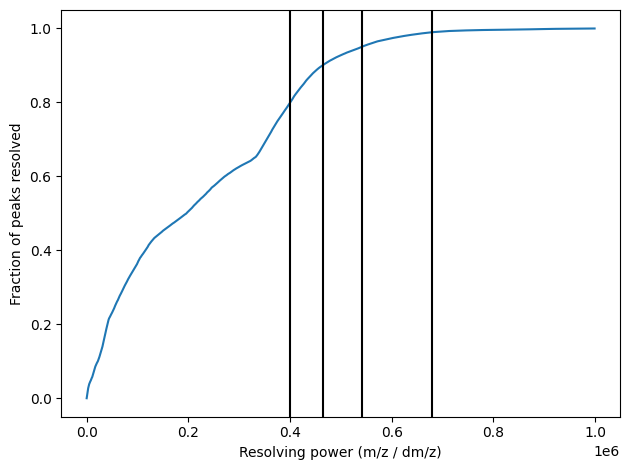

In [82]:
data.plot_reqd_resolving_power(onlysamples=True)


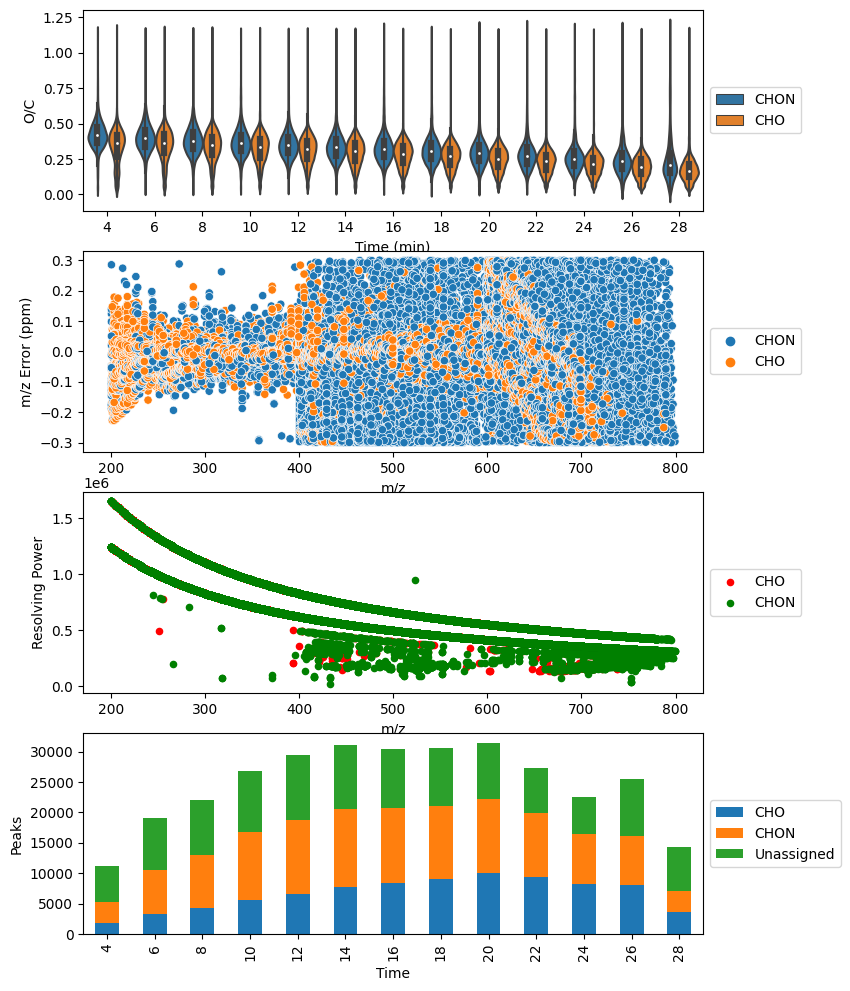

In [83]:
data.assess_all_results()

In [88]:
data_df = data.complete_results_df

data_df.to_csv("/Users/christiandewey/Downloads/spring-all.csv")

In [90]:
assignMolClass(data_df)

pltMZerror(data_df)

KeyError: 'Cu'

In [ ]:

def getParser(file):
    parser = rawFileReader.ImportMassSpectraThermoMSFileReader(file)
    return parser

def assign_formula(parser, interval, timerange, refmasslist=None):
    #Function to build formula assignment lists
    #Retrieve TIC for MS1 scans over the time range between 'timestart' and 'timestop' 

    tic=parser.get_tic(ms_type='MS')[0]
    tic_df=pd.DataFrame({'time': tic.time,'scan': tic.scans})

    times=list(range(timerange[0],timerange[1],interval))

    results=[]
    
    for timestart in times:

        scans=tic_df[tic_df.time.between(timestart,timestart+interval)].scan.tolist()

        mass_spectrum = parser.get_average_mass_spectrum_by_scanlist(scans)    
        mass_spectrum.molecular_search_settings.ion_charge = 1

        #mass_spectrum.mass_spectrum.settings.calib_sn_threshold
        #mass_spectrum.mass_spectrum.settings.calib_pol_order
        #mass_spectrum.recalibrate_mass_spectrum(mass_spectrum, imzmeas, mzrefs, order=2)
        #MzDomainCalibration(mass_spectrum, ref_file_location).run()

        if refmasslist:
            mass_spectrum.settings.min_calib_ppm_error = 10
            mass_spectrum.settings.max_calib_ppm_error = -10
            calfn = MzDomainCalibration(mass_spectrum, refmasslist)
            ref_mass_list_fmt = calfn.load_ref_mass_list(refmasslist)

            imzmeas, mzrefs = calfn.find_calibration_points(mass_spectrum, ref_mass_list_fmt,
                                                        calib_ppm_error_threshold=(0, 2.0),
                                                        calib_snr_threshold=3)

            calfn.recalibrate_mass_spectrum(mass_spectrum, imzmeas, mzrefs, order=2)


        SearchMolecularFormulas(mass_spectrum, first_hit=False).run_worker_mass_spectrum()

        mass_spectrum.percentile_assigned(report_error=True)

        assignments=mass_spectrum.to_dataframe()

        assignments['Time']=timestart

        results.append(assignments)
    
    results=pd.concat(results,ignore_index=True)

    return(results)    

def plot_ms(df1, start_mz, end_mz, tstart, df2=None,df3=None, assignment= None, ax_ms=None, lbls=None, norm=False, labs=False, colors=None):   
    if ax_ms == None:
        f, ax = plt.subplots()
    
    else:
        ax = ax_ms

    if colors is not None:
        cols = colors
    else:
        cols = ['C0', 'C1', 'C2']
    mzrange= end_mz - start_mz
    ms_t_int=df1[df1['Time'] == tstart]
    ms_df = ms_t_int[((ms_t_int['Calibrated m/z']-start_mz)<mzrange) & ((ms_t_int['Calibrated m/z']-start_mz)>0)]

    maxdf1 = max(ms_df['S/N'])

    if norm:
        ms_df['S/N Norm'] = ms_df['S/N'] / maxdf1
    else:
        ms_df['S/N Norm'] = ms_df['S/N'] 

    

    print(ms_df['S/N Norm'])

    if lbls is not None:
        labels = lbls
    else:
        lbls = [None, None, None]

 
    _, stemlines1, _ =ax.stem('Calibrated m/z','S/N Norm',data=ms_df,  markerfmt=' ', basefmt=' ', linefmt=cols[0], label = labels[0])
    
    if df2 is not None:
        ms_t_int2=df2[df2['Time'] == tstart]
        ms_df2 = ms_t_int2[(abs(ms_t_int2['Calibrated m/z']-start_mz)<mzrange)& ((ms_t_int2['Calibrated m/z']-start_mz)>0)]

        maxdf2 = max(ms_df2['S/N'])

        if norm:
            ms_df2['S/N Norm'] = ms_df2['S/N'] / maxdf2
        else:
            ms_df2['S/N Norm'] = ms_df2['S/N'] 
        
        _, stemlines2, _ =ax.stem('Calibrated m/z','S/N Norm',data=ms_df2,  markerfmt=' ', basefmt=' ', linefmt=cols[1], label = labels[1])

    if df3 is not None:
        ms_t_int3=df3[df3['Time'] == tstart]
        ms_df3 = ms_t_int3[(abs(ms_t_int3['Calibrated m/z']-start_mz)<mzrange)& ((ms_t_int3['Calibrated m/z']-start_mz)>0)]

        maxdf3 = max(ms_df3['S/N'])

        if norm:
            ms_df3['S/N Norm'] = ms_df3['S/N'] / maxdf3
        else:
            ms_df3['S/N Norm'] = ms_df3['S/N'] 
        
        _, stemlines3, _ =ax.stem('Calibrated m/z','S/N Norm',data=ms_df3,  markerfmt=' ', basefmt=' ', linefmt=cols[2], label = labels[2])
    
    if df3 is not None:
        ax.set_ylim(0, max([maxdf1, maxdf2, maxdf3]) * 1.1)
    elif df2 is not None:
        ax.set_ylim(0, max([maxdf1, maxdf2]) * 1.1)
    else: 
        ax.set_ylim(0, maxdf1 * 1.1)

    ax.set_xlim(left = start_mz - mzrange*0.1, right = start_mz + mzrange + mzrange*0.1) 

    if labs:
        for mzr,peakr,mf,er in zip(ms_df['Calibrated m/z'], ms_df['S/N Norm'], ms_df['Molecular Formula'],  ms_df['m/z Error (ppm)']):

            #if (mzr- target_mz)  == 0:
            #    mz_text = ' m/z\n%.4f' % (mzr)
            #else:
            #    mz_text = r'$\Delta$' + ' m/z\n%.4f' % (mzr- target_mz)

            mz_text = 'm/z %.4f\n%s\n%.3f ppm' % (mzr,mf,er)
            ax.text(mzr, peakr + 0.02 *max(ms_df['S/N Norm']), mz_text, ha = 'center', fontsize = 'xx-small', weight = 'bold', color=cols[0])

        if df2 is not None:

            for mzr,peakr,mf, er in zip(ms_df2['Calibrated m/z'], ms_df2['S/N Norm'], ms_df2['Molecular Formula'], ms_df2['m/z Error (ppm)']):

            #if (mzr- target_mz)  == 0:
            #    mz_text = ' m/z\n%.4f' % (mzr)
            #else:
            #    mz_text = r'$\Delta$' + ' m/z\n%.4f' % (mzr- target_mz)

                mz_text = 'm/z %.4f\n%s\n%.3f ppm' % (mzr,mf,er)
                ax.text(mzr, peakr + 0.02 *max(ms_df2['S/N Norm']), mz_text, ha = 'center', fontsize = 'xx-small', weight = 'bold', color = cols[1])

        if df3 is not None:

            for mzr,peakr,mf, er in zip(ms_df3['Calibrated m/z'], ms_df3['S/N Norm'], ms_df3['Molecular Formula'], ms_df3['m/z Error (ppm)']):

            #if (mzr- target_mz)  == 0:
            #    mz_text = ' m/z\n%.4f' % (mzr)
            #else:
            #    mz_text = r'$\Delta$' + ' m/z\n%.4f' % (mzr- target_mz)

                mz_text = 'm/z %.4f\n%s\n%.3f ppm' % (mzr,mf,er)
                ax.text(mzr, peakr + 0.02 *max(ms_df3['S/N Norm']), mz_text, ha = 'center', fontsize = 'xx-small', weight = 'bold', color = cols[2])

   # theor_mz=pattern.mdiff+result['mass']
   # theor_int=pattern.ratio*result['abundance']
   # ax.stem(theor_mz,theor_int, basefmt=' ',linefmt='gray')

   # for isotope in pattern.isotope[pattern.requirement=='Y']:
   #     ax.stem('mz','intense',data=result[isotope],  markerfmt=' ', basefmt=' ',linefmt='red')
    if ax == None:

        ax.legend(('other', 'target'),bbox_to_anchor=(1.05, 1.0), loc='upper left',frameon=False)

        if(assignment):

            mf = assignment[0]
            score = assignment[1]
            er = assignment[2]

            ax.text(1.05,0.7,mf,transform=ax.transAxes)
            ax.text(1.05,0.6,'Error (ppm) = %.3f ' %er ,transform=ax.transAxes)
            ax.text(1.05,0.5,'Score = %.3f' %score ,transform=ax.transAxes)

    if norm: 
        ax.set(xlabel='Calibrated m/z',ylabel='Normalized S/N')
    else: 
        ax.set(xlabel='Calibrated m/z',ylabel='S/N')
    #ax.set_title('%.2f' %timerange[0] + ' to %.2f' %timerange[1] +' min', fontsize = 'medium')
    ax.legend(bbox_to_anchor = (1.00, 0.5), frameon =False, loc = 'center left')
    ax.axhline(y=0.0, color='black')
    plt.setp(stemlines1,'color', cols[0], 'linewidth', 2)
    if df2 is not None:
        plt.setp(stemlines2, 'color', cols[1],'linewidth', 2)
    if df3 is not None:
        plt.setp(stemlines3, 'color', cols[2],'linewidth', 2)
    plt.tight_layout()
    if ax_ms == None:
        return ax


def filterMzRange(results, mz_range):

    mz_i = mz_range[0]
    mz_f = mz_range[1]

    sub = results[(results['m/z'] >= mz_i) & (results['m/z'] <= mz_f)]

    return sub


def pltMZerror(results, bins=50):
    ## assignment error distribution
    _, ax = plt.subplots()
    for mol_class in sorted(results['mol_class'].unique()):

        counts, bins = np.histogram(np.asarray(results[results['mol_class']==mol_class]['m/z Error (ppm)']),bins = bins)

        ax.plot(bins[:-1], counts, label = mol_class)

    ax.set_xlim(-0.5,0.5)
    ax.legend(frameon=False)
    ax.set_xlabel('m/z assignment error (ppm)')
    ax.set_ylabel('# assigned features')

    return ax

def pltMZerror_pts(results):
    ## assignment error distribution
    _, ax = plt.subplots()
    for mol_class in sorted(results['mol_class'].unique()):

        ax.scatter(results[results['mol_class']==mol_class]['Calibrated m/z'], results[results['mol_class']==mol_class]['m/z Error (ppm)'], label = mol_class)

    #ax.set_xlim(-0.5,0.5)
    ax.legend(frameon=False,bbox_to_anchor=(1.0, 0.5))
    ax.set_xlabel('calibrated m/z')
    ax.set_ylabel('assignment error (ppm)')

    return ax

def assignMolClass(resultsdf, mz_cutoff = 800, sn_lim = 3):

    filtered_results=resultsdf[(resultsdf['m/z']<mz_cutoff) & (resultsdf['S/N']>sn_lim)]

    filtered_results['N']=filtered_results['N'].fillna(0)
    filtered_results['O']=filtered_results['O'].fillna(0)
    #filtered_results['S']=filtered_results['S'].fillna(0)
    #filtered_results['P']=filtered_results['Fe'].fillna(0)
    #filtered_results['Cu']=filtered_results['Cu'].fillna(0)

    filtered_results['mol_class']='Unassigned'
    filtered_results['mol_class'][filtered_results['C']>0]='CHO'
    filtered_results['mol_class'][(filtered_results['C']>0) & (filtered_results['N']>0.5)]='CHON'
    #filtered_results['mol_class'][(filtered_results['C']>0) & (filtered_results['S']>0.5)]='CHOS'
    #filtered_results['mol_class'][(filtered_results['C']>0) & (filtered_results['Fe']>0.5)]='CHOFe'
    #iltered_results['mol_class'][(filtered_results['C']>0) & (filtered_results['Cu']>0.5)]='CHOCu'
    #filtered_results['mol_class'][(filtered_results['C']>0) & (filtered_results['Cu']>0.5) & (filtered_results['N']>0.5)]='CHONCu'
    #filtered_results['mol_class'][(filtered_results['C']>0) & (filtered_results['Cu']>0.5) & (filtered_results['S']>0.5)]='CHOSCu'
    #filtered_results['mol_class'][(filtered_results['C']>0) & (filtered_results['Na']>0.5) & (filtered_results['N']>0.5)]='CHONNa'
    #filtered_results['mol_class'][(filtered_results['C']>0) & (filtered_results['P']>0.5) & (filtered_results['Na']>0.5) & (filtered_results['N']>0.5)]='CHONPNa'


    results= filtered_results[filtered_results['mol_class'] != 'Unassigned'] #[filtered_results['Is Isotopologue']==0]
    results['N/C']=results['O']/results['C']
    results['H/C']=results['H']/results['C']
    results['N/C']=results['N']/results['C']

    return results


In [33]:
# 1: assign formula to full scan 
MSParameters.mass_spectrum.threshold_method = 'signal_noise'
MSParameters.mass_spectrum.s2n_threshold = 2
MSParameters.ms_peak.peak_min_prominence_percent = 0.001

MSParameters.molecular_search.error_method = 'None'
MSParameters.molecular_search.min_ppm_error = -0.3
MSParameters.molecular_search.max_ppm_error = 0.3

MSParameters.molecular_search.isProtonated = True
MSParameters.molecular_search.isRadical = False
MSParameters.molecular_search.isAdduct = False

MSParameters.molecular_search.score_method = "prob_score"
MSParameters.molecular_search.output_score_method = "prob_score"


MSParameters.molecular_search.url_database = None
MSParameters.molecular_search.min_dbe = -1
MSParameters.molecular_search.max_dbe = 20

MSParameters.molecular_search.usedAtoms['C'] = (1,50)
MSParameters.molecular_search.usedAtoms['H'] = (4,100)
MSParameters.molecular_search.usedAtoms['O'] = (1,20)
MSParameters.molecular_search.usedAtoms['N'] = (0,6)
MSParameters.molecular_search.usedAtoms['Cu'] = (0,1)
MSParameters.molecular_search.usedAtoms['S'] = (0,1)


In [34]:

data2='/Users/christiandewey/Library/CloudStorage/Box-Box/Boiteau Lab/Mass Spec Data/21T at NHMFL/2022-10 Nicole & Christian/Christian/spring/20221103_LBA_Boiteau_Zorbax3p5_spring_400_500.raw'
data1='/Users/christiandewey/Library/CloudStorage/Box-Box/Boiteau Lab/Mass Spec Data/21T at NHMFL/2022-10 Nicole & Christian/Christian/spring/20221103_LBA_Boiteau_Zorbax3p5_spring_fullmz.raw'
qh2o='/Users/christiandewey/Library/CloudStorage/Box-Box/Boiteau Lab/Mass Spec Data/21T at NHMFL/2022-10 Nicole & Christian/Christian/spring/20221103_LBA_Boiteau_Zorbax3p5_qh2o_400_500.raw'


refmasslist = '/Users/christiandewey/CoreMS/tests/tests_data/ftms/nom_pos.ref'

savedir = '/Users/christiandewey/Desktop/221107-CoreMS'

trange = [4,28]
interval = 2
parser1 = getParser(data1)  #fullmz
results1 = assign_formula(parser1,interval=interval,timerange=trange, refmasslist=refmasslist)



polarity: 1
MS Obj loaded - 1634 peaks found.
MS Obj loaded - 1634 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.


100%|██████████| 220/220 [00:00<00:00, 922.12it/s]


Started database insert using 5784 iterations for a total of 289174 rows


5784it [00:08, 710.01it/s]


'runworker'  16389.00 ms


Loading molecular formula database: 199394it [00:07, 27688.32it/s]
Started molecular formula search for class {"N": 1, "O": 18, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:02<00:00, 121.67it/s]        
Loading molecular formula database: 200865it [00:08, 23578.72it/s]
Started molecular formula search for class {"N": 3, "S": 1, "O": 15, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:01<00:00, 150.82it/s]
Loading molecular formula database: 204150it [00:08, 24448.05it/s]
Started molecular formula search for class {"N": 5, "O": 13, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:02<00:00, 149.18it/s]        
Loading molecular formula database: 159570it [00:05, 27022.08it/s]
Started molecular formula search for class {"N": 6, "S": 1, "O": 20, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 220/220 [00:01<00:00, 173.04it/s]


'run_molecular_formula'  54357.66 ms
1235 assigned peaks and 399 unassigned peaks, total  = 75.58 %, relative abundance = 82.42 %, RMS error (best candidate) (ppm) = 0.122
polarity: 1
MS Obj loaded - 2758 peaks found.
MS Obj loaded - 2758 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
66 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.018 ppm
minimize function performed 1235 fn evals and 18 iterations
'runworker'  5103.53 ms


Loading molecular formula database: 199394it [00:08, 23650.91it/s]
Started molecular formula search for class {"N": 1, "O": 18, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:04<00:00, 69.54it/s]        
Loading molecular formula database: 200865it [00:09, 21651.55it/s]
Started molecular formula search for class {"N": 3, "S": 1, "O": 15, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:03<00:00, 91.39it/s] 
Loading molecular formula database: 204150it [00:08, 23115.42it/s]
Started molecular formula search for class {"N": 5, "O": 13, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:04<00:00, 63.58it/s]        
Loading molecular formula database: 159570it [00:06, 23131.37it/s]
Started molecular formula search for class {"N": 6, "S": 1, "O": 20, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 220/220 [00:02<00:00, 105.60it/s]


'run_molecular_formula'  53269.94 ms
2402 assigned peaks and 356 unassigned peaks, total  = 87.09 %, relative abundance = 93.56 %, RMS error (best candidate) (ppm) = 0.122
polarity: 1
MS Obj loaded - 3769 peaks found.
MS Obj loaded - 3769 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
133 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.015 ppm
minimize function performed 330 fn evals and 6 iterations
'runworker'  5146.11 ms


Loading molecular formula database: 199394it [00:08, 22463.70it/s]
Started molecular formula search for class {"N": 1, "O": 18, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:14<00:00, 21.35it/s]        
Loading molecular formula database: 200865it [00:10, 19062.12it/s]
Started molecular formula search for class {"N": 3, "S": 1, "O": 15, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:10<00:00, 29.89it/s]
Loading molecular formula database: 204150it [00:10, 20193.47it/s]
Started molecular formula search for class {"N": 5, "O": 13, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:12<00:00, 23.61it/s]        
Loading molecular formula database: 159570it [00:08, 19272.78it/s]
Started molecular formula search for class {"N": 6, "S": 1, "O": 20, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 220/220 [00:07<00:00, 28.12it/s]


'run_molecular_formula'  87951.70 ms
3231 assigned peaks and 538 unassigned peaks, total  = 85.73 %, relative abundance = 91.59 %, RMS error (best candidate) (ppm) = 0.121
polarity: 1
MS Obj loaded - 4003 peaks found.
MS Obj loaded - 4003 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
182 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.023 ppm
minimize function performed 322 fn evals and 6 iterations
'runworker'  5102.60 ms


Loading molecular formula database: 199394it [00:09, 21593.36it/s]
Started molecular formula search for class {"N": 1, "O": 18, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:07<00:00, 38.28it/s]        
Loading molecular formula database: 200865it [00:09, 20486.78it/s]
Started molecular formula search for class {"N": 3, "S": 1, "O": 15, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:06<00:00, 49.10it/s]
Loading molecular formula database: 204150it [00:10, 19859.41it/s]
Started molecular formula search for class {"N": 5, "O": 13, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:08<00:00, 34.78it/s]        
Loading molecular formula database: 159570it [00:07, 20722.81it/s]
Started molecular formula search for class {"N": 6, "S": 1, "O": 20, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 220/220 [00:03<00:00, 58.92it/s]


'run_molecular_formula'  68862.52 ms
3525 assigned peaks and 478 unassigned peaks, total  = 88.06 %, relative abundance = 94.73 %, RMS error (best candidate) (ppm) = 0.109
polarity: 1
MS Obj loaded - 4329 peaks found.
MS Obj loaded - 4329 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
211 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.018 ppm
minimize function performed 327 fn evals and 6 iterations
'runworker'  5369.72 ms


Loading molecular formula database: 199394it [00:09, 21653.39it/s]
Started molecular formula search for class {"N": 1, "O": 18, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:07<00:00, 40.74it/s]        
Loading molecular formula database: 200865it [00:10, 19731.59it/s]
Started molecular formula search for class {"N": 3, "S": 1, "O": 15, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:05<00:00, 57.98it/s]
Loading molecular formula database: 204150it [00:10, 18917.13it/s]
Started molecular formula search for class {"N": 5, "O": 13, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:07<00:00, 38.63it/s]        
Loading molecular formula database: 159570it [00:07, 20027.70it/s]
Started molecular formula search for class {"N": 6, "S": 1, "O": 20, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 220/220 [00:04<00:00, 53.16it/s]


'run_molecular_formula'  68405.41 ms
3873 assigned peaks and 456 unassigned peaks, total  = 89.47 %, relative abundance = 95.41 %, RMS error (best candidate) (ppm) = 0.107
polarity: 1
MS Obj loaded - 4619 peaks found.
MS Obj loaded - 4619 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
241 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.018 ppm
minimize function performed 324 fn evals and 6 iterations
'runworker'  5270.38 ms


Loading molecular formula database: 199394it [00:09, 21908.84it/s]
Started molecular formula search for class {"N": 1, "O": 18, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:07<00:00, 37.67it/s]        
Loading molecular formula database: 200865it [00:10, 18440.12it/s]
Started molecular formula search for class {"N": 3, "S": 1, "O": 15, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:05<00:00, 53.69it/s]
Loading molecular formula database: 204150it [00:09, 21041.52it/s]
Started molecular formula search for class {"N": 5, "O": 13, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:07<00:00, 42.63it/s]        
Loading molecular formula database: 159570it [00:08, 19459.43it/s]
Started molecular formula search for class {"N": 6, "S": 1, "O": 20, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 220/220 [00:04<00:00, 54.94it/s]


'run_molecular_formula'  68239.62 ms
4157 assigned peaks and 462 unassigned peaks, total  = 90.00 %, relative abundance = 96.29 %, RMS error (best candidate) (ppm) = 0.102
polarity: 1
MS Obj loaded - 4899 peaks found.
MS Obj loaded - 4899 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
254 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.016 ppm
minimize function performed 324 fn evals and 6 iterations
'runworker'  5470.21 ms


Loading molecular formula database: 199394it [00:09, 20360.93it/s]
Started molecular formula search for class {"N": 1, "O": 18, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:08<00:00, 36.53it/s]        
Loading molecular formula database: 200865it [00:10, 19499.48it/s]
Started molecular formula search for class {"N": 3, "S": 1, "O": 15, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:06<00:00, 48.84it/s]
Loading molecular formula database: 204150it [00:11, 18094.71it/s]
Started molecular formula search for class {"N": 5, "O": 13, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:06<00:00, 43.35it/s]        
Loading molecular formula database: 159570it [00:07, 20448.57it/s]
Started molecular formula search for class {"N": 6, "S": 1, "O": 20, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 220/220 [00:05<00:00, 41.55it/s]


'run_molecular_formula'  71666.59 ms
4349 assigned peaks and 550 unassigned peaks, total  = 88.77 %, relative abundance = 96.06 %, RMS error (best candidate) (ppm) = 0.104
polarity: 1
MS Obj loaded - 5289 peaks found.
MS Obj loaded - 5289 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
268 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.023 ppm
minimize function performed 470 fn evals and 10 iterations
'runworker'  5234.58 ms


Loading molecular formula database: 199394it [00:09, 21314.75it/s]
Started molecular formula search for class {"N": 1, "O": 18, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:10<00:00, 29.34it/s]        
Loading molecular formula database: 200865it [00:11, 18203.08it/s]
Started molecular formula search for class {"N": 3, "S": 1, "O": 15, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:08<00:00, 36.76it/s]
Loading molecular formula database: 204150it [00:10, 19472.96it/s]
Started molecular formula search for class {"N": 5, "O": 13, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:07<00:00, 40.98it/s]        
Loading molecular formula database: 159570it [00:08, 19046.55it/s]
Started molecular formula search for class {"N": 6, "S": 1, "O": 20, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 220/220 [00:05<00:00, 40.58it/s]


'run_molecular_formula'  76102.50 ms
4587 assigned peaks and 702 unassigned peaks, total  = 86.73 %, relative abundance = 95.06 %, RMS error (best candidate) (ppm) = 0.105
polarity: 1
MS Obj loaded - 5527 peaks found.
MS Obj loaded - 5527 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
262 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.016 ppm
minimize function performed 3029 fn evals and 71 iterations
'runworker'  5208.16 ms


Loading molecular formula database: 199394it [00:09, 20810.32it/s]
Started molecular formula search for class {"N": 1, "O": 18, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:12<00:00, 23.53it/s]        
Loading molecular formula database: 200865it [00:11, 18178.38it/s]
Started molecular formula search for class {"N": 3, "S": 1, "O": 15, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:10<00:00, 27.29it/s]
Loading molecular formula database: 204150it [00:11, 18474.96it/s]
Started molecular formula search for class {"N": 5, "O": 13, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:14<00:00, 21.29it/s]        
Loading molecular formula database: 159570it [00:09, 17399.02it/s]
Started molecular formula search for class {"N": 6, "S": 1, "O": 20, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 220/220 [00:07<00:00, 27.78it/s]


'run_molecular_formula'  92297.52 ms
4758 assigned peaks and 769 unassigned peaks, total  = 86.09 %, relative abundance = 93.47 %, RMS error (best candidate) (ppm) = 0.098
polarity: 1
MS Obj loaded - 4048 peaks found.
MS Obj loaded - 4048 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
230 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.017 ppm
minimize function performed 503 fn evals and 10 iterations
'runworker'  5796.19 ms


Loading molecular formula database: 199394it [00:08, 22760.07it/s]
Started molecular formula search for class {"N": 1, "O": 18, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:07<00:00, 40.53it/s]        
Loading molecular formula database: 200865it [00:09, 20441.27it/s]
Started molecular formula search for class {"N": 3, "S": 1, "O": 15, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:05<00:00, 52.81it/s]
Loading molecular formula database: 204150it [00:10, 18615.64it/s]
Started molecular formula search for class {"N": 5, "O": 13, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:05<00:00, 58.08it/s]        
Loading molecular formula database: 159570it [00:06, 22847.13it/s]
Started molecular formula search for class {"N": 6, "S": 1, "O": 20, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 220/220 [00:04<00:00, 48.56it/s]


'run_molecular_formula'  65509.39 ms
3589 assigned peaks and 459 unassigned peaks, total  = 88.66 %, relative abundance = 93.07 %, RMS error (best candidate) (ppm) = 0.088
polarity: 1
MS Obj loaded - 3321 peaks found.
MS Obj loaded - 3321 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
211 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.017 ppm
minimize function performed 331 fn evals and 6 iterations
'runworker'  5836.39 ms


Loading molecular formula database: 199394it [00:08, 23402.14it/s]
Started molecular formula search for class {"N": 1, "O": 18, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:05<00:00, 51.37it/s]        
Loading molecular formula database: 200865it [00:09, 20845.77it/s]
Started molecular formula search for class {"N": 3, "S": 1, "O": 15, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:04<00:00, 62.23it/s]
Loading molecular formula database: 204150it [00:09, 21287.35it/s]
Started molecular formula search for class {"N": 5, "O": 13, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:05<00:00, 54.97it/s]        
Loading molecular formula database: 159570it [00:07, 20068.89it/s]
Started molecular formula search for class {"N": 6, "S": 1, "O": 20, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 220/220 [00:04<00:00, 45.28it/s]


'run_molecular_formula'  62892.88 ms
2839 assigned peaks and 482 unassigned peaks, total  = 85.49 %, relative abundance = 90.32 %, RMS error (best candidate) (ppm) = 0.080
polarity: 1
MS Obj loaded - 3403 peaks found.
MS Obj loaded - 3403 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
185 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.011 ppm
minimize function performed 336 fn evals and 6 iterations
'runworker'  5496.48 ms


Loading molecular formula database: 199394it [00:08, 22312.58it/s]
Started molecular formula search for class {"N": 1, "O": 18, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:06<00:00, 47.77it/s]        
Loading molecular formula database: 200865it [00:10, 20066.41it/s]
Started molecular formula search for class {"N": 3, "S": 1, "O": 15, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:06<00:00, 49.31it/s]
Loading molecular formula database: 204150it [00:10, 20143.84it/s]
Started molecular formula search for class {"N": 5, "O": 13, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:06<00:00, 47.14it/s]        
Loading molecular formula database: 159570it [00:07, 21331.05it/s]
Started molecular formula search for class {"N": 6, "S": 1, "O": 20, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 220/220 [00:07<00:00, 29.77it/s]


'run_molecular_formula'  68537.76 ms
2595 assigned peaks and 808 unassigned peaks, total  = 76.26 %, relative abundance = 83.16 %, RMS error (best candidate) (ppm) = 0.072


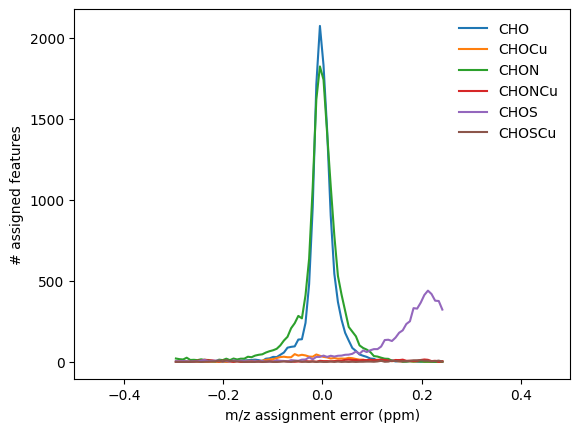

In [37]:
fresults1 = assignMolClass(results1)

pltMZerror(fresults1, bins=75)
plt.show()



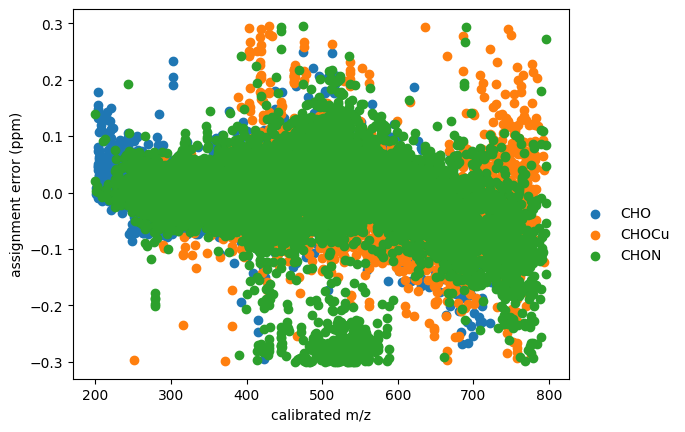

In [11]:
pltMZerror_pts(fresults1)

plt.show()

In [8]:
#trange = [12,14]
#interval = 2
parser2 = getParser(data2)  #400-500mz
results2 = assign_formula(parser2,interval=interval,timerange=trange, refmasslist=refmasslist)



polarity: 1
MS Obj loaded - 1155 peaks found.
MS Obj loaded - 1155 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  5084.61 ms


Loading molecular formula database: 199772it [00:05, 35837.64it/s]
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:01<00:00, 209.66it/s]
Loading molecular formula database: 67135it [00:01, 42076.51it/s]
Started molecular formula search for class {"N": 4, "O": 20, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 339.32it/s]


'run_molecular_formula'  14026.63 ms
540 assigned peaks and 615 unassigned peaks, total  = 46.75 %, relative abundance = 45.15 %, RMS error (best candidate) (ppm) = 0.220
polarity: 1
MS Obj loaded - 1591 peaks found.
MS Obj loaded - 1591 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
2 calibration points matched within thresholds.
'runworker'  5048.14 ms


Loading molecular formula database: 199772it [00:05, 36377.48it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:01<00:00, 156.42it/s]
Loading molecular formula database: 67135it [00:01, 37894.33it/s]
Started molecular formula search for class {"N": 4, "O": 20, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 249.38it/s]


'run_molecular_formula'  14671.76 ms
973 assigned peaks and 618 unassigned peaks, total  = 61.16 %, relative abundance = 62.23 %, RMS error (best candidate) (ppm) = 0.089
polarity: 1
MS Obj loaded - 1981 peaks found.
MS Obj loaded - 1981 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
5 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.030 ppm
minimize function performed 177 fn evals and 2 iterations
'runworker'  4901.55 ms


Loading molecular formula database: 199772it [00:05, 37410.62it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:02<00:00, 125.92it/s]
Loading molecular formula database: 67135it [00:01, 35622.49it/s]
Started molecular formula search for class {"N": 4, "O": 20, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 197.12it/s]


'run_molecular_formula'  15056.92 ms
1255 assigned peaks and 726 unassigned peaks, total  = 63.35 %, relative abundance = 68.51 %, RMS error (best candidate) (ppm) = 0.101
polarity: 1
MS Obj loaded - 2115 peaks found.
MS Obj loaded - 2115 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
58 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.011 ppm
minimize function performed 690 fn evals and 10 iterations
'runworker'  5366.23 ms


Loading molecular formula database: 199772it [00:05, 39739.66it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:02<00:00, 118.06it/s]
Loading molecular formula database: 67135it [00:01, 35619.50it/s]
Started molecular formula search for class {"N": 4, "O": 20, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 190.33it/s]


'run_molecular_formula'  15385.80 ms
1414 assigned peaks and 701 unassigned peaks, total  = 66.86 %, relative abundance = 71.02 %, RMS error (best candidate) (ppm) = 0.058
polarity: 1
MS Obj loaded - 2461 peaks found.
MS Obj loaded - 2461 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
96 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.022 ppm
minimize function performed 612 fn evals and 8 iterations
'runworker'  4860.89 ms


Loading molecular formula database: 199772it [00:05, 36790.95it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:02<00:00, 103.06it/s]
Loading molecular formula database: 67135it [00:01, 35787.95it/s]
Started molecular formula search for class {"N": 4, "O": 20, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 163.66it/s]


'run_molecular_formula'  15729.90 ms
1624 assigned peaks and 837 unassigned peaks, total  = 65.99 %, relative abundance = 75.41 %, RMS error (best candidate) (ppm) = 0.061
polarity: 1
MS Obj loaded - 2508 peaks found.
MS Obj loaded - 2508 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
108 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.018 ppm
minimize function performed 372 fn evals and 7 iterations
'runworker'  5164.44 ms


Loading molecular formula database: 199772it [00:05, 38012.42it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:02<00:00, 100.84it/s]
Loading molecular formula database: 67135it [00:01, 37506.26it/s]
Started molecular formula search for class {"N": 4, "O": 20, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 163.11it/s]


'run_molecular_formula'  15838.54 ms
1693 assigned peaks and 815 unassigned peaks, total  = 67.50 %, relative abundance = 79.26 %, RMS error (best candidate) (ppm) = 0.058
polarity: 1
MS Obj loaded - 2527 peaks found.
MS Obj loaded - 2527 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
117 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.015 ppm
minimize function performed 371 fn evals and 7 iterations
'runworker'  5083.97 ms


Loading molecular formula database: 199772it [00:05, 39527.10it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:02<00:00, 100.13it/s]
Loading molecular formula database: 67135it [00:01, 33851.63it/s]
Started molecular formula search for class {"N": 4, "O": 20, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 162.01it/s]


'run_molecular_formula'  15774.72 ms
1729 assigned peaks and 798 unassigned peaks, total  = 68.42 %, relative abundance = 81.35 %, RMS error (best candidate) (ppm) = 0.057
polarity: 1
MS Obj loaded - 2598 peaks found.
MS Obj loaded - 2598 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
118 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.018 ppm
minimize function performed 374 fn evals and 7 iterations
'runworker'  4815.66 ms


Loading molecular formula database: 199772it [00:05, 36769.89it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:03<00:00, 98.33it/s] 
Loading molecular formula database: 67135it [00:02, 32900.11it/s]
Started molecular formula search for class {"N": 4, "O": 20, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 158.99it/s]


'run_molecular_formula'  16009.57 ms
1818 assigned peaks and 780 unassigned peaks, total  = 69.98 %, relative abundance = 83.82 %, RMS error (best candidate) (ppm) = 0.058
polarity: 1
MS Obj loaded - 2489 peaks found.
MS Obj loaded - 2489 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
119 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.019 ppm
minimize function performed 369 fn evals and 7 iterations
'runworker'  4892.89 ms


Loading molecular formula database: 199772it [00:05, 34812.08it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:02<00:00, 101.88it/s]
Loading molecular formula database: 67135it [00:01, 36281.46it/s]
Started molecular formula search for class {"N": 4, "O": 20, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 161.64it/s]


'run_molecular_formula'  16086.99 ms
1795 assigned peaks and 694 unassigned peaks, total  = 72.12 %, relative abundance = 85.50 %, RMS error (best candidate) (ppm) = 0.057
polarity: 1
MS Obj loaded - 2574 peaks found.
MS Obj loaded - 2574 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
116 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.019 ppm
minimize function performed 376 fn evals and 7 iterations
'runworker'  4868.28 ms


Loading molecular formula database: 199772it [00:05, 35091.39it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:03<00:00, 99.93it/s] 
Loading molecular formula database: 67135it [00:01, 41149.15it/s]
Started molecular formula search for class {"N": 4, "O": 20, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 156.76it/s]


'run_molecular_formula'  15875.12 ms
1899 assigned peaks and 675 unassigned peaks, total  = 73.78 %, relative abundance = 86.02 %, RMS error (best candidate) (ppm) = 0.062
polarity: 1
MS Obj loaded - 1870 peaks found.
MS Obj loaded - 1870 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
97 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.016 ppm
minimize function performed 368 fn evals and 7 iterations
'runworker'  5373.44 ms


Loading molecular formula database: 199772it [00:05, 37878.39it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:02<00:00, 134.39it/s]
Loading molecular formula database: 67135it [00:01, 37490.45it/s]
Started molecular formula search for class {"N": 4, "O": 20, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 213.11it/s]


'run_molecular_formula'  15180.87 ms
1446 assigned peaks and 424 unassigned peaks, total  = 77.33 %, relative abundance = 86.33 %, RMS error (best candidate) (ppm) = 0.051
polarity: 1
MS Obj loaded - 2339 peaks found.
MS Obj loaded - 2339 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
103 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.015 ppm
minimize function performed 373 fn evals and 7 iterations
'runworker'  4950.56 ms


Loading molecular formula database: 199772it [00:05, 35041.75it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:02<00:00, 108.70it/s]
Loading molecular formula database: 67135it [00:01, 41610.99it/s]
Started molecular formula search for class {"N": 4, "O": 20, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 171.14it/s]


'run_molecular_formula'  15650.06 ms
1563 assigned peaks and 776 unassigned peaks, total  = 66.82 %, relative abundance = 78.92 %, RMS error (best candidate) (ppm) = 0.063


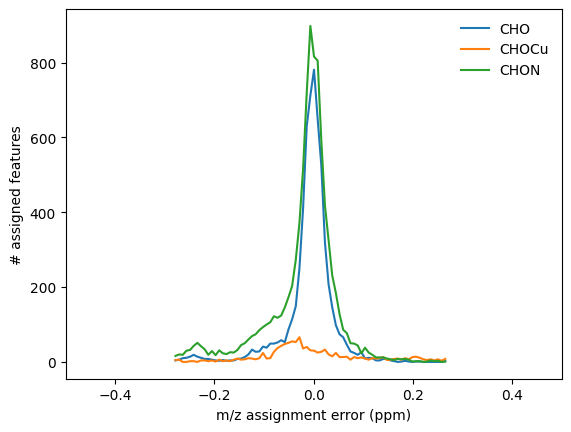

In [12]:
fresults2 = assignMolClass(results2)

pltMZerror(fresults2, bins=75)

plt.show()

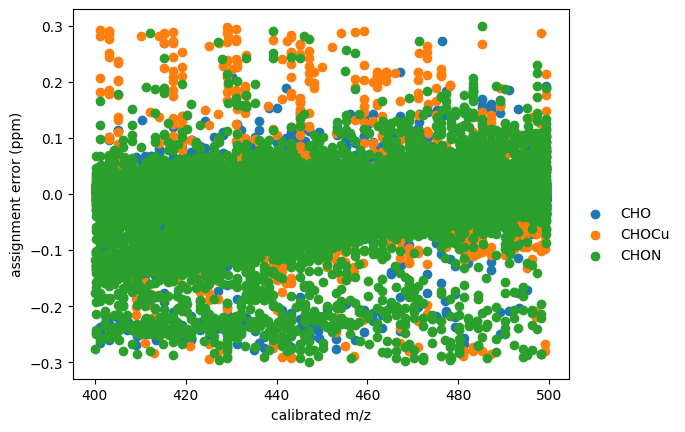

In [13]:
pltMZerror_pts(fresults2)

plt.show()

In [9]:
#trange = [12,14]
#interval = 4

qh2o_parser = getParser(qh2o)
qh2o_results = assign_formula(qh2o_parser,interval=interval,timerange=trange, refmasslist=refmasslist )

polarity: 1
MS Obj loaded - 163 peaks found.
MS Obj loaded - 163 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  5432.52 ms


Loading molecular formula database: 199772it [00:05, 39923.57it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 997.11it/s]
Loading molecular formula database: 67135it [00:01, 39290.80it/s]
Started molecular formula search for class {"N": 4, "O": 20, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 1312.66it/s]


'run_molecular_formula'  12554.72 ms
11 assigned peaks and 152 unassigned peaks, total  = 6.75 %, relative abundance = 0.88 %, RMS error (best candidate) (ppm) = 0.136
polarity: 1
MS Obj loaded - 149 peaks found.
MS Obj loaded - 149 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4854.75 ms


Loading molecular formula database: 199772it [00:05, 38105.47it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 1051.24it/s]
Loading molecular formula database: 67135it [00:01, 39841.59it/s]
Started molecular formula search for class {"N": 4, "O": 20, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 1363.72it/s]


'run_molecular_formula'  12174.23 ms
6 assigned peaks and 143 unassigned peaks, total  = 4.03 %, relative abundance = 0.73 %, RMS error (best candidate) (ppm) = 0.144
polarity: 1
MS Obj loaded - 190 peaks found.
MS Obj loaded - 190 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4997.16 ms


Loading molecular formula database: 199772it [00:05, 36780.80it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 904.30it/s]
Loading molecular formula database: 67135it [00:01, 42473.14it/s]
Started molecular formula search for class {"N": 4, "O": 20, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 1210.00it/s]


'run_molecular_formula'  12457.82 ms
11 assigned peaks and 179 unassigned peaks, total  = 5.79 %, relative abundance = 0.89 %, RMS error (best candidate) (ppm) = 0.173
polarity: 1
MS Obj loaded - 222 peaks found.
MS Obj loaded - 222 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4877.94 ms


Loading molecular formula database: 199772it [00:05, 36380.36it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 829.31it/s]
Loading molecular formula database: 67135it [00:01, 37514.09it/s]
Started molecular formula search for class {"N": 4, "O": 20, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 1123.52it/s]


'run_molecular_formula'  12643.34 ms
13 assigned peaks and 209 unassigned peaks, total  = 5.86 %, relative abundance = 1.29 %, RMS error (best candidate) (ppm) = 0.172
polarity: 1
MS Obj loaded - 268 peaks found.
MS Obj loaded - 268 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  4770.26 ms


Loading molecular formula database: 199772it [00:05, 35618.32it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 723.62it/s]
Loading molecular formula database: 67135it [00:01, 37291.71it/s]
Started molecular formula search for class {"N": 4, "O": 20, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 905.28it/s]


'run_molecular_formula'  12738.88 ms
16 assigned peaks and 252 unassigned peaks, total  = 5.97 %, relative abundance = 2.05 %, RMS error (best candidate) (ppm) = 0.202
polarity: 1
MS Obj loaded - 400 peaks found.
MS Obj loaded - 400 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
0 calibration points matched within thresholds.
'runworker'  5243.41 ms


Loading molecular formula database: 199772it [00:05, 39949.29it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 542.19it/s]
Loading molecular formula database: 67135it [00:01, 35418.75it/s]
Started molecular formula search for class {"N": 4, "O": 20, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 748.97it/s]


'run_molecular_formula'  12865.13 ms
31 assigned peaks and 369 unassigned peaks, total  = 7.75 %, relative abundance = 2.76 %, RMS error (best candidate) (ppm) = 0.183
polarity: 1
MS Obj loaded - 430 peaks found.
MS Obj loaded - 430 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
4 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.000 ppm
minimize function performed 1206 fn evals and 16 iterations
'runworker'  4932.90 ms


Loading molecular formula database: 199772it [00:05, 35942.89it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 468.49it/s]
Loading molecular formula database: 67135it [00:01, 37933.00it/s]
Started molecular formula search for class {"N": 4, "O": 20, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 658.31it/s]


'run_molecular_formula'  13092.57 ms
216 assigned peaks and 214 unassigned peaks, total  = 50.23 %, relative abundance = 61.16 %, RMS error (best candidate) (ppm) = 0.127
polarity: 1
MS Obj loaded - 506 peaks found.
MS Obj loaded - 506 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
9 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.018 ppm
minimize function performed 589 fn evals and 8 iterations
'runworker'  5369.49 ms


Loading molecular formula database: 199772it [00:05, 39684.03it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 404.49it/s]
Loading molecular formula database: 67135it [00:01, 38101.42it/s]
Started molecular formula search for class {"N": 4, "O": 20, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 610.05it/s]


'run_molecular_formula'  13110.98 ms
266 assigned peaks and 240 unassigned peaks, total  = 52.57 %, relative abundance = 64.49 %, RMS error (best candidate) (ppm) = 0.126
polarity: 1
MS Obj loaded - 445 peaks found.
MS Obj loaded - 445 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
8 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.007 ppm
minimize function performed 577 fn evals and 8 iterations
'runworker'  5067.11 ms


Loading molecular formula database: 199772it [00:05, 39111.90it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 446.59it/s]
Loading molecular formula database: 67135it [00:01, 34986.72it/s]
Started molecular formula search for class {"N": 4, "O": 20, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 680.69it/s]


'run_molecular_formula'  12952.53 ms
259 assigned peaks and 186 unassigned peaks, total  = 58.20 %, relative abundance = 66.04 %, RMS error (best candidate) (ppm) = 0.110
polarity: 1
MS Obj loaded - 369 peaks found.
MS Obj loaded - 369 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
6 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.005 ppm
minimize function performed 836 fn evals and 12 iterations
'runworker'  5388.49 ms


Loading molecular formula database: 199772it [00:04, 40411.66it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 533.01it/s]
Loading molecular formula database: 67135it [00:01, 38051.92it/s]
Started molecular formula search for class {"N": 4, "O": 20, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 796.68it/s]


'run_molecular_formula'  12822.68 ms
197 assigned peaks and 172 unassigned peaks, total  = 53.39 %, relative abundance = 72.64 %, RMS error (best candidate) (ppm) = 0.135
polarity: 1
MS Obj loaded - 216 peaks found.
MS Obj loaded - 216 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
3 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.000 ppm
minimize function performed 332 fn evals and 3 iterations
'runworker'  5374.02 ms


Loading molecular formula database: 199772it [00:05, 39247.25it/s] 
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 817.74it/s]
Loading molecular formula database: 67135it [00:01, 38025.88it/s]
Started molecular formula search for class {"N": 4, "O": 20, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 976.95it/s]


'run_molecular_formula'  12735.38 ms
76 assigned peaks and 140 unassigned peaks, total  = 35.19 %, relative abundance = 62.41 %, RMS error (best candidate) (ppm) = 0.202
polarity: 1
MS Obj loaded - 373 peaks found.
MS Obj loaded - 373 peaks found.
Reference mass list loaded - 290 calibration masses loaded.
4 calibration points matched within thresholds.
minimize function completed with RMS error of: 0.006 ppm
minimize function performed 180 fn evals and 2 iterations
'runworker'  4888.16 ms


Loading molecular formula database: 199772it [00:05, 35211.33it/s]
Started molecular formula search for class {"N": 3, "O": 15, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 300/300 [00:00<00:00, 525.08it/s]
Loading molecular formula database: 67135it [00:01, 41559.32it/s]
Started molecular formula search for class {"N": 4, "O": 20, "Cu": 1, "Na": 1}, (de)protonated : 100%|██████████| 100/100 [00:00<00:00, 716.10it/s]


'run_molecular_formula'  12926.37 ms
164 assigned peaks and 209 unassigned peaks, total  = 43.97 %, relative abundance = 35.81 %, RMS error (best candidate) (ppm) = 0.146


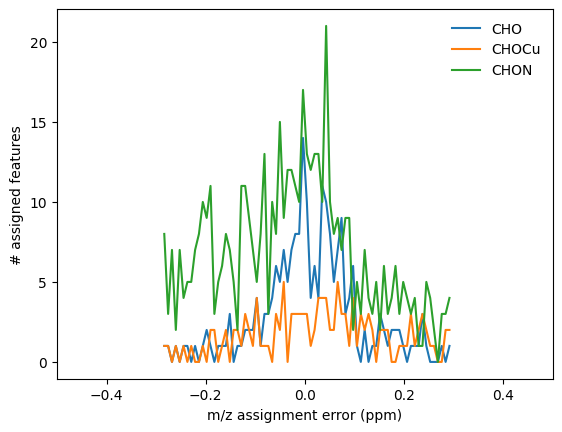

In [14]:
fresults3 = assignMolClass(qh2o_results)

pltMZerror(fresults3, bins=75)

plt.show()

In [15]:

## filter molform 
sub = filterMzRange(results1,[400,500])

blank_subtracted_n = results2[~results2['Molecular Formula'].isin(qh2o_results['Molecular Formula'])]

blank_subtracted_full = sub[~sub['Molecular Formula'].isin(qh2o_results['Molecular Formula'])]

overlap = blank_subtracted_n[blank_subtracted_n['Molecular Formula'].isin(blank_subtracted_full['Molecular Formula'])]

narrow_unique = blank_subtracted_n[~blank_subtracted_n['Molecular Formula'].isin(blank_subtracted_full['Molecular Formula'])]

full_range_bs = results1[~results1['Molecular Formula'].isin(qh2o_results['Molecular Formula'])]


22096     29.718683
22101     46.404848
22105     10.721534
22106      6.118698
22107     41.787552
            ...    
23194    152.547575
23197      8.049304
23198      6.555738
23199    174.027108
23201     33.628470
Name: S/N Norm, Length: 1095, dtype: float64


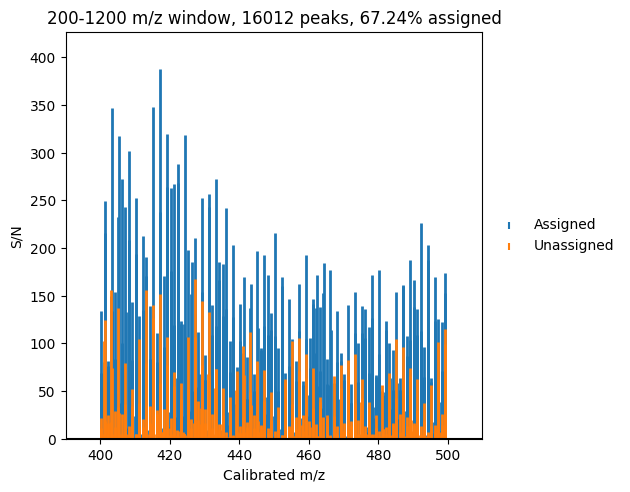

In [16]:


sn_lim = 20
df2=narrow_unique[narrow_unique['S/N']<sn_lim]

df1=blank_subtracted_full[blank_subtracted_full['S/N']<sn_lim]
df2=narrow_unique[narrow_unique['S/N']<sn_lim]
df3=overlap[overlap['S/N']<sn_lim]


df2a = sub[sub['Molecular Formula'].notna()]
df2b = sub[sub['Molecular Formula'].isna()]

n_mzs = np.shape(sub)[0]

per_a = np.shape(df2a)[0]  / (np.shape(df2a)[0] + np.shape(df2b)[0]) *100
per_b = np.shape(df2b)[0]  / (np.shape(df2a)[0] + np.shape(df2b)[0]) *100

plot_ms(df2a,df2=df2b, start_mz=400,end_mz = 500, tstart = 16, lbls=['Assigned', 'Unassigned'],labs=False) 

plt.title('200-1200 m/z window, %s peaks, %.2f%% assigned' %(n_mzs, per_a))
plt.show()






11814     11.215154
11815      4.618664
11816     48.348724
11817     10.117067
11818      2.818922
            ...    
13539      2.181479
13540    122.802990
13541      2.476481
13542      2.004465
13543     26.078222
Name: S/N Norm, Length: 1730, dtype: float64


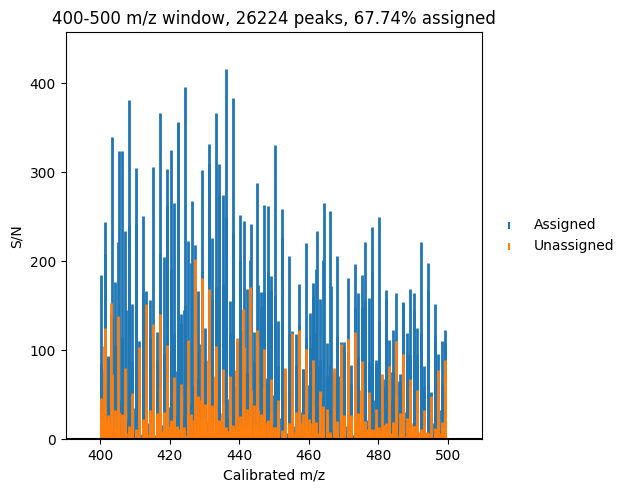

In [17]:


df2a = results2[results2['Molecular Formula'].notna()]
df2b = results2[results2['Molecular Formula'].isna()]

n_mzs = np.shape(results2)[0]

per_a = np.shape(df2a)[0]  / (np.shape(df2a)[0] + np.shape(df2b)[0]) *100
per_b = np.shape(df2b)[0]  / (np.shape(df2a)[0] + np.shape(df2b)[0]) *100

plot_ms(df2a,df2=df2b, start_mz=400,end_mz = 500, tstart = 16, lbls=['Assigned', 'Unassigned' ],labs=False) 

plt.title('400-500 m/z window, %s peaks, %.2f%% assigned' %(n_mzs, per_a))
plt.show()

8449     10.739861
8450      2.255599
8451      3.533641
8452     14.515331
8453     54.823377
           ...    
11043     2.679138
11044     2.127996
11045     9.789416
11046     2.435786
11047     3.315222
Name: S/N Norm, Length: 2599, dtype: float64


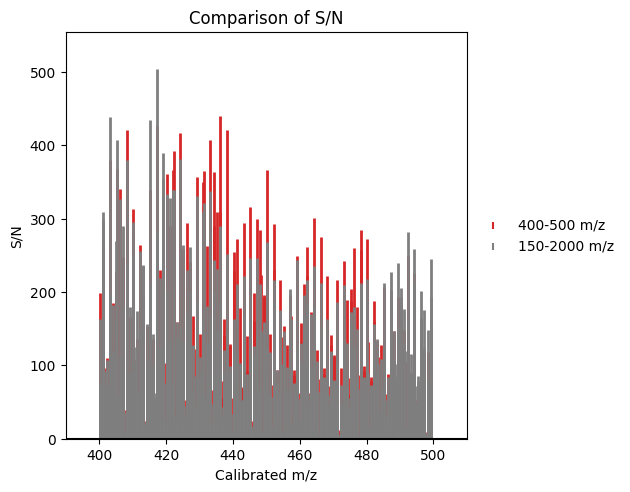

In [214]:

df2a = results2 #[results2['Molecular Formula'].notna()]
df2b = sub #[sub['Molecular Formula'].notna()]

n_mzs = np.shape(results2)[0]

per_a = np.shape(df2a)[0]  / (np.shape(df2a)[0] + np.shape(df2b)[0]) *100
per_b = np.shape(df2b)[0]  / (np.shape(df2a)[0] + np.shape(df2b)[0]) *100

plot_ms(df2a,df2=df2b, start_mz=400,end_mz = 500, tstart = 16, lbls=['400-500 m/z', '150-2000 m/z' ],labs=False, colors=['C3','C7']) 

plt.title('Comparison of S/N')
plt.show()

11814     11.215154
11815      4.618664
11816     48.348724
11818      2.818922
11819     85.644396
            ...    
13538      7.930126
13540    122.802990
13541      2.476481
13542      2.004465
13543     26.078222
Name: S/N Norm, Length: 1275, dtype: float64


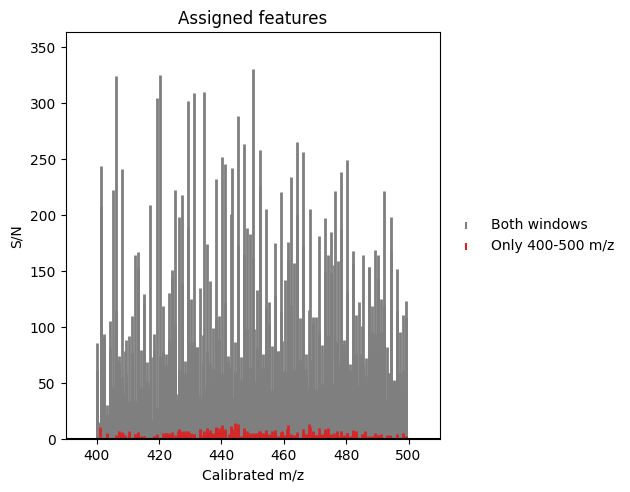

In [18]:
blank_subtracted_n = results2[~results2['Molecular Formula'].isin(qh2o_results['Molecular Formula'])]

blank_subtracted_full = sub[~sub['Molecular Formula'].isin(qh2o_results['Molecular Formula'])]

overlap = blank_subtracted_n[blank_subtracted_n['Molecular Formula'].isin(blank_subtracted_full['Molecular Formula'])]

narrow_unique = blank_subtracted_n[~blank_subtracted_n['Molecular Formula'].isin(blank_subtracted_full['Molecular Formula'])]

full_range_bs = results1[~results1['Molecular Formula'].isin(qh2o_results['Molecular Formula'])]



df2a = overlap #[results2['Molecular Formula'].notna()]
df2b = narrow_unique #[sub['Molecular Formula'].notna()]

n_mzs = np.shape(results2)[0]

per_a = np.shape(df2a)[0]  / (np.shape(df2a)[0] + np.shape(df2b)[0]) *100
per_b = np.shape(df2b)[0]  / (np.shape(df2a)[0] + np.shape(df2b)[0]) *100

plot_ms(df2a,df2=df2b, start_mz=400,end_mz = 500, tstart = 16, lbls=['Both windows', 'Only 400-500 m/z' ],labs=False,colors=['C7','C3']) 

plt.title('Assigned features')
plt.show()

12721     38.289563
12724     81.364891
12728     23.476701
12729     10.916603
12731      3.204689
12732     38.116747
12734     25.428832
12736     51.928140
12738     13.575857
12739     37.941268
12741    132.477256
12743     21.651461
12744     30.800705
12748      4.858318
12749      5.540937
Name: S/N Norm, dtype: float64


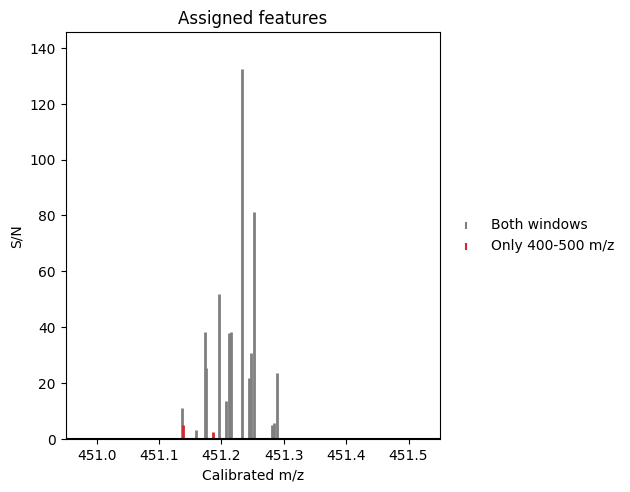

In [19]:
blank_subtracted_n = results2[~results2['Molecular Formula'].isin(qh2o_results['Molecular Formula'])]

blank_subtracted_full = sub[~sub['Molecular Formula'].isin(qh2o_results['Molecular Formula'])]

overlap = blank_subtracted_n[blank_subtracted_n['Molecular Formula'].isin(blank_subtracted_full['Molecular Formula'])]

narrow_unique = blank_subtracted_n[~blank_subtracted_n['Molecular Formula'].isin(blank_subtracted_full['Molecular Formula'])]

full_range_bs = results1[~results1['Molecular Formula'].isin(qh2o_results['Molecular Formula'])]



df2a = overlap#[overlap['S'] > 0]
df2b = narrow_unique#[narrow_unique['S'] > 0] #[sub['Molecular Formula'].notna()]



plot_ms(df2a,df2=df2b, start_mz=451,end_mz = 451.5, tstart = 16, lbls=['Both windows', 'Only 400-500 m/z' ],labs=False,colors=['C7','C3']) 

plt.title('Assigned features')
plt.show()

11854     2.395107
11857    11.943740
11883     8.472082
11887    13.495140
11915     2.393822
           ...    
13470    11.509980
13487     6.093011
13499    30.166434
13500     4.974354
13531     7.656687
Name: S/N Norm, Length: 85, dtype: float64


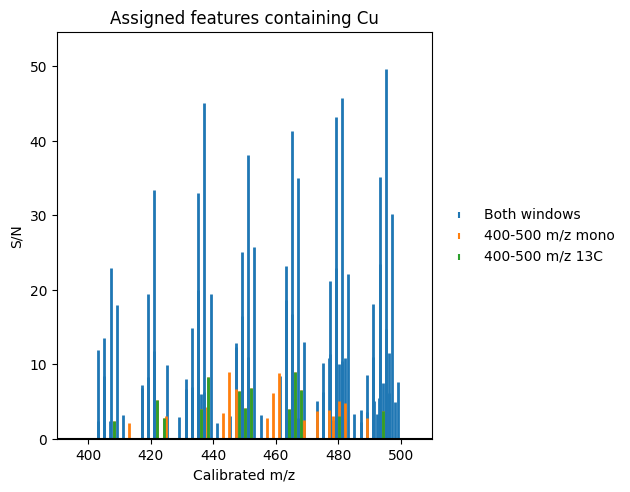

In [20]:
blank_subtracted_n = results2[~results2['Molecular Formula'].isin(qh2o_results['Molecular Formula'])]

blank_subtracted_full = sub[~sub['Molecular Formula'].isin(qh2o_results['Molecular Formula'])]

overlap = blank_subtracted_n[blank_subtracted_n['Molecular Formula'].isin(blank_subtracted_full['Molecular Formula'])]

narrow_unique = blank_subtracted_n[~blank_subtracted_n['Molecular Formula'].isin(blank_subtracted_full['Molecular Formula'])]

full_range_bs = results1[~results1['Molecular Formula'].isin(qh2o_results['Molecular Formula'])]



df2a = overlap[overlap['Cu'] > 0]
df2b = narrow_unique[narrow_unique['Cu'] > 0] #[sub['Molecular Formula'].notna()]
df2c = df2b[df2b['13C'] > 0]



plot_ms(df2a,df2=df2b,df3=df2c, start_mz=400,end_mz = 500, tstart = 16, lbls=['Both windows', '400-500 m/z mono', '400-500 m/z 13C' ],labs=False) 

plt.title('Assigned features containing Cu')
plt.show()

ValueError: s must be a scalar, or float array-like with the same size as x and y

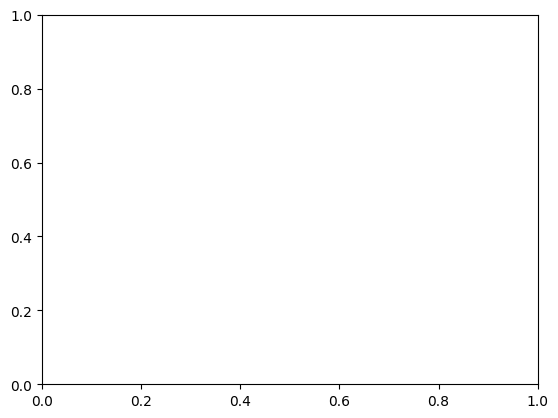

In [218]:
df2a_f = assignMolClass(df2a)

fig, ax = plt.subplots()
ax.scatter(x=df2a_f['N/C'],y=df2a_f['O/C'],s=df2a['Peak Height']/100,c='C3',label='400-500 m/z')
ax.set(xlabel='O/C',ylabel='N/C')
ax.set_xlim(0,1.2)
ax.set_ylim(0,0.5)
#ax.legend(frameon=False)
plt.show()

180     2.696597
370     2.343571
1013    2.502200
1049    2.416135
1134    2.069163
1302    2.006363
1319    2.258869
1387    2.344515
1637    2.341975
1710    2.504763
1728    2.792120
Name: S/N Norm, dtype: float64


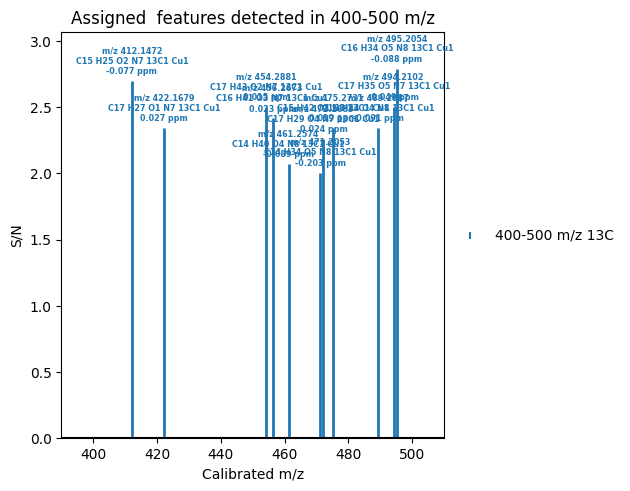

In [185]:


plot_ms(df2c, start_mz=400,end_mz = 500, tstart = 16, lbls=[ '400-500 m/z 13C' ],labs=True) 

plt.title('Assigned  features detected in 400-500 m/z')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


179     23.833342
180      2.696597
369     20.825349
370      2.343571
425      2.846401
463      2.927746
572      4.171864
675      2.027237
853      4.026634
983      4.371135
1012    19.258412
1013     2.502200
1048    19.951509
1049     2.416135
1108     2.914003
1133    18.703138
1134     2.069163
1140     2.745964
1301    17.574180
1302     2.006363
1318    19.413562
1319     2.258869
1323     2.984644
1359     2.435351
1386    21.612367
1387     2.344515
1425     4.199668
1531     2.017922
1536     2.962540
1611     2.435297
1636    21.070407
1637     2.341975
1709    20.797747
1710     2.504763
1727    21.584907
1728     2.792120
Name: S/N Norm, dtype: float64
1642    4.038326
1792    3.194318
Name: S/N Norm, dtype: float64


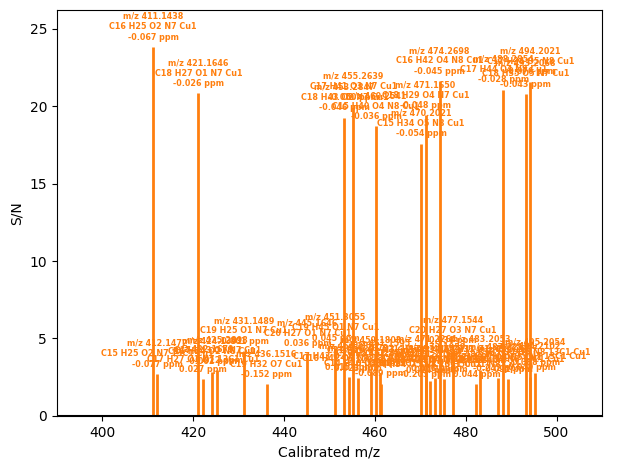

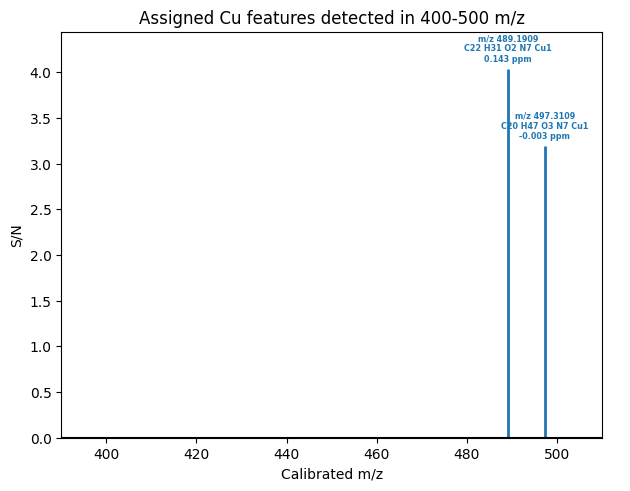

In [182]:
blank_subtracted_n = results2[~results2['Molecular Formula'].isin(qh2o_results['Molecular Formula'])]

blank_subtracted_full = sub[~sub['Molecular Formula'].isin(qh2o_results['Molecular Formula'])]

overlap = blank_subtracted_n[blank_subtracted_n['Molecular Formula'].isin(blank_subtracted_full['Molecular Formula'])]

narrow_unique = blank_subtracted_n[~blank_subtracted_n['Molecular Formula'].isin(blank_subtracted_full['Molecular Formula'])]

full_range_bs = results1[~results1['Molecular Formula'].isin(qh2o_results['Molecular Formula'])]



df2b = narrow_unique[narrow_unique['Cu'] > 0] #[sub['Molecular Formula'].notna()]
df2a = overlap[overlap['Cu'] > 0] #[sub['Molecular Formula'].notna()]


plot_ms(df2b, start_mz=400,end_mz = 500, tstart = 16, lbls=[ '' ],labs=True,colors=['C1']) 

plot_ms(df2a, start_mz=400,end_mz = 500, tstart = 16, lbls=[ '' ],labs=True,colors=['C0']) 


plt.title('Assigned Cu features detected in 400-500 m/z')
plt.show()

(198, 28)
358    8.600747
373    7.841299
376    4.841465
378    4.880732
Name: S/N Norm, dtype: float64


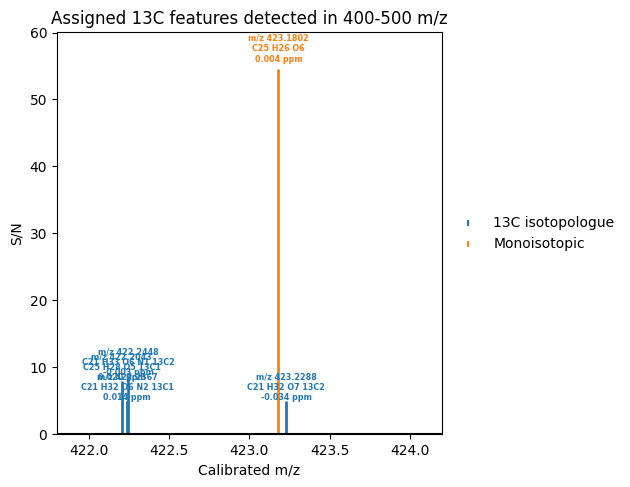

In [18]:
blank_subtracted_n = results2[~results2['Molecular Formula'].isin(qh2o_results['Molecular Formula'])]

blank_subtracted_full = sub[~sub['Molecular Formula'].isin(qh2o_results['Molecular Formula'])]

overlap = blank_subtracted_n[blank_subtracted_n['Molecular Formula'].isin(blank_subtracted_full['Molecular Formula'])]

narrow_unique = blank_subtracted_n[~blank_subtracted_n['Molecular Formula'].isin(blank_subtracted_full['Molecular Formula'])]

full_range_bs = results1[~results1['Molecular Formula'].isin(qh2o_results['Molecular Formula'])]



df2a = narrow_unique[narrow_unique['Cu'] > 0] #[sub['Molecular Formula'].notna()]

df2b = blank_subtracted_n.loc[blank_subtracted_n['Index'].isin(df2a['Mono Isotopic Index'] )]
print(np.shape(df2b))

plot_ms(df2a, df2=df2b,start_mz=422,end_mz = 424, tstart = 16, lbls=[ '13C isotopologue', 'Monoisotopic' ],labs=True) 

plt.title('Assigned 13C features detected in 400-500 m/z')
plt.show()

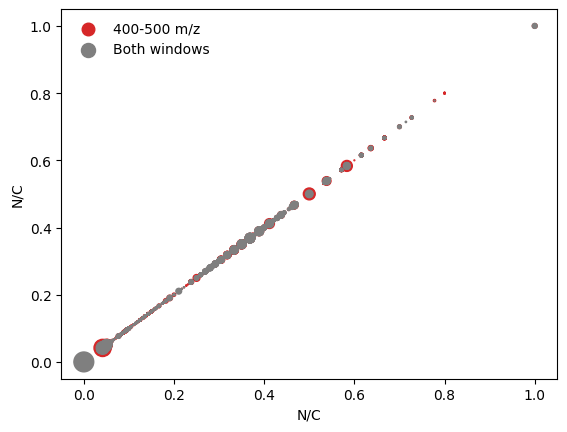

In [219]:
## van Krevelen plots 
## N/C, H/C
sub = filterMzRange(fresults1,[400,500])
fig, ax = plt.subplots()
ax.scatter(x=fresults2['N/C'],y=fresults2['N/C'],s=fresults2['Peak Height']/4000,c='C3',label='400-500 m/z')
ax.scatter(x=sub['N/C'],y=sub['N/C'],s=sub['Peak Height']/4000,c='C7',label='Both windows')
ax.set(xlabel='N/C',ylabel='N/C')
ax.legend(frameon=False)
plt.show()

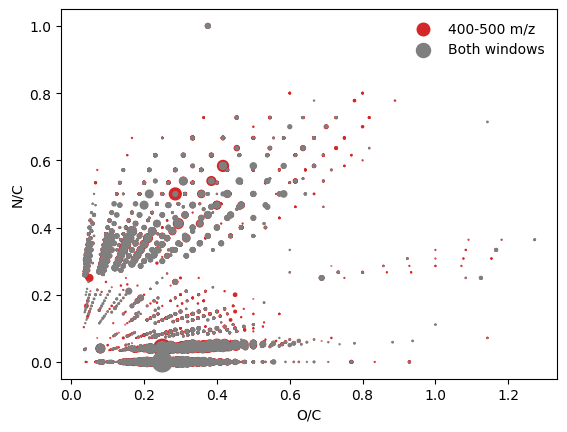

In [221]:

## O/C, N/C

sub = filterMzRange(fresults1,[400,500])
fig, ax = plt.subplots()
ax.scatter(x=fresults2['O/C'],y=fresults2['N/C'],s=fresults2['Peak Height']/4000,c='C3',label='400-500 m/z')
ax.scatter(x=sub['O/C'],y=sub['N/C'],s=sub['Peak Height']/4000,c='C7',label='Both windows')
ax.set(xlabel='O/C',ylabel='N/C')
ax.legend(frameon=False)
plt.show()

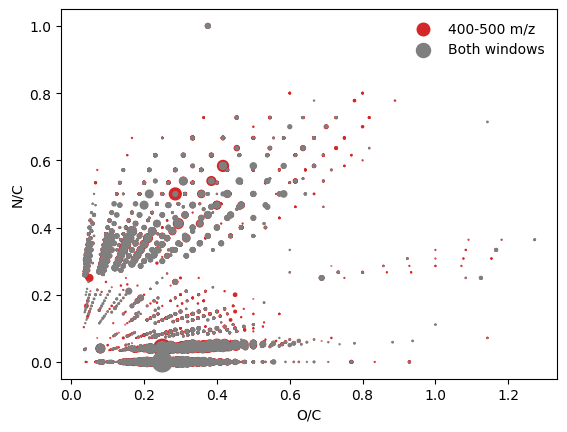

In [222]:
## van Krevelen plots 
## O/C, N/C
sub = filterMzRange(fresults1,[400,500])
fig, ax = plt.subplots()
ax.scatter(x=fresults2['O/C'],y=fresults2['N/C'],s=fresults2['Peak Height']/4000,c='C3',label='400-500 m/z')
ax.scatter(x=sub['O/C'],y=sub['N/C'],s=sub['Peak Height']/4000,c='C7',label='Both windows')
ax.set(xlabel='O/C',ylabel='N/C')
ax.legend(frameon=False)
plt.show()